# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`

$$\nabla_{w}Q(w)=\frac{-2}{\ell}X^{T}\cdot(y-Xw)$$

In [ ]:
!wget  -O 'descents.py' -q https://www.dropbox.com/scl/fi/i9i24ikwyt2099lc6s3cx/descents.py?rlkey=txasvvh35cm08nf7zd36qc1qr&dl=0
!wget  -O 'linear_regression.py' -q https://www.dropbox.com/scl/fi/8u97r37ly1rr26wahl9e3/linear_regression.py?rlkey=lpyxclsj52jyfyonfiu9okhx1&dl=0

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

Выпишем все нужные функции потерь и их градиенты.

**MSE:**

$$Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)$$

$$\nabla_{w}Q(w) = \frac{-2}{\ell}X^{T}\cdot(y-Xw)$$

**MAE:**

$$Q(w) = \frac{1}{\ell}\cdot(|y - Xw|)$$

$$\nabla_{w}Q(w) = \frac{1}{\ell}\cdot sgn(Xw - y)\cdot X$$

**Log-cosh:**

$$Q(w) = \frac{1}{\ell}\cdot \log(\cosh(y - Xw))$$

$$\nabla_{w}Q(w) = \frac{1}{\ell} \cdot sgn(y - Xw) \cdot X$$

**Huber-Loss:**

$$Q(w)= \begin{cases}
\frac{1}{2}\cdot (y - Xw)^{2}, & |y - Xw| < \delta \\
\delta (|y - Xw| - \frac{1}{2}\delta), & |y - Xw| \geq \delta
\end{cases}$$

$$\nabla_{w}Q(w) = \frac{1}{\ell}\cdot (y - Xw)\cdot X \cdot [|y - Xw|\leq\delta] + \delta\cdot sgn(y - Xw)\cdot X \cdot [|y - Xw|> \delta]$$



## Задание 3. Проверка кода (0 баллов)

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: [link](https://contest.yandex.ru/contest/54610/run-report/95877596/)

 id: 95877596


* **StochasticDescent**: [link](https://contest.yandex.ru/contest/54610/run-report/95880212/)

  id: 95880212


* **MomentumDescent**: [link](https://contest.yandex.ru/contest/54610/run-report/95872222/)

  id: 95872222


* **Adam**: [link](https://contest.yandex.ru/contest/54610/run-report/95872405/)

  id: 95872405


* **LinearRegression**: [link](https://contest.yandex.ru/contest/54610/run-report/95885957/)

  id: 95885957

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [ ]:
!wget  -O 'autos.csv' -q https://www.dropbox.com/scl/fi/rqhpp1y8w921h2fh17gjb/autos.csv?rlkey=p76g92bwvqwm4t6ywhvnwun2l&dl=0

In [ ]:
data = pd.read_csv('autos.csv')

In [ ]:
data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  
0       75     150000            177   1500  
1       69      90000             93   3600  
2      102     150000            246    650  
3      109     150000            140   2200  
4      105     150000            136   2000

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [ ]:
categorical = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

# YOUR CODE (EDA):

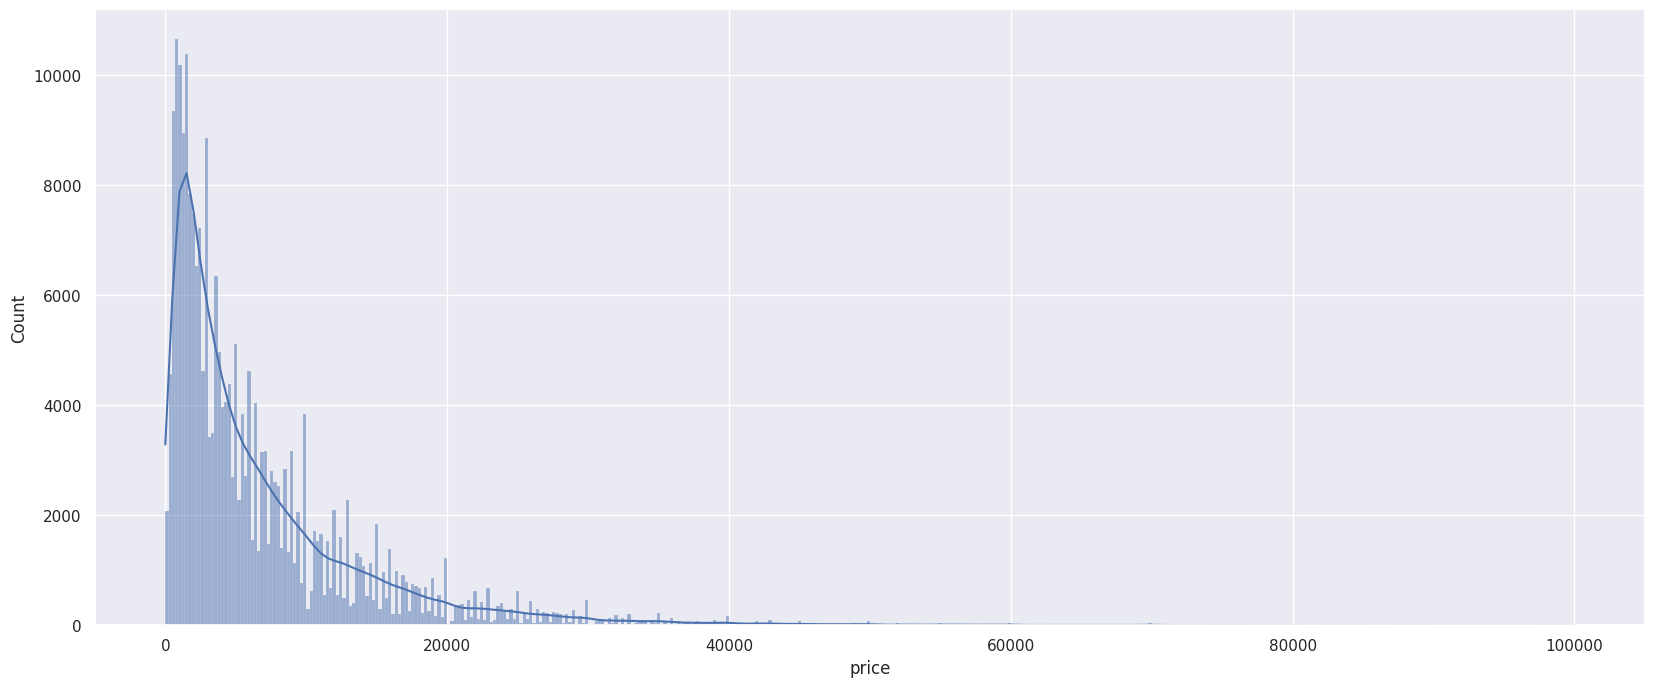

In [ ]:
sns.histplot(data=data['price'], kde=True).figure.set_size_inches(20, 8)

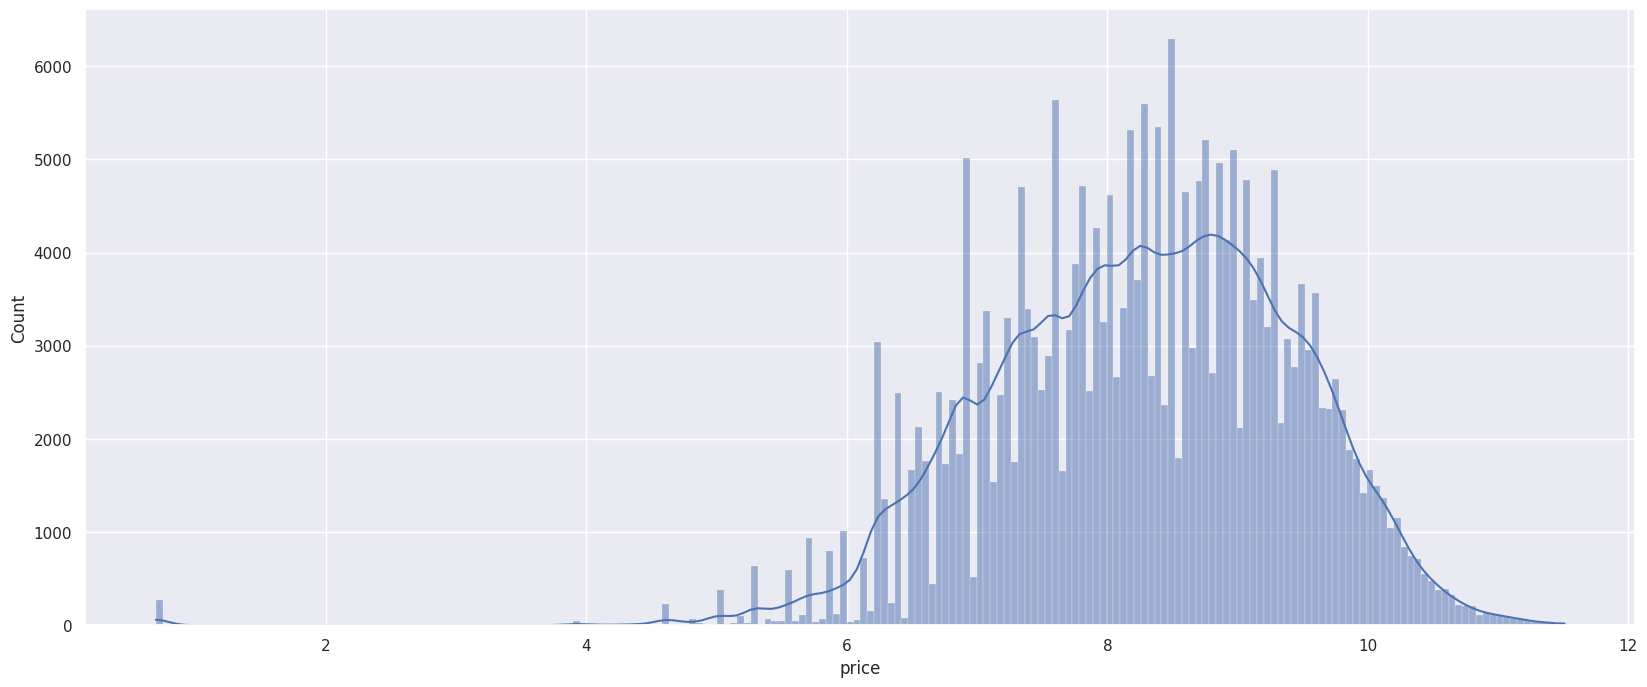

In [ ]:
sns.histplot(data=np.log1p(data['price']), kde=True).figure.set_size_inches(20, 8)

Лучше брать логармф, так как его распределение похоже на нормальное со средним значением 9, в данных есть выбросы и значения лежат в большом диапазоне, то есть присутствуют как очень дорогие машины, так и дешевые.
Поэтому выкинем значения, логарифм которых меньше 5.

In [ ]:
data = data[np.log1p(data['price']) >= 5]
data['log_price'] = np.log1p(data['price'])

<ipython-input-14-7a7e66a2c7ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_price'] = np.log1p(data['price'])


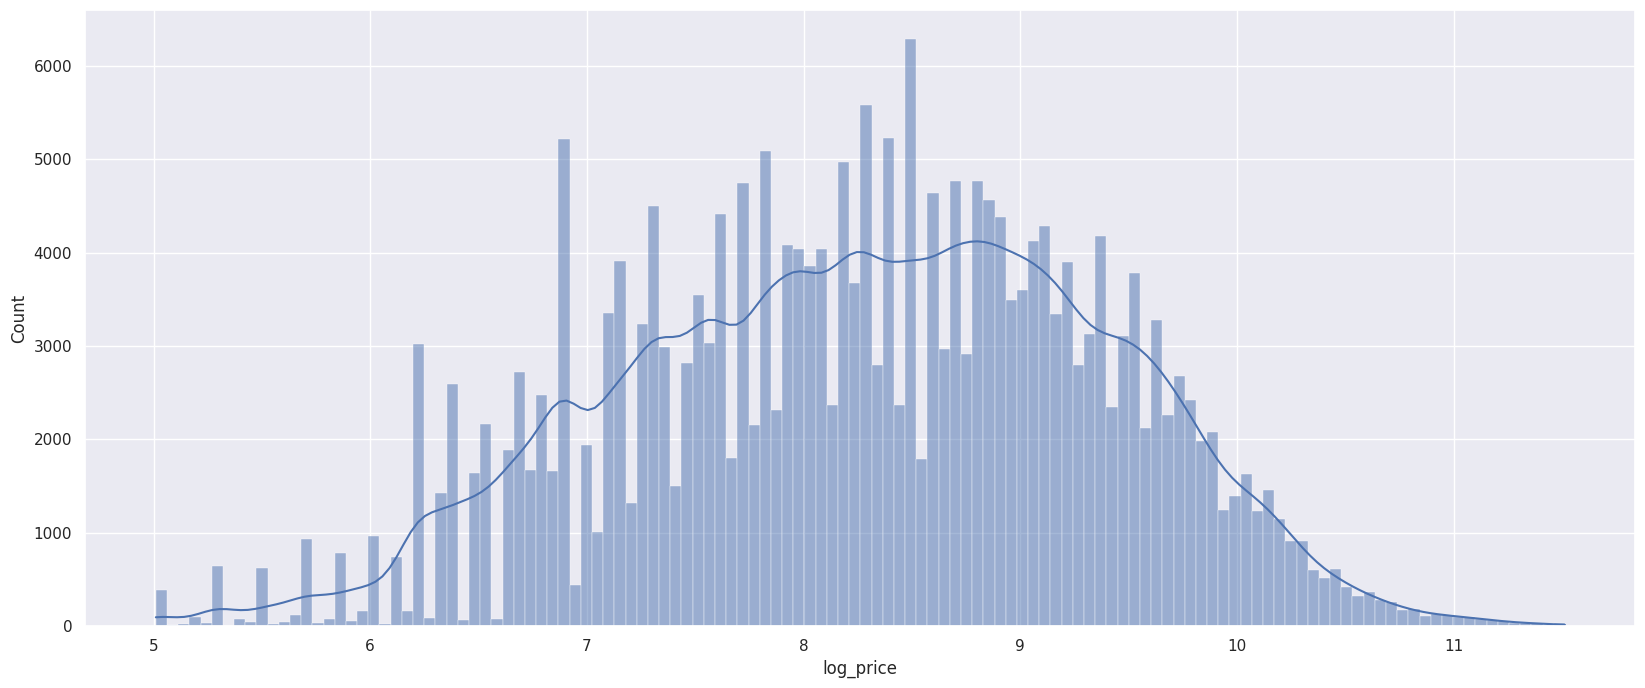

In [ ]:
sns.histplot(data=data['log_price'], kde=True).figure.set_size_inches(20, 8)

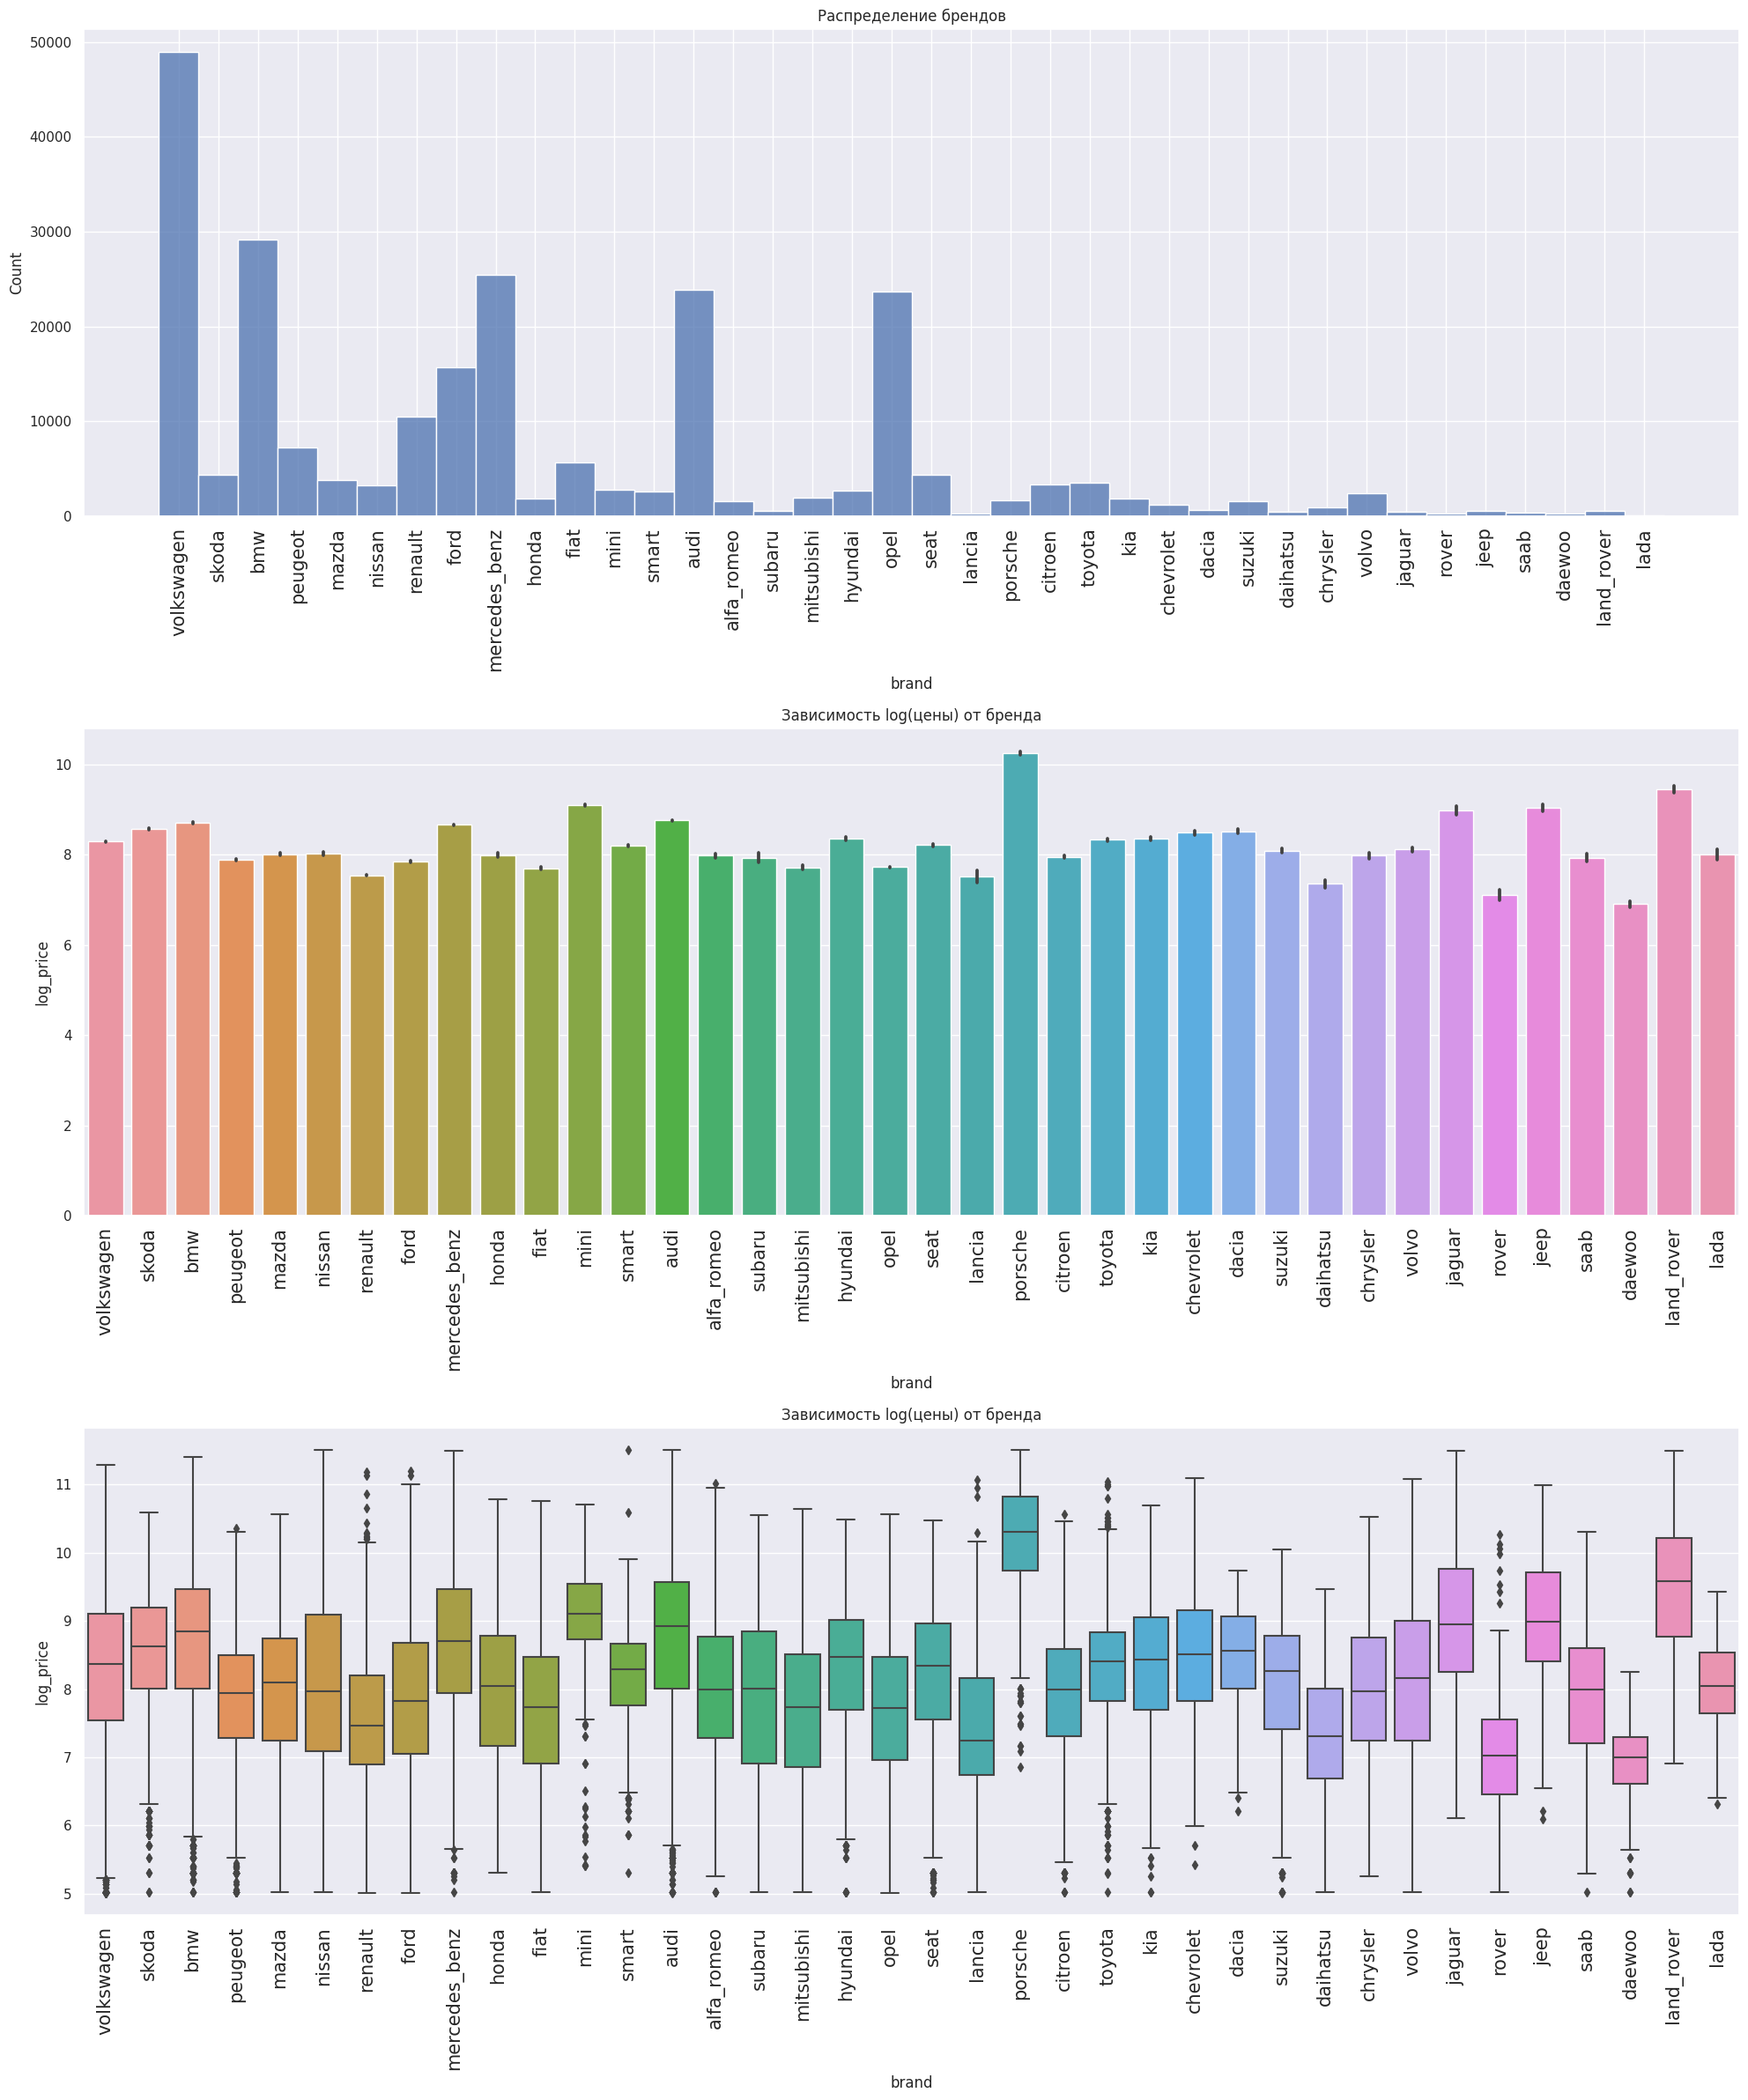

In [ ]:
fig = plt.figure(figsize=(20, 24))

plt.subplot(3, 1, 1)
sns.histplot(data['brand'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Распределение брендов')

plt.subplot(3, 1, 2)
sns.barplot(x=data['brand'], y=data['log_price'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Зависимость log(цены) от бренда')

plt.subplot(3, 1, 3)
sns.boxplot(x=data['brand'], y=data['log_price'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Зависимость log(цены) от бренда')

plt.tight_layout()
plt.show()

Можно сказать, что бренд автомобиля однозначно влияет на цену.


На немецком рынке очевидно доминирует volkswagen (и другие немецкие бренды: bmw и mercedes benz), что не скажешь, например, про российскую lada или корейский daewoo. Они в европе аутсайдеры.

По цене выделяется porsche ($\uparrow$) и тот же самый daewoo($\downarrow$).

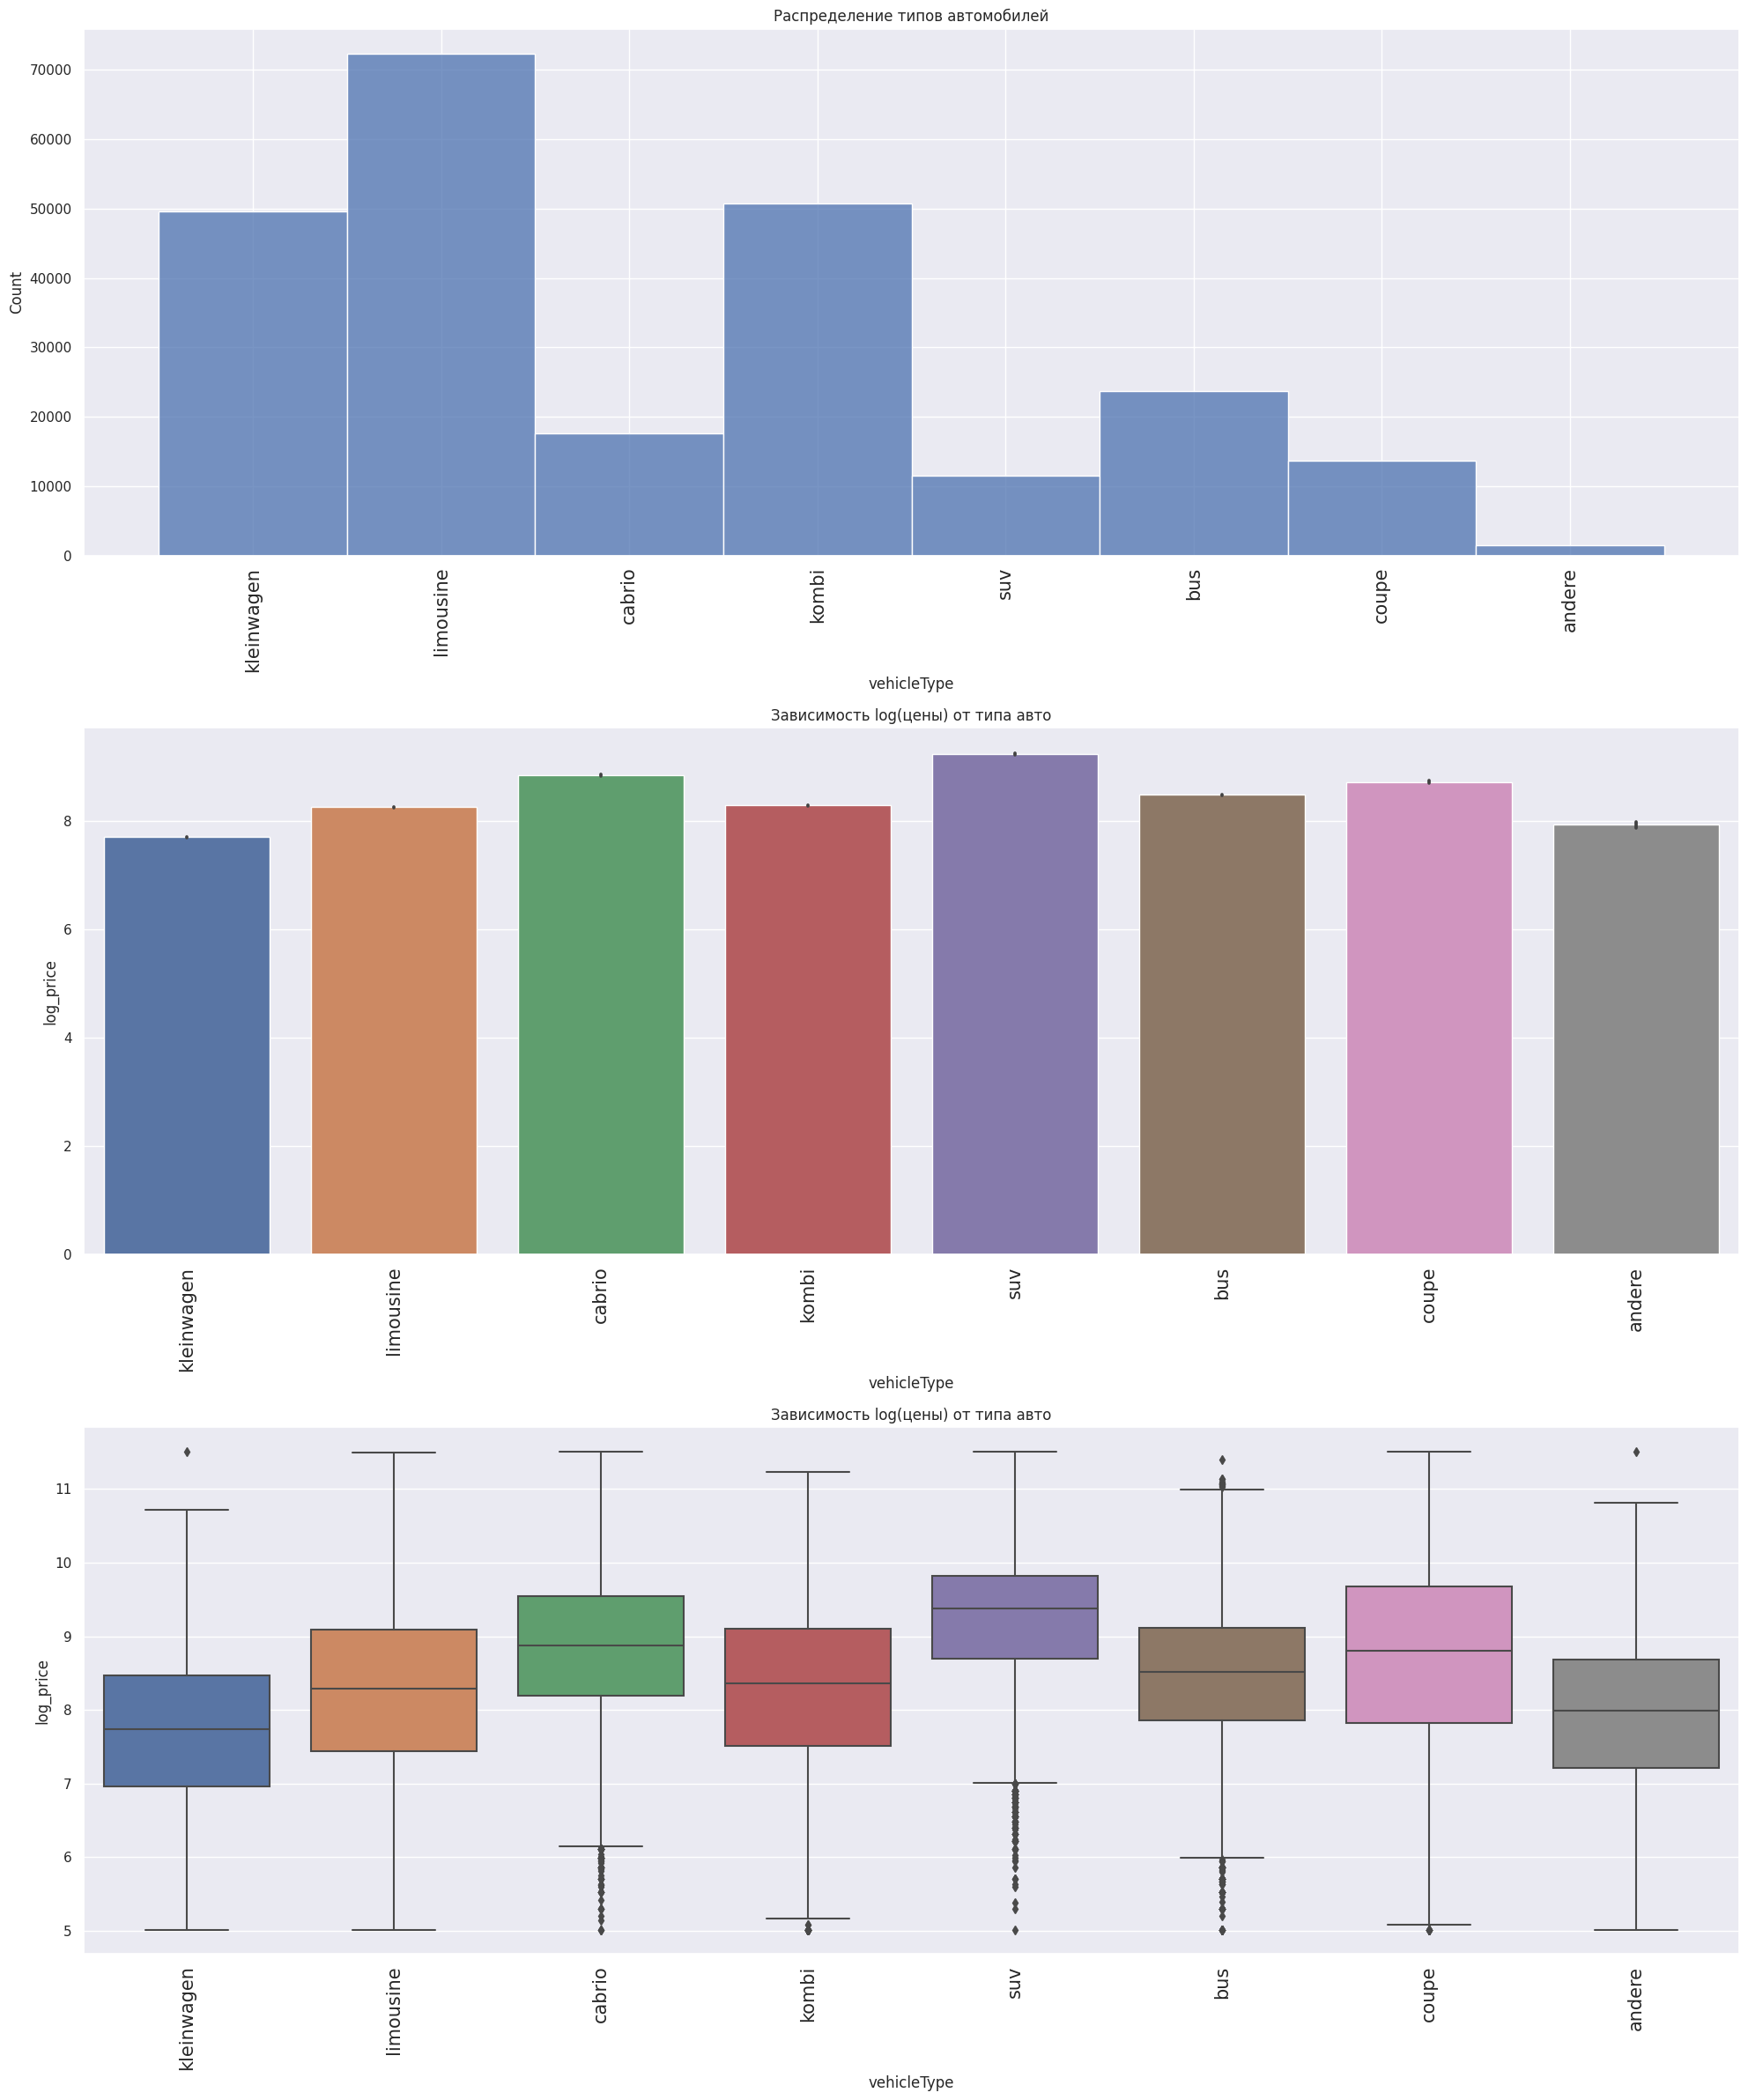

In [ ]:
fig = plt.figure(figsize=(20, 24))

plt.subplot(3, 1, 1)
sns.histplot(data['vehicleType'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Распределение типов автомобилей')

plt.subplot(3, 1, 2)
sns.barplot(x=data['vehicleType'], y=data['log_price'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Зависимость log(цены) от типа авто')

plt.subplot(3, 1, 3)
sns.boxplot(x=data['vehicleType'], y=data['log_price'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Зависимость log(цены) от типа авто')

plt.tight_layout()
plt.show()

Тип транспортного средства уже не так существенно влияет на цену автомобиля, как напрмер, бренд, но все же разница прослеживается.

Больше всего немцы предпочитают лимузины (??? тут наверное имеются ввиду седаны (limousinen) ???).

Самые дорогие автомобили в кузове SUV (большие внедорожники).

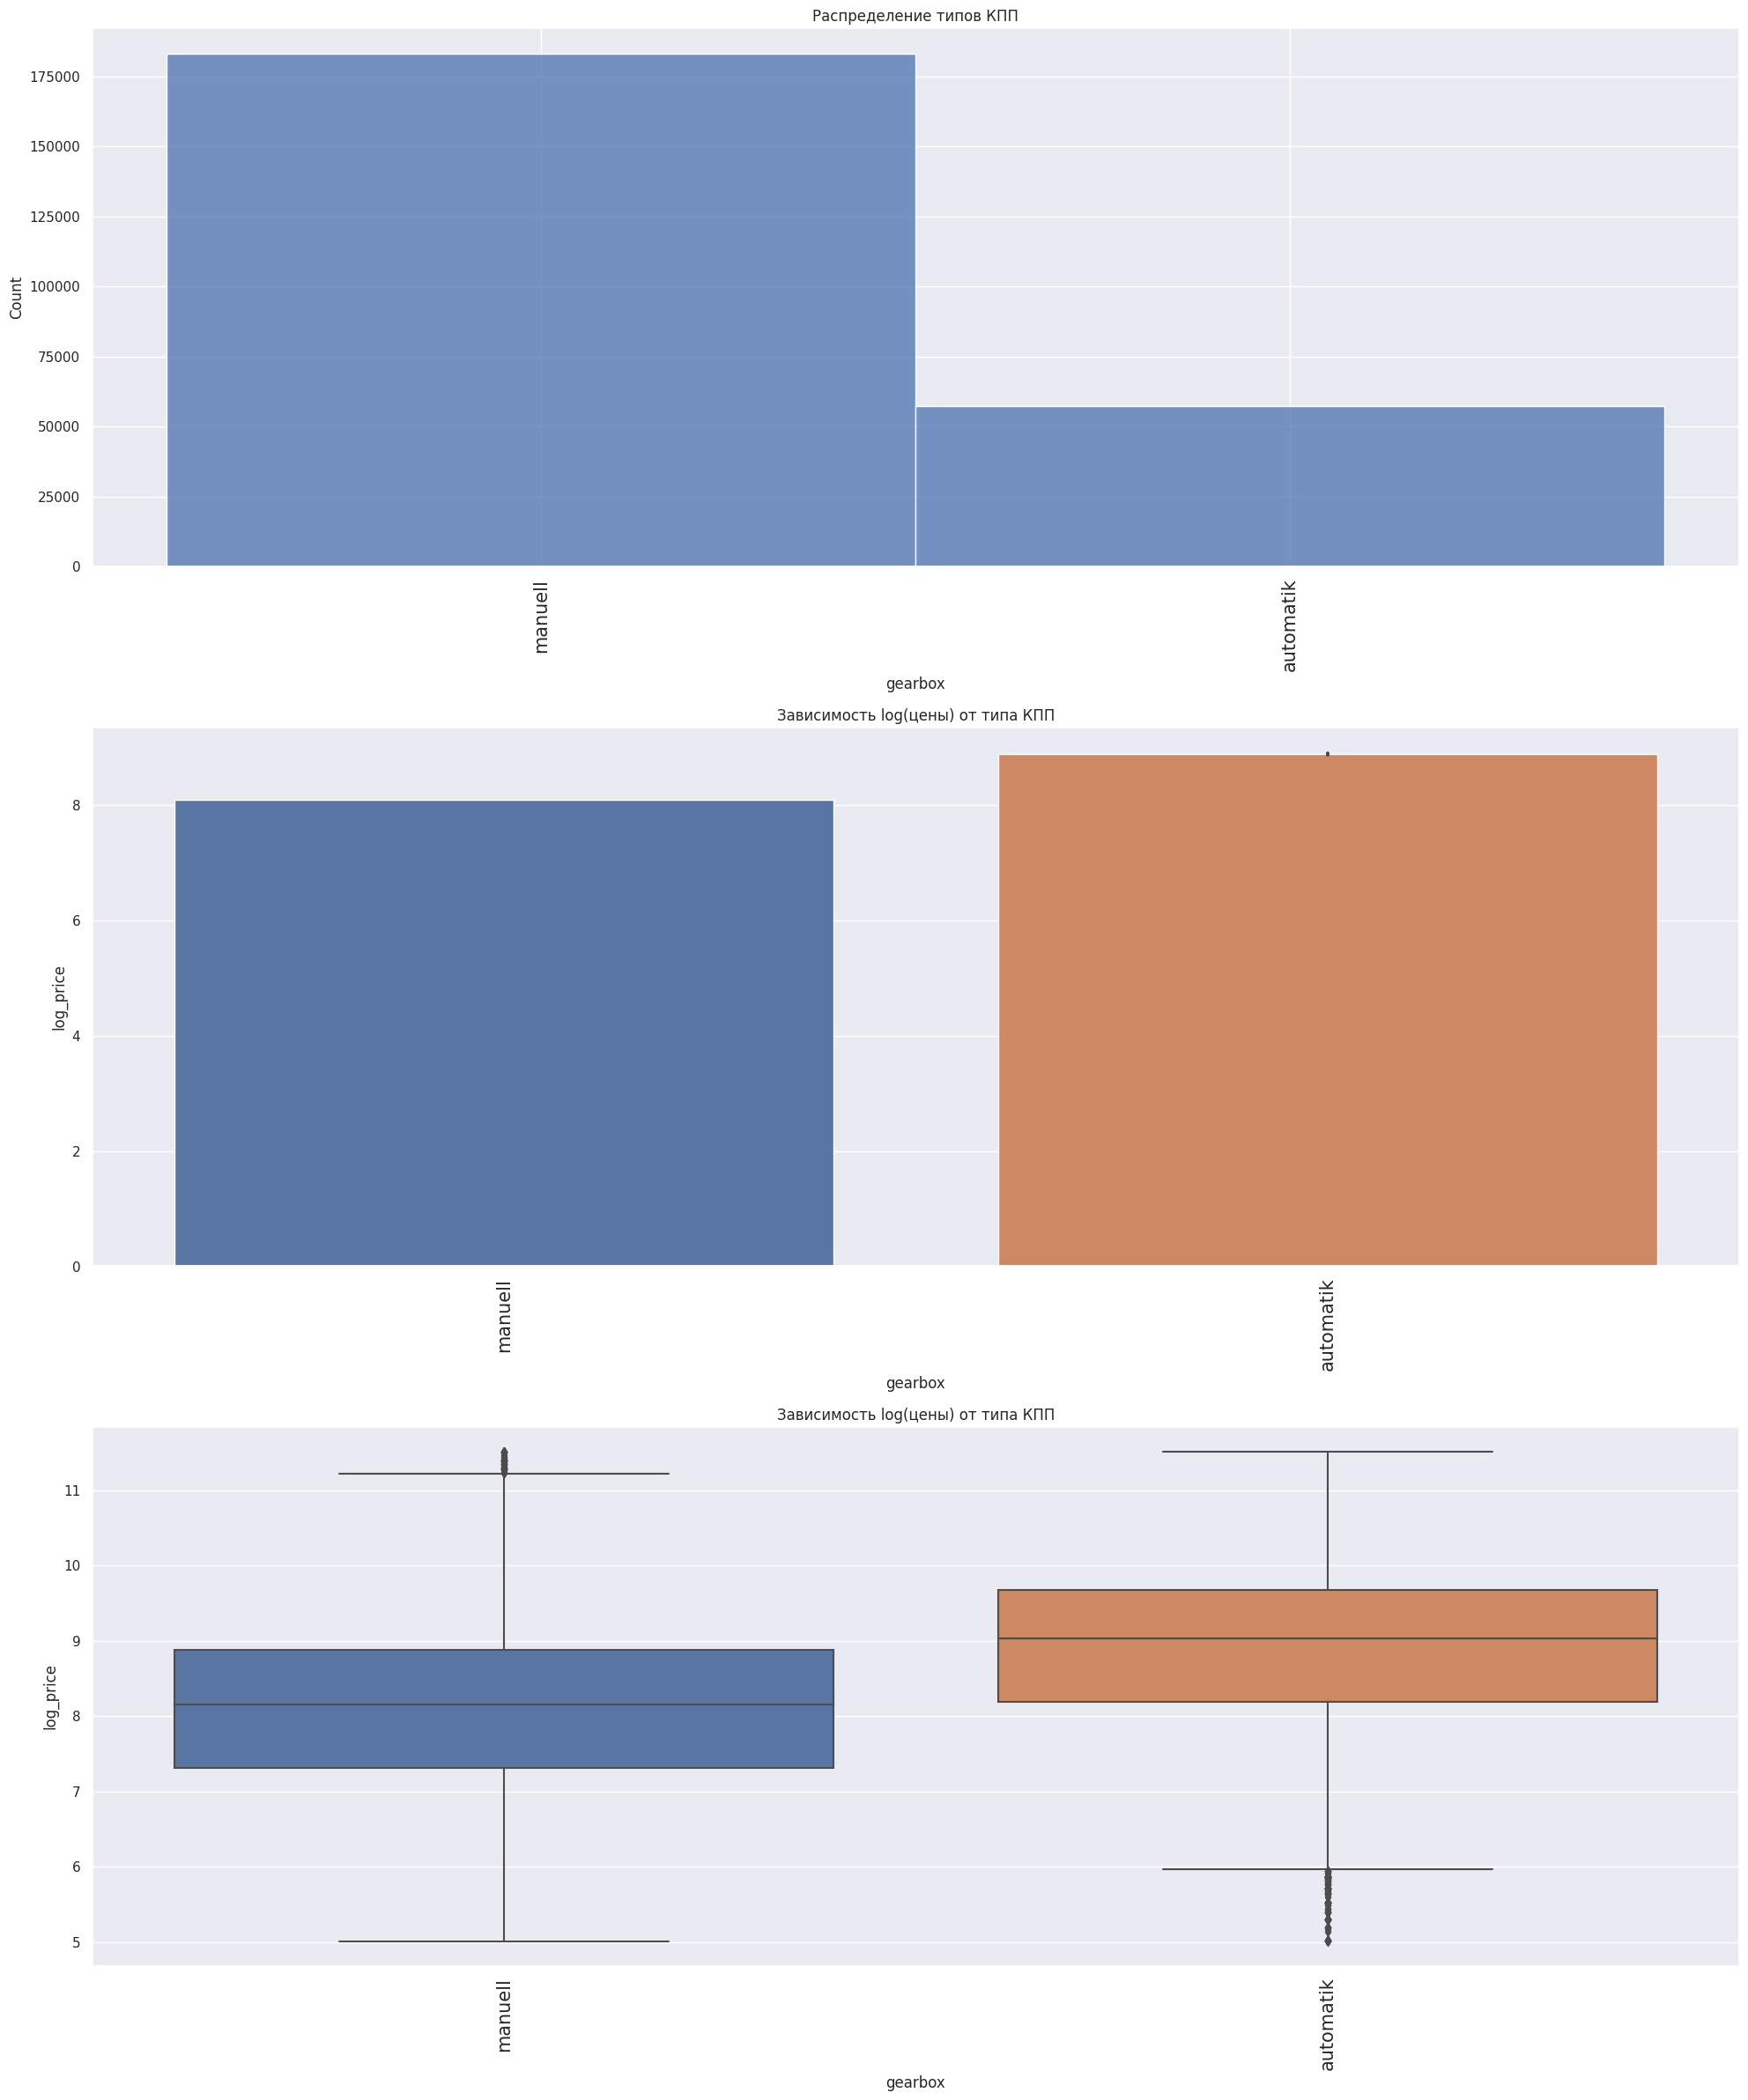

In [ ]:
fig = plt.figure(figsize=(20, 24))

plt.subplot(3, 1, 1)
sns.histplot(data['gearbox'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Распределение типов КПП')

plt.subplot(3, 1, 2)
sns.barplot(x=data['gearbox'], y=data['log_price'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Зависимость log(цены) от типа КПП')

plt.subplot(3, 1, 3)
sns.boxplot(x=data['gearbox'], y=data['log_price'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Зависимость log(цены) от типа КПП')

plt.tight_layout()
plt.show()

Абсолютное большинство машин имеют механическую коробку передач и стóят дешевле автомобилей с автоматической коробкой.

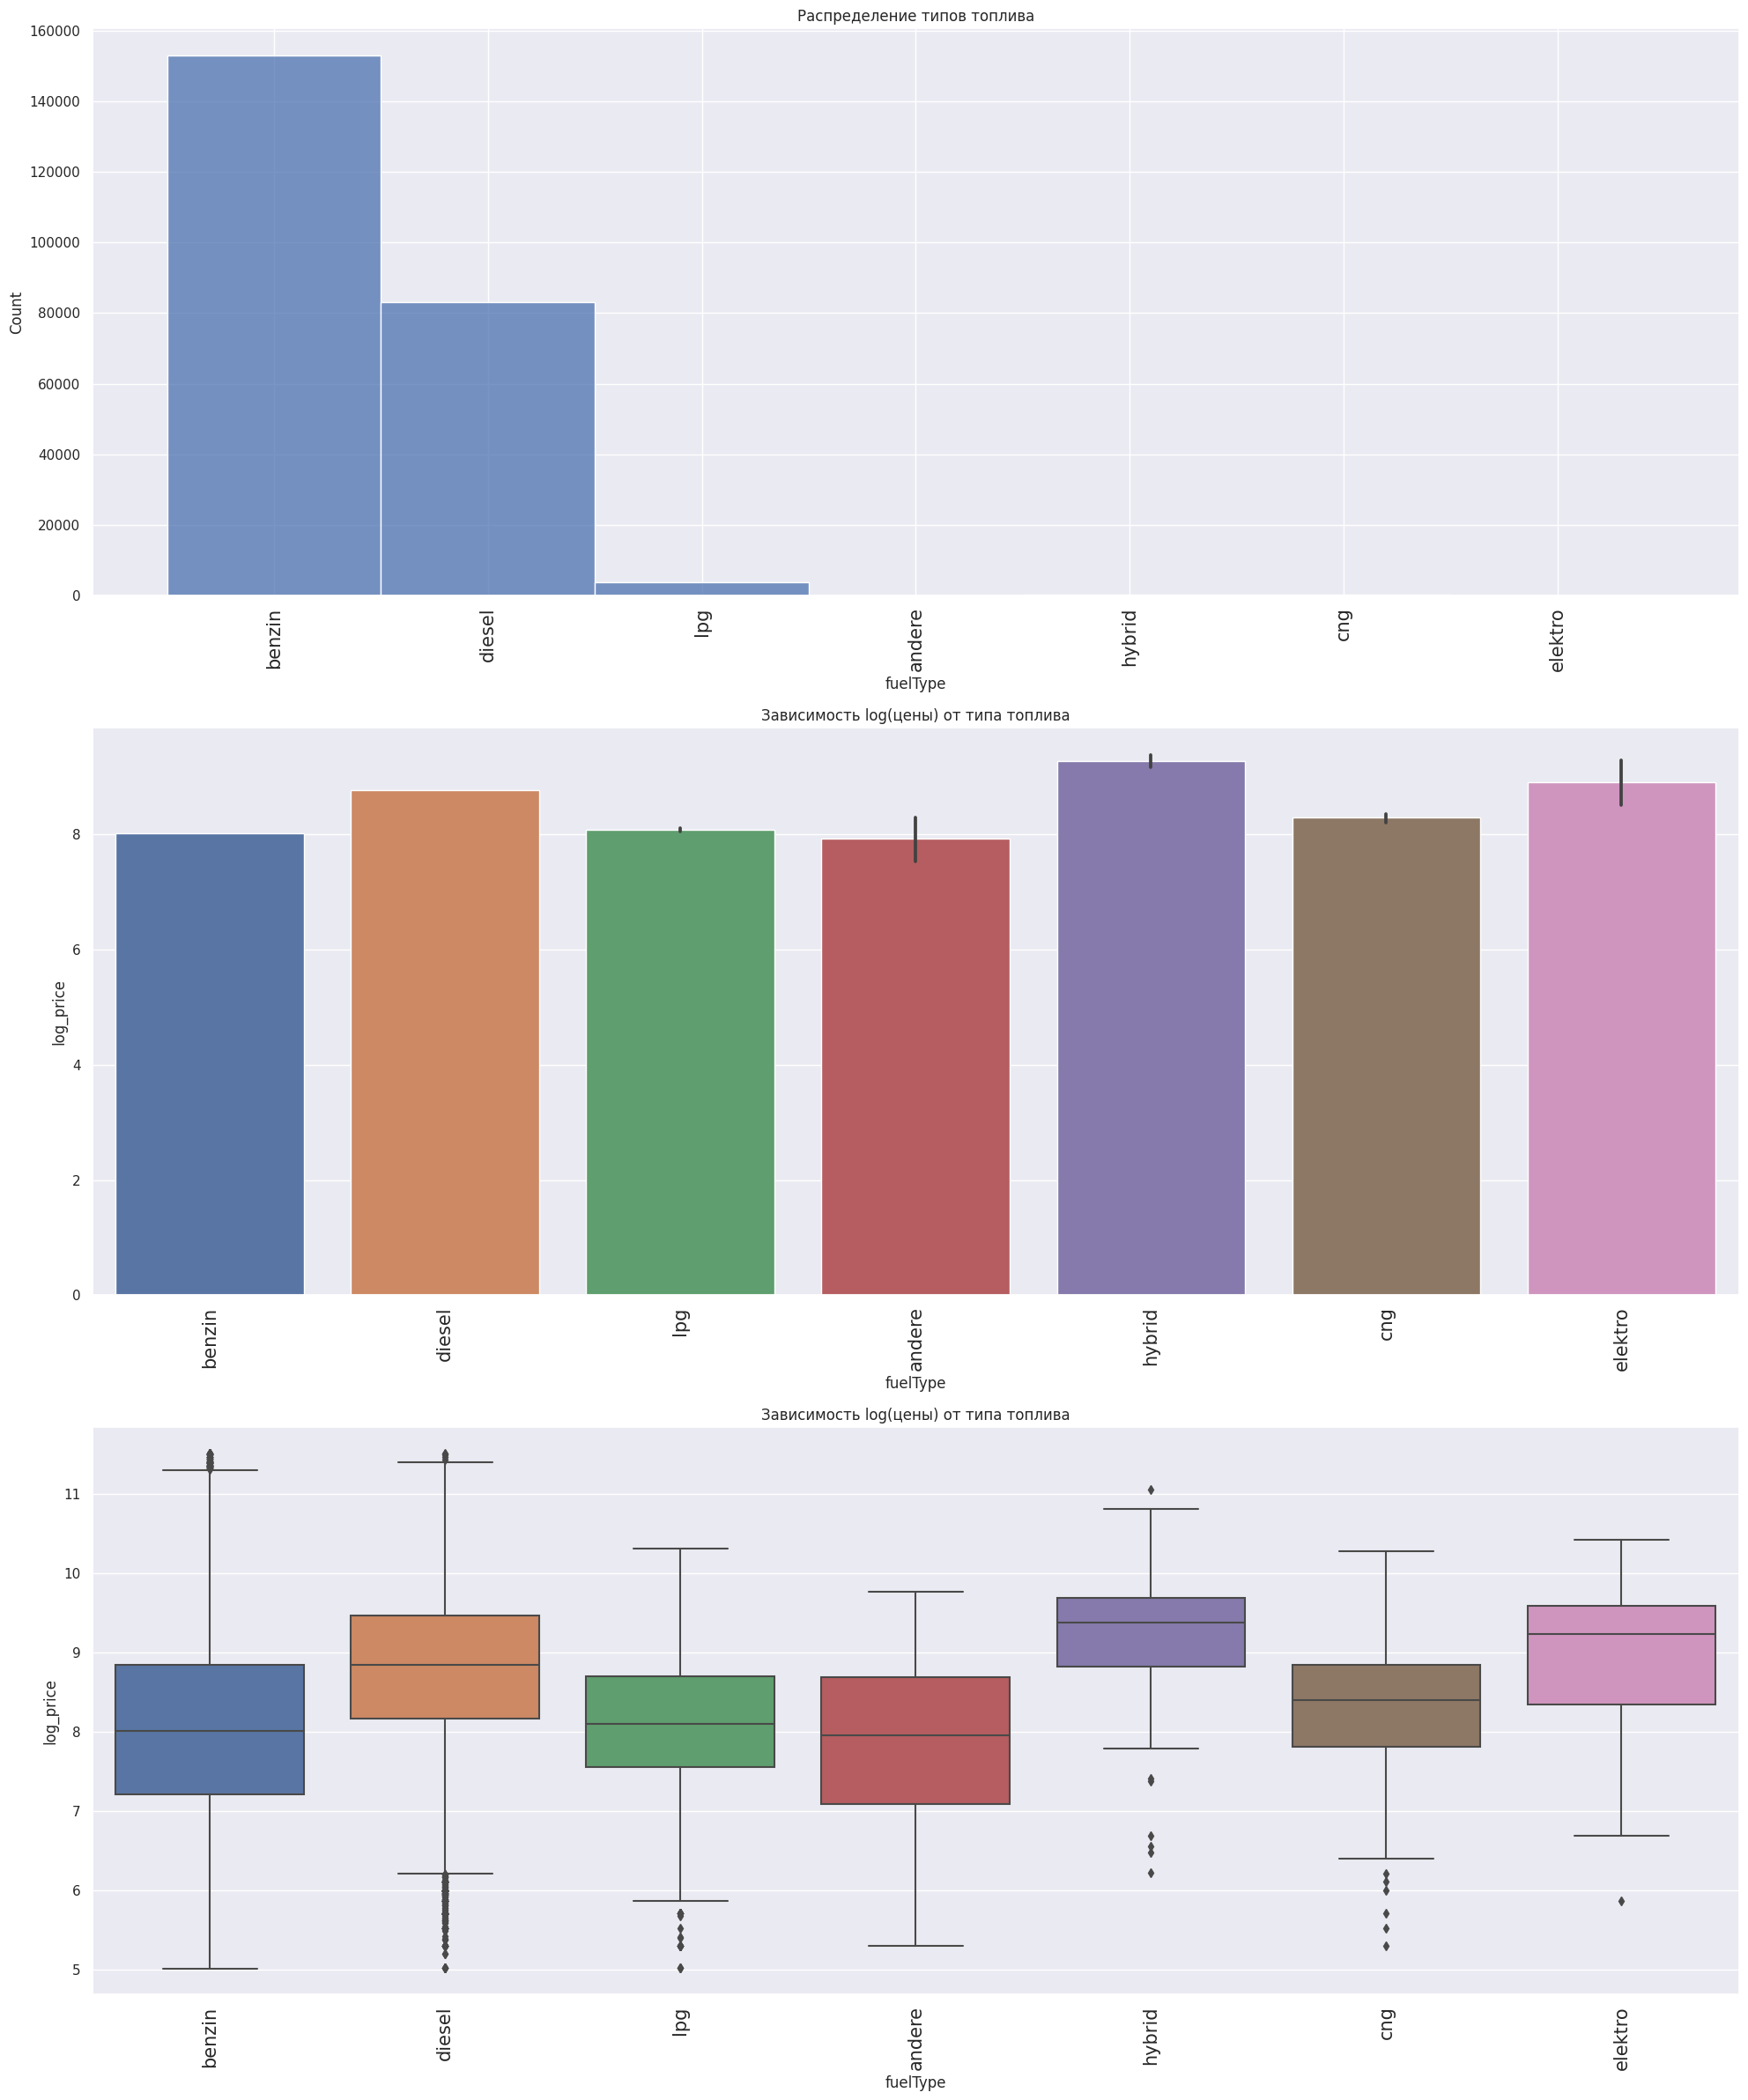

In [ ]:
fig = plt.figure(figsize=(20, 24))

plt.subplot(3, 1, 1)
sns.histplot(data['fuelType'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Распределение типов топлива')

plt.subplot(3, 1, 2)
sns.barplot(x=data['fuelType'], y=data['log_price'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Зависимость log(цены) от типа топлива')

plt.subplot(3, 1, 3)
sns.boxplot(x=data['fuelType'], y=data['log_price'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Зависимость log(цены) от типа топлива')

plt.tight_layout()
plt.show()

Тип топлива тоже влияет на цену, например, самые дорогие автомобили оснащены гибридным дваигателем. Ну а самый распространенный тип двигателя, конечно, бензиновый.

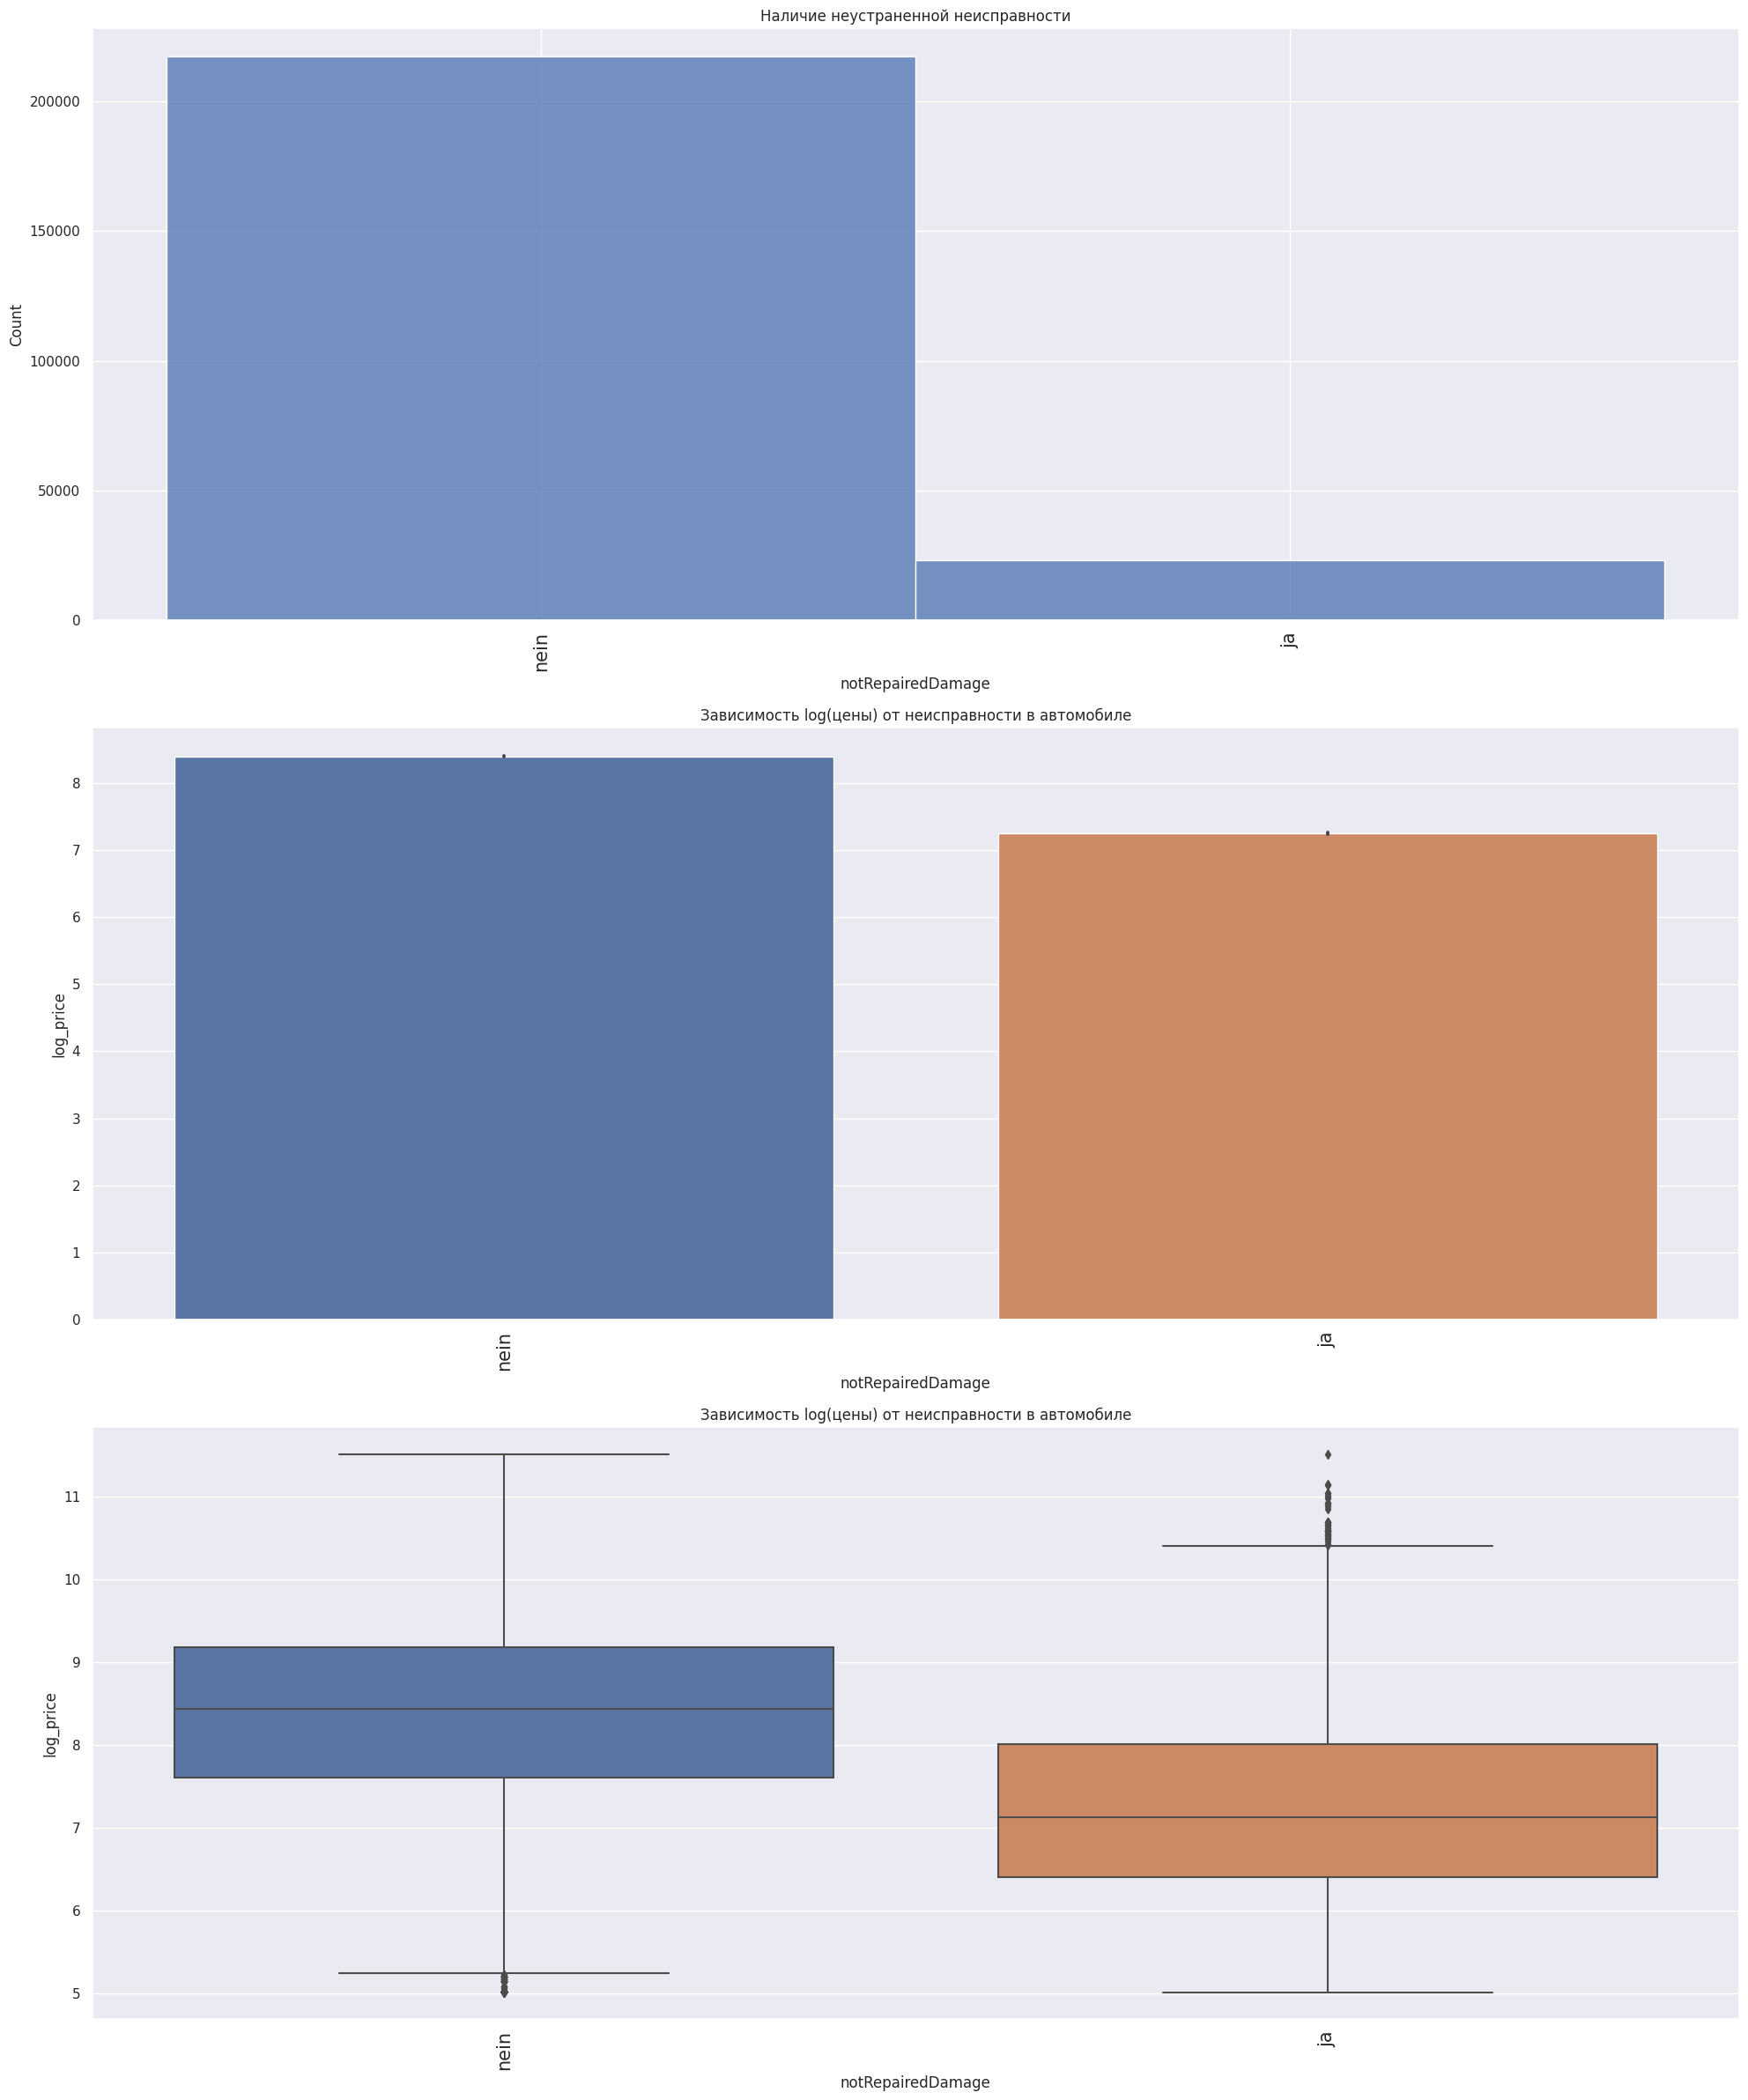

In [ ]:
fig = plt.figure(figsize=(20, 24))

plt.subplot(3, 1, 1)
sns.histplot(data['notRepairedDamage'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Наличие неустраненной неисправности')

plt.subplot(3, 1, 2)
sns.barplot(x=data['notRepairedDamage'], y=data['log_price'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Зависимость log(цены) от неисправности в автомобиле')

plt.subplot(3, 1, 3)
sns.boxplot(x=data['notRepairedDamage'], y=data['log_price'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Зависимость log(цены) от неисправности в автомобиле')

plt.tight_layout()
plt.show()

Как и следовало ожидать, машины без неисправностей стоят дороже и их намного больше, чем машин с какими-то проблемами.

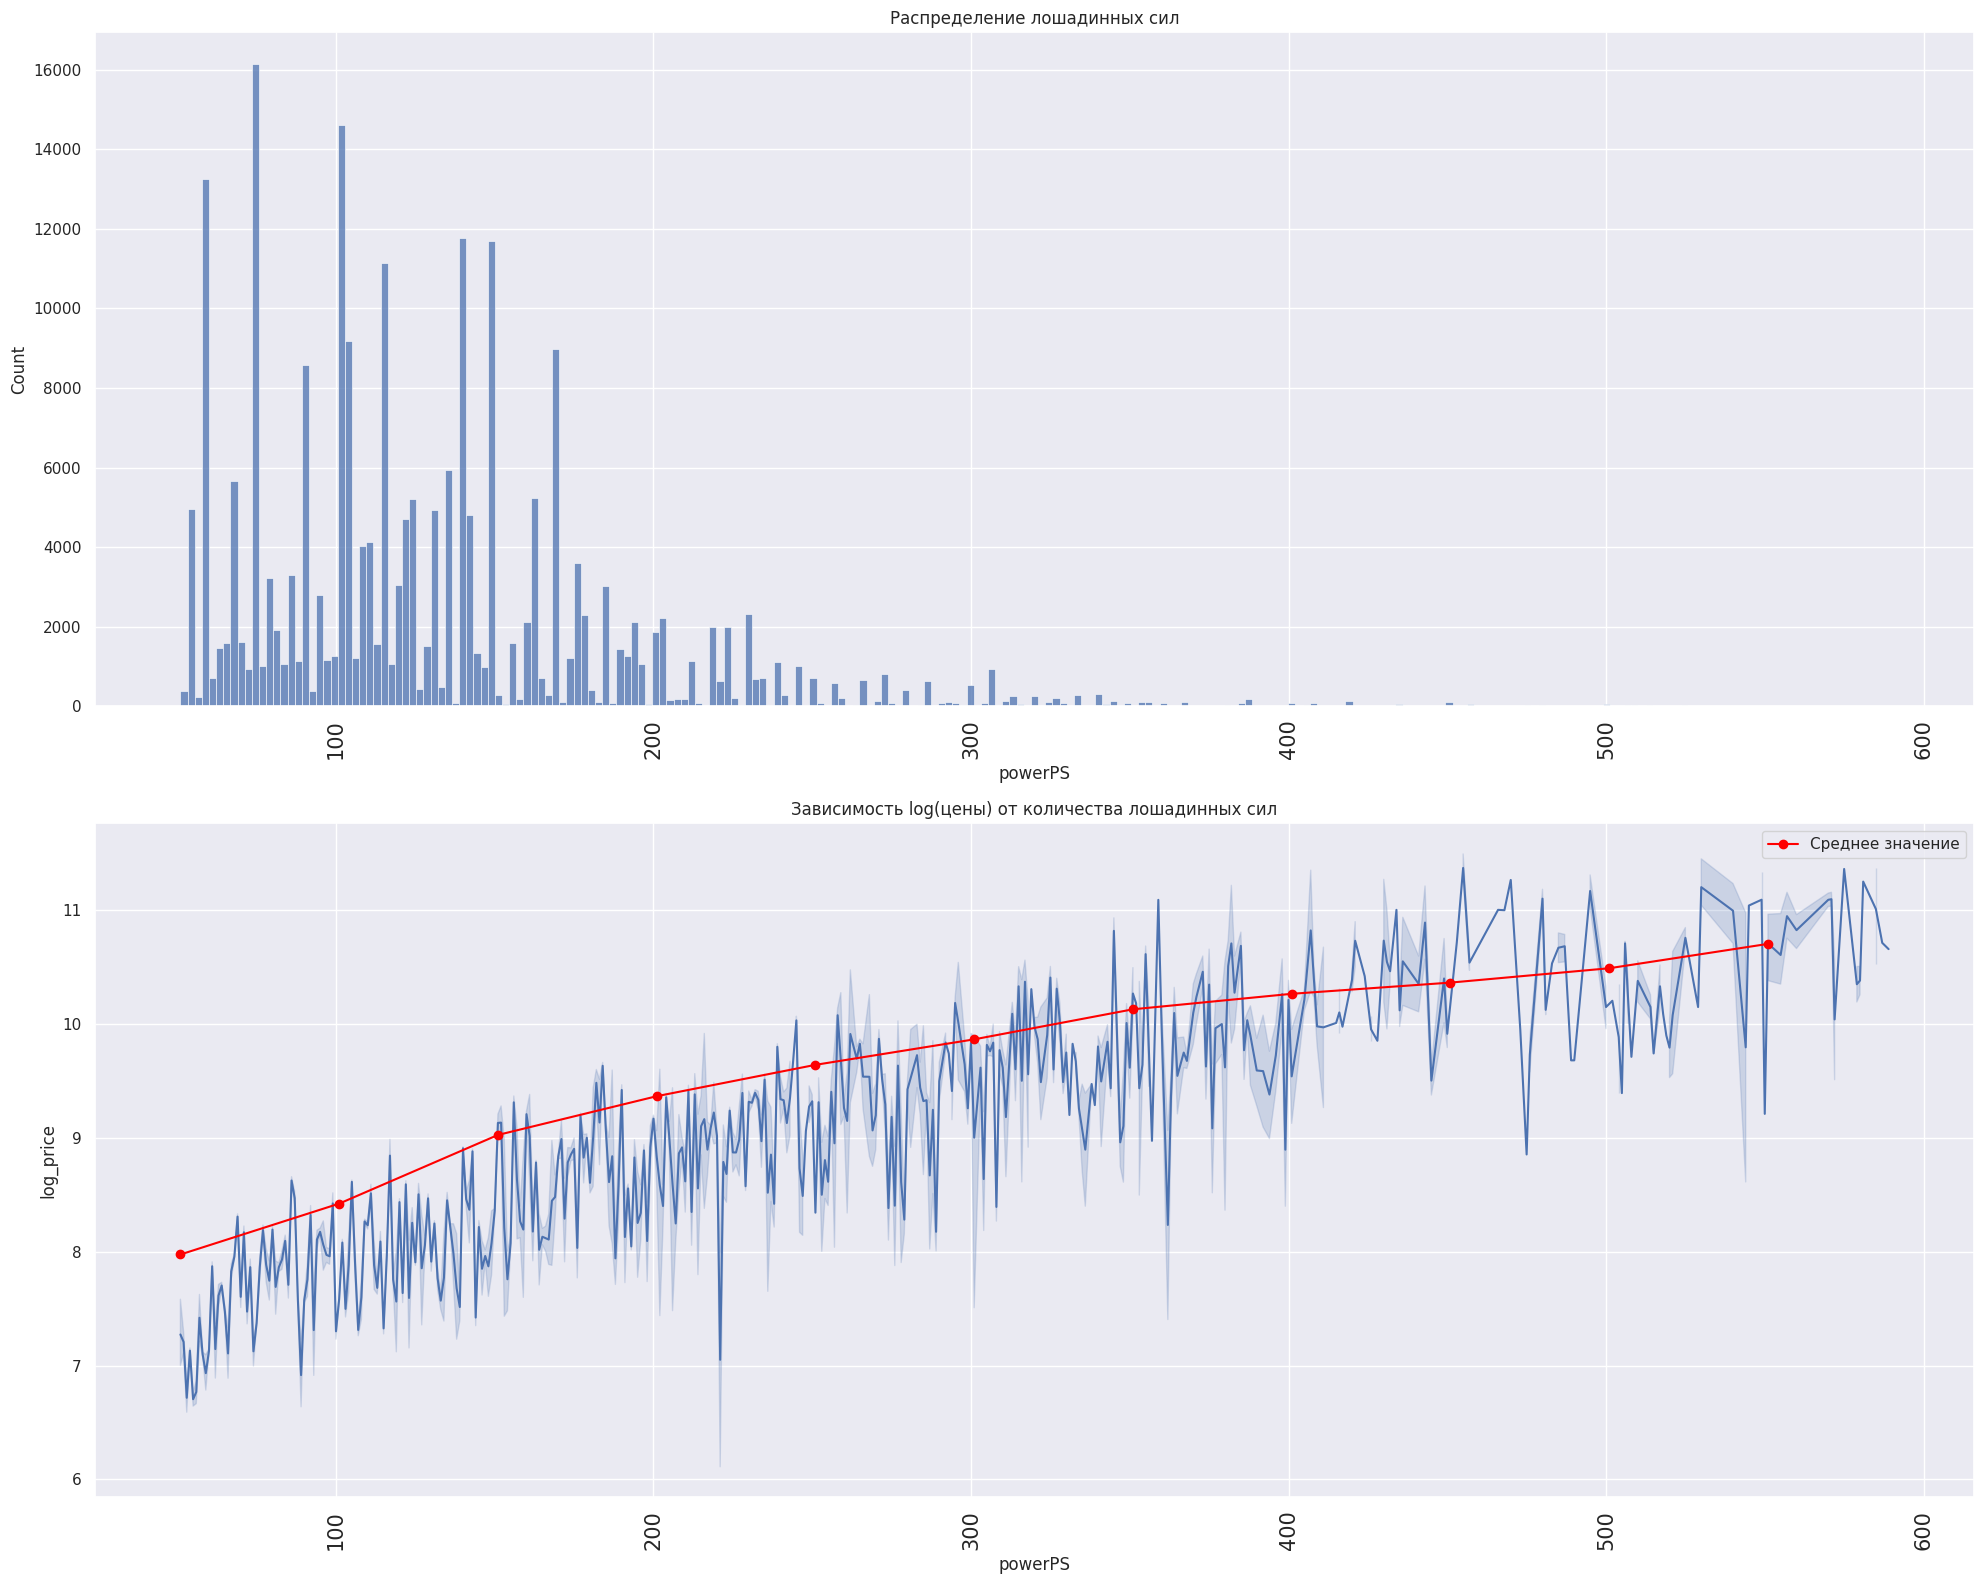

In [ ]:
fig = plt.figure(figsize=(20, 16))

plt.subplot(2, 1, 1)
sns.histplot(data['powerPS'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Распределение лошадинных сил')

plt.subplot(2, 1, 2)
powerPS_intervals = range(data['powerPS'].min(), data['powerPS'].max() + 1, 50)

sns.lineplot(data=data, x=data['powerPS'], y=data['log_price'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Зависимость log(цены) от количества лошадинных сил')

mean_log_price = []
for interval in powerPS_intervals:
    mask = (data['powerPS'] >= interval) & (data['powerPS'] < interval + 100)
    mean_log_price.append(data.loc[mask, 'log_price'].mean())

plt.plot(powerPS_intervals, mean_log_price, marker='o', color='red', label='Среднее значение')

plt.tight_layout()
plt.legend()
plt.show()

Большинство машин имеют до 200 л.с. и в целом, с ростом их количества - растет и цена.

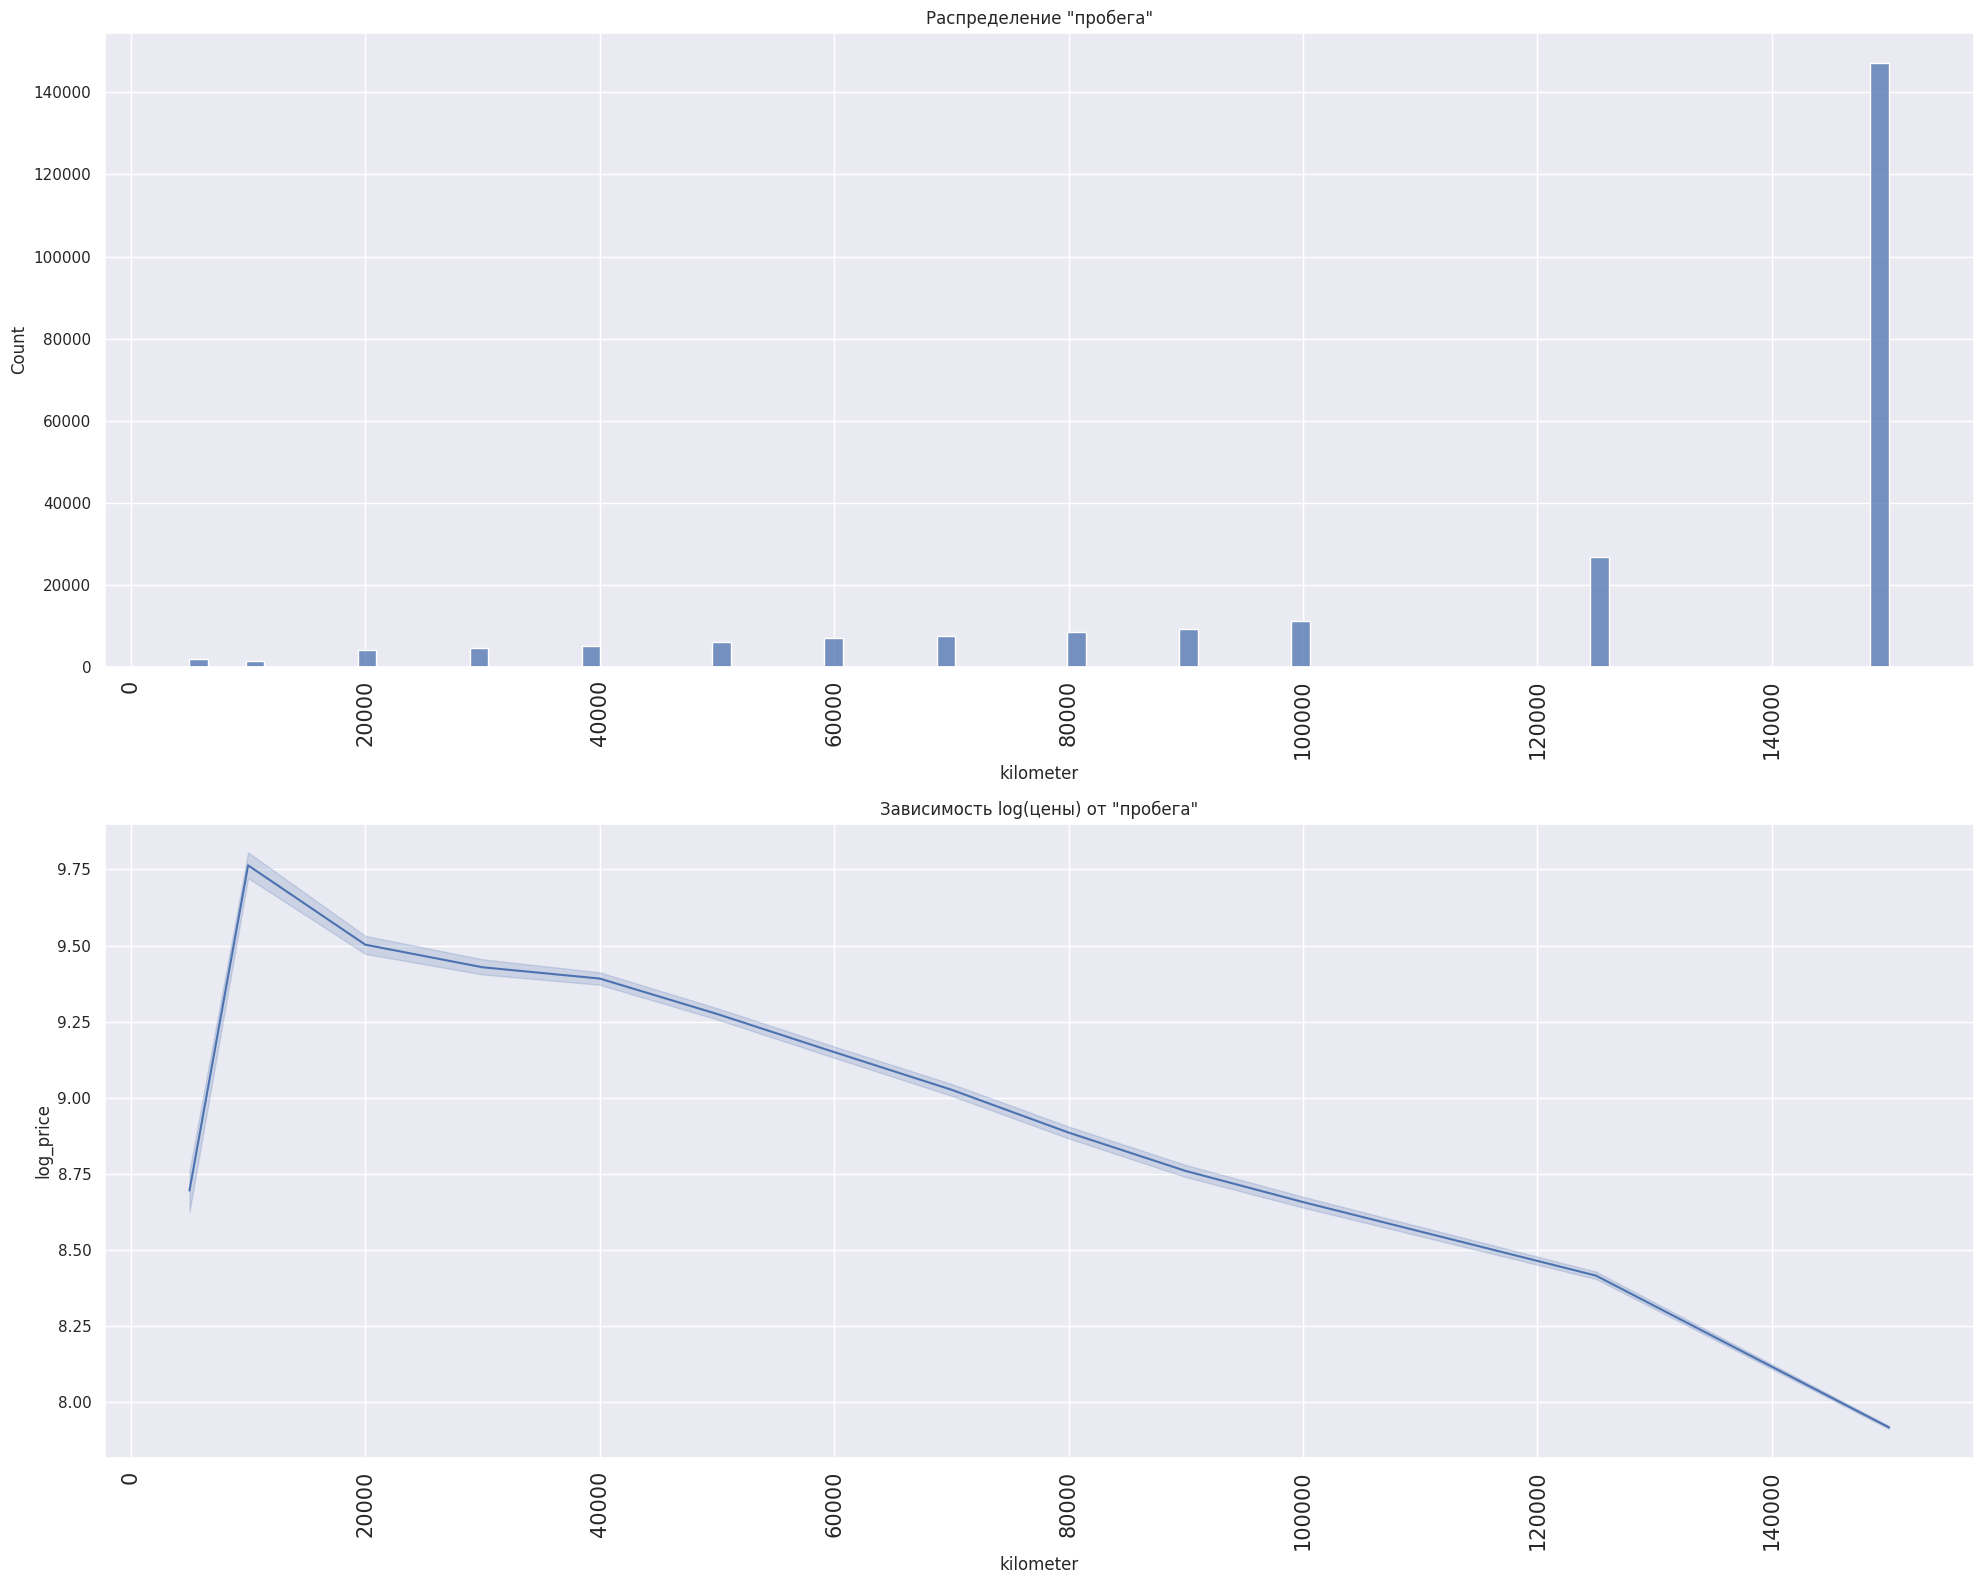

In [ ]:
fig = plt.figure(figsize=(20, 16))

plt.subplot(2, 1, 1)
sns.histplot(data['kilometer'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Распределение "пробега"')
plt.tight_layout()

plt.subplot(2, 1, 2)

sns.lineplot(data=data, x=data['kilometer'], y=data['log_price'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Зависимость log(цены) от "пробега"')

plt.tight_layout()
plt.show()

Как можно заметить, большинство автомобилей имеет пройденный километраж более 150 000.

Что касается зависимости цены от пробега, видно, что сначала цена увеличивается вместе с километрами. Скорее всего это из-за того, что автомобили с совсем маленьким пробегом это предложения из дешевого ценового сегмента (тот же daewoo). Но их не очень много, как это можно было заметить из предыдущих графиков. И когда мы их "обработали", график выравнивается и отображает логичные результаты: с увелечением пробега падает цена автомобиля.

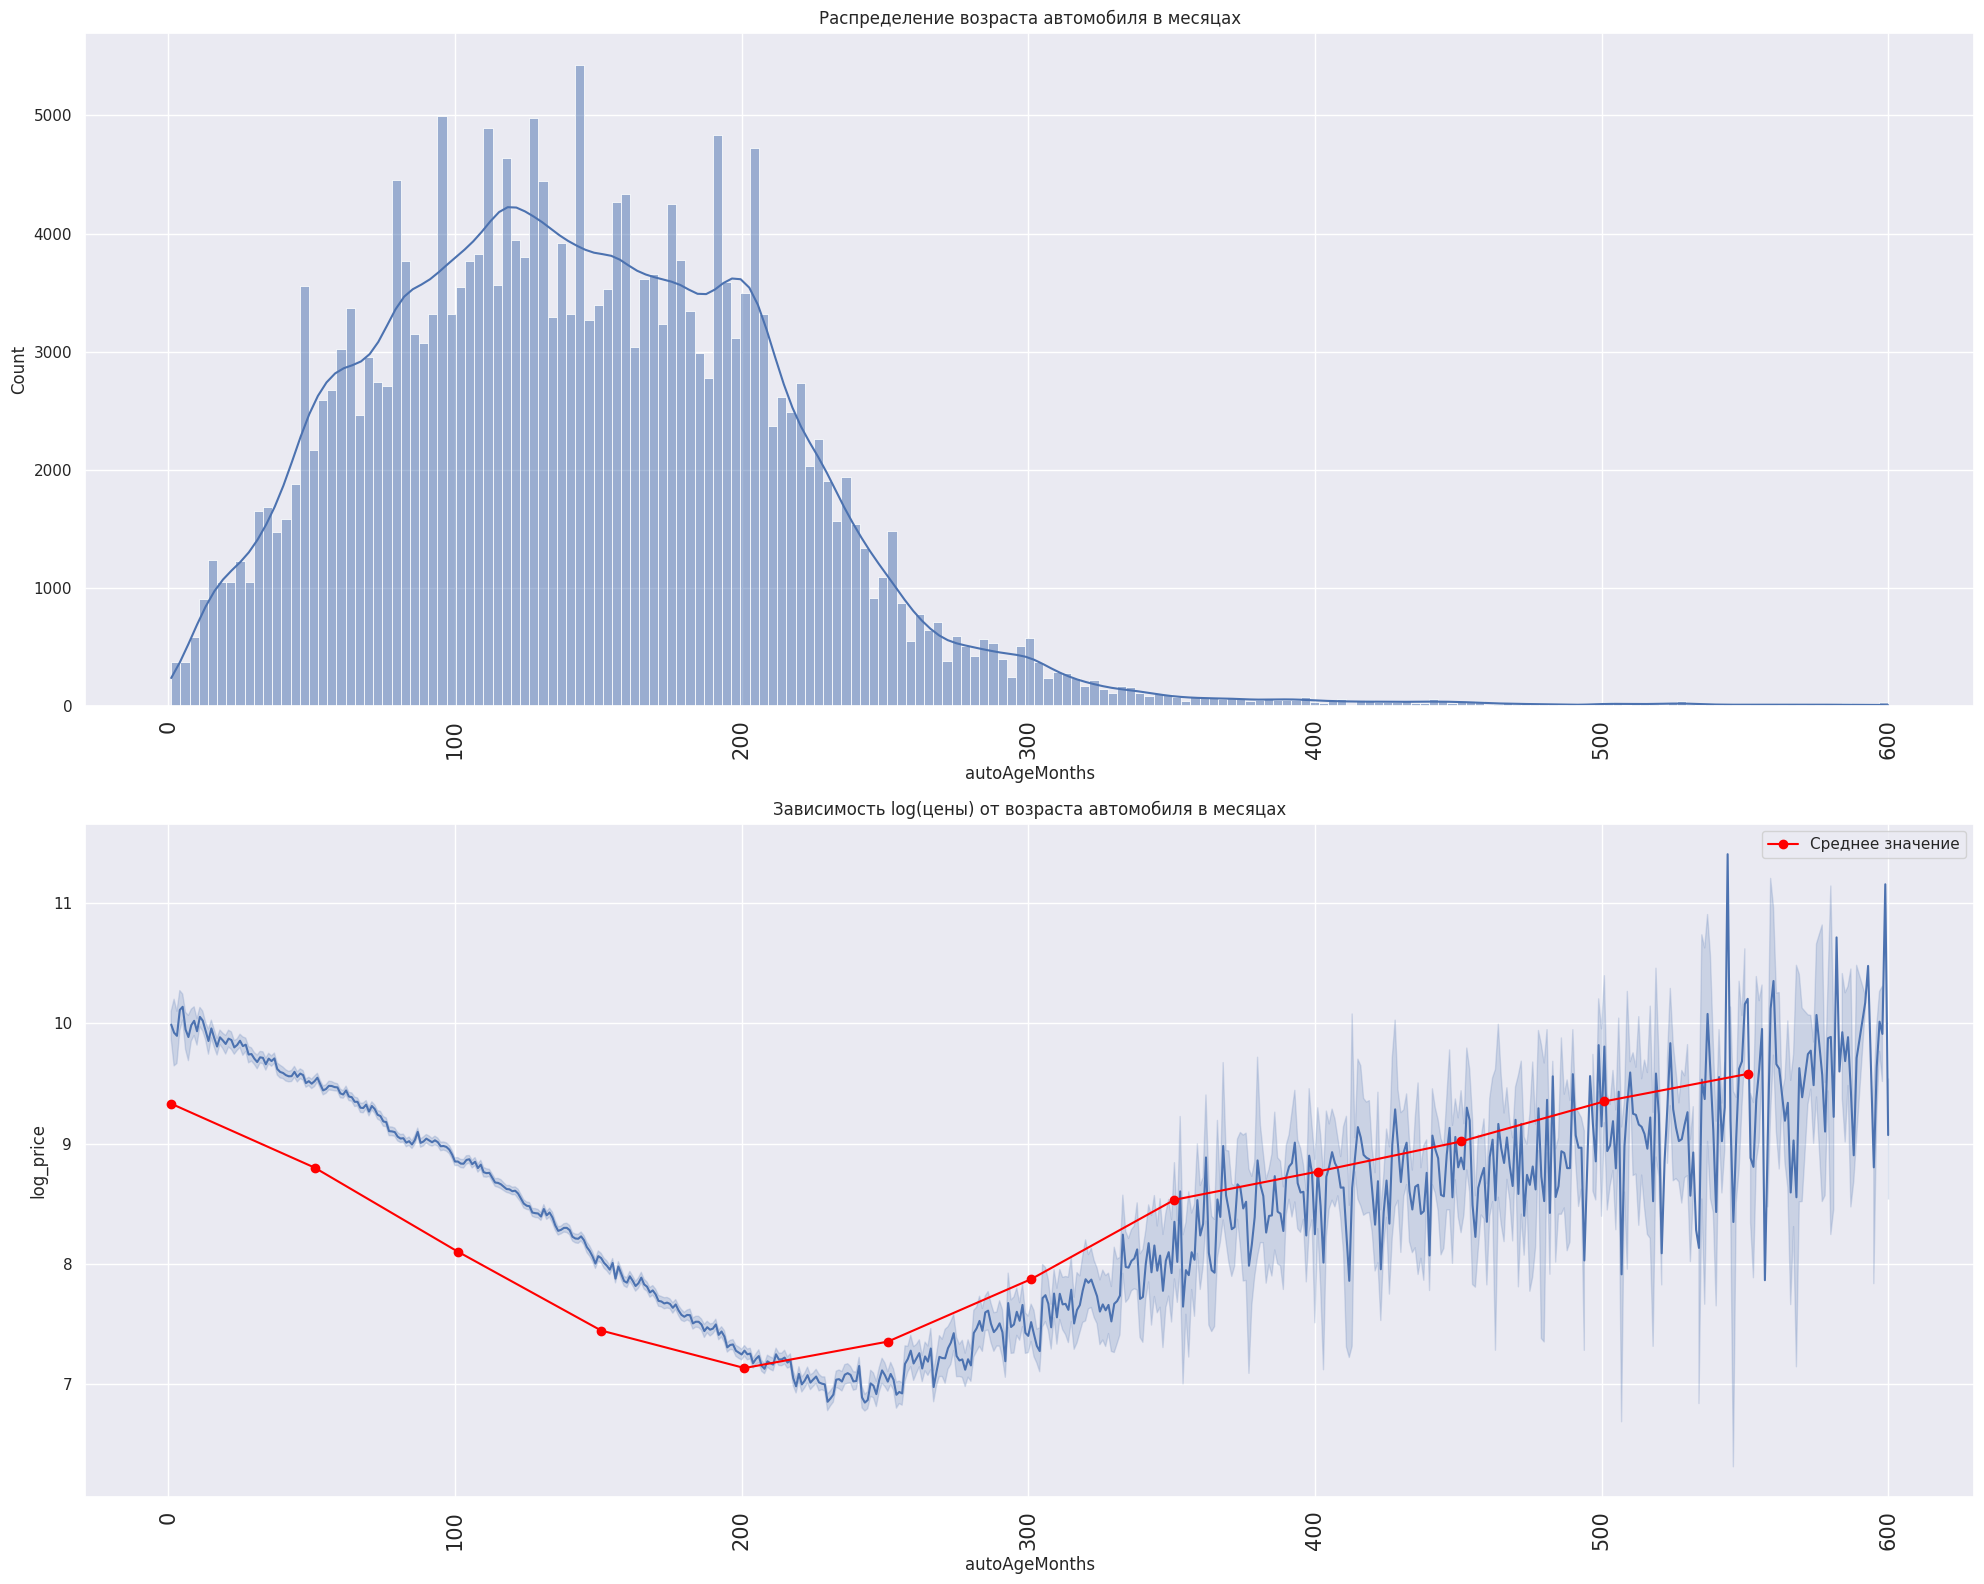

In [ ]:
fig = plt.figure(figsize=(20, 16))

plt.subplot(2, 1, 1)
sns.histplot(data['autoAgeMonths'], kde='True')
plt.xticks(rotation=90, fontsize=15)
plt.title('Распределение возраста автомобиля в месяцах')

plt.subplot(2, 1, 2)
autoAgeMonths_intervals = range(data['autoAgeMonths'].min(), data['autoAgeMonths'].max() + 1, 50)

sns.lineplot(data=data, x=data['autoAgeMonths'], y=data['log_price'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Зависимость log(цены) от возраста автомобиля в месяцах')

mean_log_price = []
for interval in autoAgeMonths_intervals:
    mask = (data['autoAgeMonths'] >= interval) & (data['autoAgeMonths'] < interval + 100)
    mean_log_price.append(data.loc[mask, 'log_price'].mean())

plt.plot(autoAgeMonths_intervals, mean_log_price, marker='o', color='red', label='Среднее значение')

plt.tight_layout()
plt.legend()
plt.show()

Средний возраст представленных автомобилей 130 месяцев. Чем меньше возраст автомобиля, тем дороже он стоит. Однако по прошествии какого-то времени автомобиль переходит в статус "ретро" (200 месяцев ~ 16 лет) и соответственно цена начинает расти в связи с редкостью таких машин. Но и полные развалюхи тоже продают: график начинает колебать все сильнее. То есть старая машина может быть как очень дорогой, так и дешевой.

In [ ]:
# ну и на всякий случай взглянем на model
data['model'].value_counts()

golf               20004
andere             18205
3er                14947
a4                  7577
passat              7219
                   ...  
rangerover             3
serie_3                3
serie_2                3
samara                 2
discovery_sport        1
Name: model, Length: 249, dtype: int64

249 моделей, среди которых как раньше было замечено доминирует немецкий автопром. А еще затесались две четырки.

Моделей автомобилей слишком много, поэтому это может плохо повлиять на качество нашего предсказания.

In [ ]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [ ]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, train_size=0.5, test_size=0.5, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [ ]:
# YOUR CODE:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
descents = ['full', 'stochastic', 'momentum', 'adam']

In [ ]:
def get_metrics(descent_names, learn_rate, X_train, y_train, X_test, y_test, X_valid, y_valid):
    dimension = X_train.shape[1]
    lambda_ = learn_rate

    config = {
        'descent_name': descent_names,
        'kwargs': {'dimension': dimension,
                   'lambda_': learn_rate}
    }

    reg = LinearRegression(descent_config=config)

    reg.fit(X_train, y_train)
    y_test_pred = reg.predict(X_test)
    y_train_pred = reg.predict(X_train)

    train_mse = mean_squared_error(y_train, y_train_pred, squared=True)
    test_mse = mean_squared_error(y_test, y_test_pred, squared=True)
    test_r2 = r2_score(y_test, y_test_pred)
    count_of_iterations = len(reg.loss_history)

    metrics = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'test_r2': test_r2,
        'valid': reg.calc_loss(X_valid, y_valid),
        'count_of_iterations': count_of_iterations
    }

    return metrics, reg.loss_history

In [ ]:
def find_best_learning_rate(descent_names, x, y, X_train, y_train, X_test, y_test):
    results = {}
    values_lambda = np.logspace(-5, 1, 10)

    for descent in descents:
        best_lr = float('inf')
        best_loss = float('inf')

        for lr in values_lambda:
            metrics, loss_history = get_metrics(descent, lr, X_train, y_train, X_test, y_test, X_valid, y_valid)
            loss = metrics['valid']

            if loss < best_loss:
                best_loss = loss
                best_lr = lr

        results[descent] = {
            'best_lr': best_lr,
            'lr_loss': best_loss,
            }

    return results, loss_history

In [ ]:
import warnings

warnings.filterwarnings('ignore', category=RuntimeWarning)

In [ ]:
results, loss_history = find_best_learning_rate(descents, x, y, X_train, y_train, X_test, y_test)
results

{'full': {'best_lr': 0.46415888336127725, 'lr_loss': 0.3848722734981487},
 'stochastic': {'best_lr': 0.46415888336127725, 'lr_loss': 0.3400309322334383},
 'momentum': {'best_lr': 0.46415888336127725, 'lr_loss': 0.3301076177653331},
 'adam': {'best_lr': 0.46415888336127725, 'lr_loss': 0.30447434168995136}}

In [ ]:
temp_df = pd.DataFrame(columns=['Descent', 'r2', 'train_mse', 'test_mse', 'count_of_iterations'])

In [ ]:
loss_histories = {}
for descent in descents:
    best_lr = results[descent]['best_lr']
    lr_loss = results[descent]['lr_loss']

    metrics, loss_history = get_metrics(descent, best_lr, X_train, y_train, X_test, y_test, X_valid, y_valid)
    loss_histories[descent] = loss_history
    r2 = metrics['test_r2']
    train_mse = metrics['train_mse']
    test_mse = metrics['test_mse']
    count_of_iterations = metrics['count_of_iterations']

    temp_df = temp_df.append({'Descent': descent, 'r2': r2, 'train_mse': train_mse, 'test_mse': test_mse, 'count_of_iterations': count_of_iterations}, ignore_index=True)

<ipython-input-35-35207767820a>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append({'Descent': descent, 'r2': r2, 'train_mse': train_mse, 'test_mse': test_mse, 'count_of_iterations': count_of_iterations}, ignore_index=True)
<ipython-input-35-35207767820a>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append({'Descent': descent, 'r2': r2, 'train_mse': train_mse, 'test_mse': test_mse, 'count_of_iterations': count_of_iterations}, ignore_index=True)
<ipython-input-35-35207767820a>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append({'Descent': descent, 'r2': r2, 'train_mse': train_mse, 'test_mse': test_mse, 'count_of_iterations': count_of_iterations}, ignore_i

In [ ]:
temp_df

Descent        r2  train_mse  test_mse count_of_iterations
0        full  0.709348   0.358564  0.359776                  33
1  stochastic  0.728284   0.337856  0.336337                 170
2    momentum  0.739432   0.320664  0.322538                  84
3        adam  0.750175   0.309569  0.309239                  59

### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

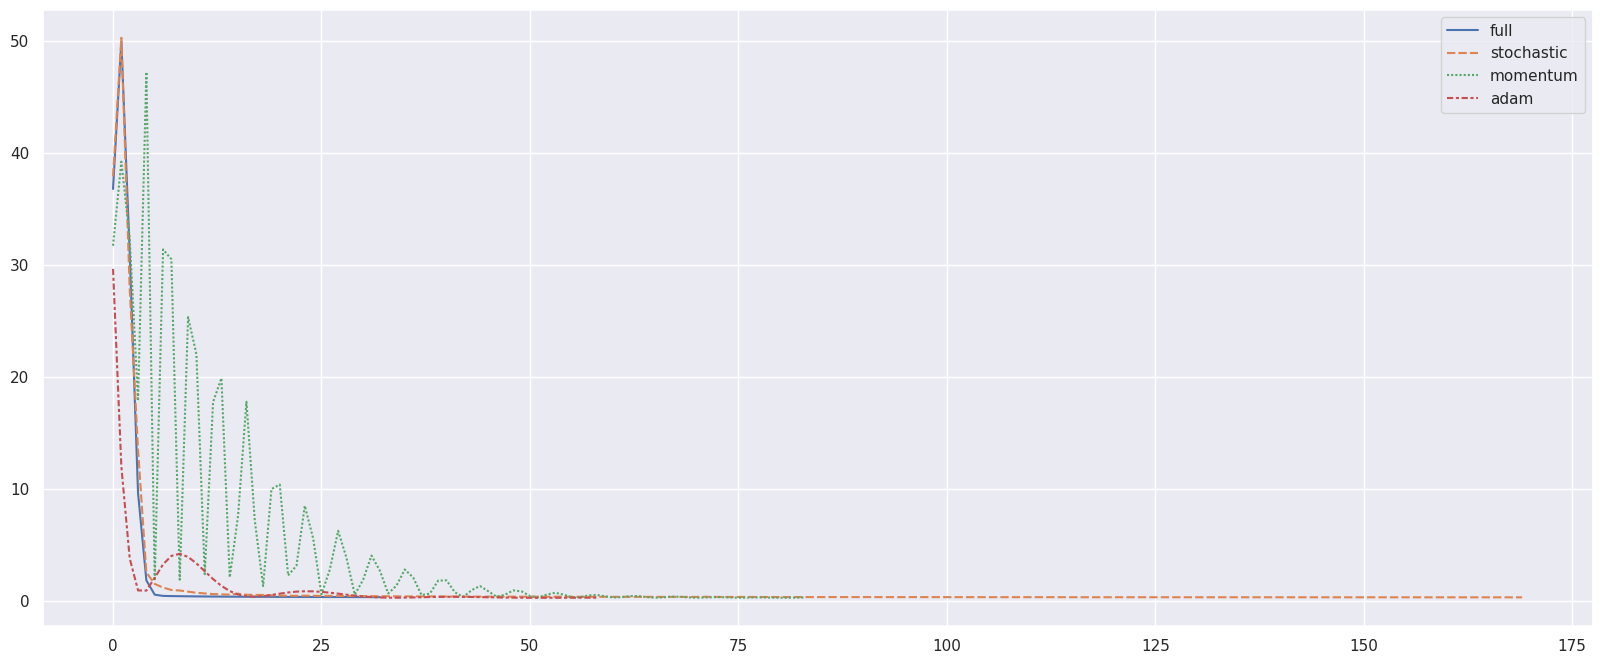

In [ ]:
# YOUR CODE:
sns.lineplot(data=loss_histories).figure.set_size_inches(20, 8)

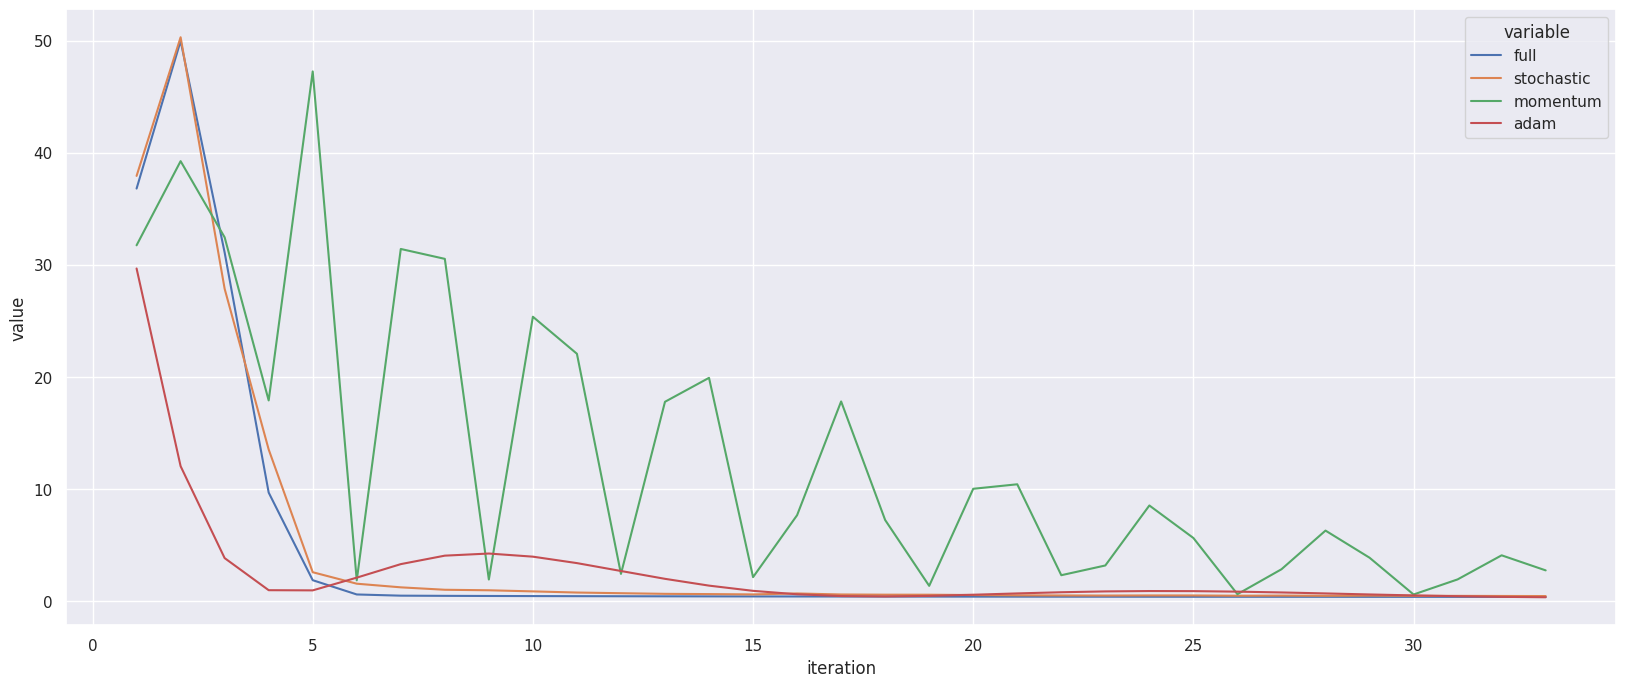

In [ ]:
# немного обрежем данные так, чтобы размерности были одинаковыми и получим графики по-приятнее
# (по факту сколько нужно для сходимости мы итак знаем из temp_df или при должном напряге глаз из первого графика)
temp_loss_histories = loss_histories
min_length = min(len(arr) for arr in temp_loss_histories.values())
for key in temp_loss_histories.keys():
    temp_loss_histories[key] = temp_loss_histories[key][:min_length]


df_t = pd.DataFrame({
    'iteration': range(1, len(next(iter(temp_loss_histories.values())))+1),
    **temp_loss_histories
})

sns.lineplot(x='iteration', y='value', hue='variable', data=pd.melt(df_t, ['iteration'])).figure.set_size_inches(20, 8)

`### ваше решение тут ###`

Как можно заметить, full gd нужно меньше всего итераций для схождения, однако $r^2$  у него самый маленький. Чуть больше для сходжения нужно adam, но и ошибка у него на первых парах уменьшается быстрее всего. На третьем месте по скорости схождения - momentum. Ошибку его колбасит только в путь и нужно достаточно много времени, чтоб она стабилизировалась. Почетное последнее место, как и ожидалось, занимает stochastic. Его ошибка ведет себя практически так же, как у full.

**Количество итераций для схождения:**

  🥇 Full
  
  🥈 Adam

  🥉 Momentum

**Значение $r^2$:**

  🥇 Adam

  🥈 Momentum

  🥉 Stochastic

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
import time

In [ ]:
batch_sizes = np.arange(5, 500, 10)

# YOUR CODE:

def get_count_of_iterations(batch_sizes, results, X_train, y_train):
    dimension = X_train.shape[1]
    lambda_ = results['stochastic']['best_lr']

    config = {
        'descent_name': 'stochastic',
        'kwargs': {'dimension': dimension,
                   'lambda_': lambda_,
                   'batch_size': batch_size}
    }

    reg = LinearRegression(descent_config=config)

    reg.fit(X_train, y_train)
    return len(reg.loss_history)

In [ ]:
time_results = {}
step_size = batch_sizes[1] - batch_sizes[0]

for batch_size in batch_sizes:
    current_counter = 0
    start = time.time()
    for _ in range(step_size):
        current_counter += get_count_of_iterations(batch_size, results, X_train, y_train)
    finish = time.time()
    time_results[batch_size] = {
        'count_of_iterations': current_counter / step_size,
        'time': (finish - start) / step_size
    }

In [ ]:
list_batch_sizes = list(time_results.keys())
count_of_iterations = [time_results[b_size]['count_of_iterations'] for b_size in list_batch_sizes]
time = [time_results[b_size]['time'] for b_size in list_batch_sizes]

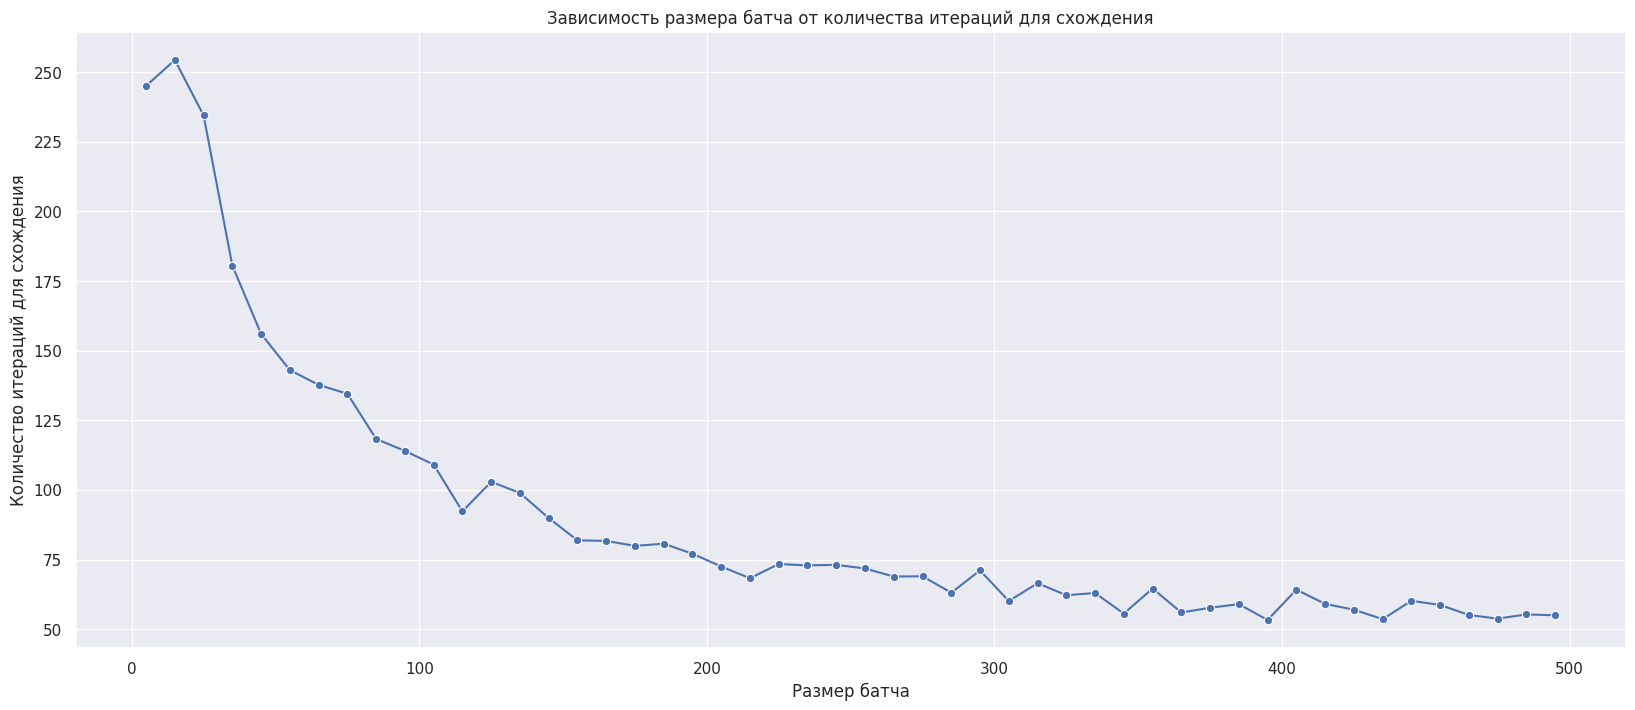

In [ ]:
sns.lineplot(x=list_batch_sizes, y=count_of_iterations, marker='o', linestyle='-').figure.set_size_inches(20, 8)
plt.title('Зависимость размера батча от количества итераций для схождения')
plt.xlabel('Размер батча')
plt.ylabel('Количество итераций для схождения')

plt.show()

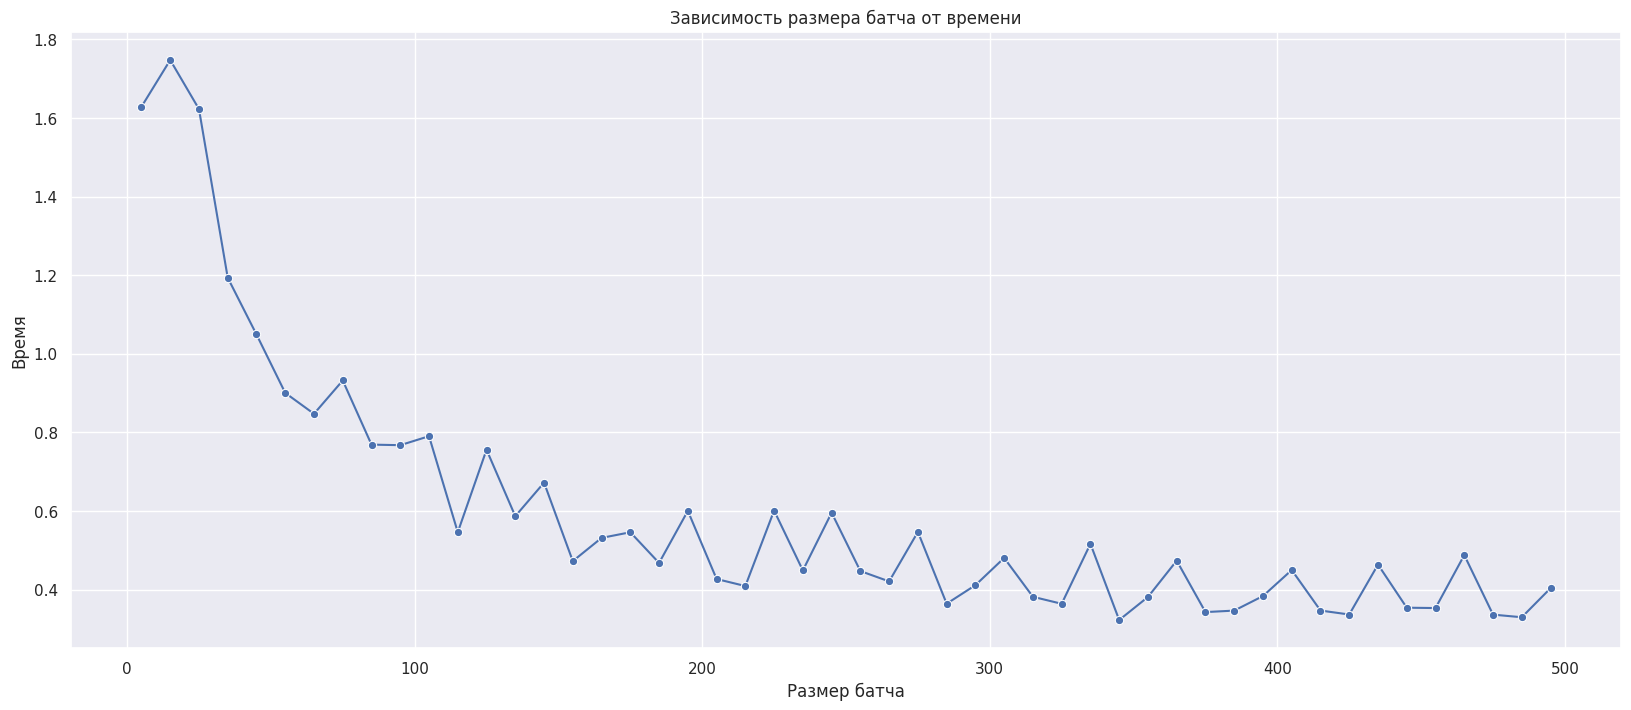

In [ ]:
sns.lineplot(x=batch_sizes, y=time, marker='o', linestyle='-').figure.set_size_inches(20, 8)
plt.title('Зависимость размера батча от времени')
plt.xlabel('Размер батча')
plt.ylabel('Время')

plt.show()

`### ваше решение тут ###`

Как можно заметить, чем больше размер батча, тем меньше нужно итераций и времени для схождения. Однако в какой-то момент (когда батч будет достаточно большим), скорее всего время начнет увеличиваться из-за долгих расчетов.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: [link](https://contest.yandex.ru/contest/54610/run-report/96123378/)

  id: 96123378

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
# YOUR CODE:
descents = ['full', 'stochastic', 'momentum', 'adam']

In [ ]:
def get_lambda_mu(descent_names, learn_rate, mu, X_train, y_train, X_test, y_test, X_valid, y_valid):
    dimension = X_train.shape[1]
    lambda_ = learn_rate

    config = {
        'descent_name': descent_names,
        'regularized': True,
        'kwargs': {'dimension': dimension,
                   'lambda_': learn_rate,
                   'mu': mu}
    }

    reg = LinearRegression(descent_config=config)

    reg.fit(X_train, y_train)
    y_test_pred = reg.predict(X_test)
    y_train_pred = reg.predict(X_train)

    # try:
    train_mse = mean_squared_error(y_train, y_train_pred, squared=True)
    test_mse = mean_squared_error(y_test, y_test_pred, squared=True)
    test_r2 = r2_score(y_test, y_test_pred)
    count_of_iterations = len(reg.loss_history)
    # except ValueError:
    #     pass

    metrics = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'test_r2': test_r2,
        'valid': reg.calc_loss(X_valid, y_valid),
        'count_of_iterations': count_of_iterations
    }

    return metrics, reg.loss_history

In [ ]:
def find_best_learning_rate_mu(descent_names, x, y, X_train, y_train, X_test, y_test):
    results = {}
    values_lambda = np.logspace(-5, 0.6, 8)
    values_mu = np.logspace(-3, 0.5, 6)

    for descent in descents:
        best_lr = float('inf')
        best_loss = float('inf')
        best_mu = float('inf')

        for lr in values_lambda:
            for mu in values_mu:
                metrics, loss_history = get_lambda_mu(descent, lr, mu, X_train, y_train, X_test, y_test, X_valid, y_valid)
                loss = metrics['valid']

                if loss < best_loss:
                    best_loss = loss
                    best_lr = lr
                    best_mu = mu

        results[descent] = {
            'best_lambda': best_lr,
            'lr_loss': best_loss,
            'best_mu': best_mu,
            }

    return results, loss_history

In [ ]:
results_reg, loss_history_reg = find_best_learning_rate_mu(descents, x, y, X_train, y_train, X_test, y_test)
results_reg

{'full': {'best_lambda': 0.630957344480193,
  'lr_loss': 0.3719569552144537,
  'best_mu': 0.025118864315095794},
 'stochastic': {'best_lambda': 0.630957344480193,
  'lr_loss': 0.3392142038131595,
  'best_mu': 0.005011872336272725},
 'momentum': {'best_lambda': 0.630957344480193,
  'lr_loss': 0.30863746634573935,
  'best_mu': 0.005011872336272725},
 'adam': {'best_lambda': 3.9810717055349722,
  'lr_loss': 0.30323040637446486,
  'best_mu': 0.001}}

In [ ]:
temp_df_reg = pd.DataFrame(columns=['Descent', 'best_lambda', 'lr_loss', 'best_mu', 'r2', 'train_mse', 'test_mse', 'count_of_iterations'])

In [ ]:
loss_histories_reg = {}
for descent in descents:
    best_lr = results_reg[descent]['best_lambda']
    lr_loss = results_reg[descent]['lr_loss']
    best_mu = results_reg[descent]['best_mu']

    metrics, loss_history = get_lambda_mu(descent, best_lr, best_mu, X_train, y_train, X_test, y_test, X_valid, y_valid)
    loss_histories_reg[descent] = loss_history
    r2 = metrics['test_r2']
    train_mse = metrics['train_mse']
    test_mse = metrics['test_mse']
    count_of_iterations = metrics['count_of_iterations']

    temp_df_reg = temp_df_reg.append({'Descent': descent, 'best_lambda': best_lr, 'lr_loss': lr_loss, 'best_mu': best_mu, 'r2': r2, 'train_mse': train_mse, 'test_mse': test_mse, 'count_of_iterations': count_of_iterations}, ignore_index=True)

<ipython-input-50-20922ace2010>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_reg = temp_df_reg.append({'Descent': descent, 'best_lambda': best_lr, 'lr_loss': lr_loss, 'best_mu': best_mu, 'r2': r2, 'train_mse': train_mse, 'test_mse': test_mse, 'count_of_iterations': count_of_iterations}, ignore_index=True)
<ipython-input-50-20922ace2010>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_reg = temp_df_reg.append({'Descent': descent, 'best_lambda': best_lr, 'lr_loss': lr_loss, 'best_mu': best_mu, 'r2': r2, 'train_mse': train_mse, 'test_mse': test_mse, 'count_of_iterations': count_of_iterations}, ignore_index=True)
<ipython-input-50-20922ace2010>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_reg

In [ ]:
temp_df_reg

Descent  best_lambda   lr_loss   best_mu        r2  train_mse  test_mse  \
0        full     0.630957  0.371957  0.025119  0.706639   0.362907  0.363130   
1  stochastic     0.630957  0.339214  0.005012  0.730582   0.335054  0.333492   
2    momentum     0.630957  0.308637  0.005012  0.756580   0.301096  0.301311   
3        adam     3.981072  0.303230  0.001000  0.760001   0.296127  0.297076   

  count_of_iterations  
0                 105  
1                 257  
2                 301  
3                 301

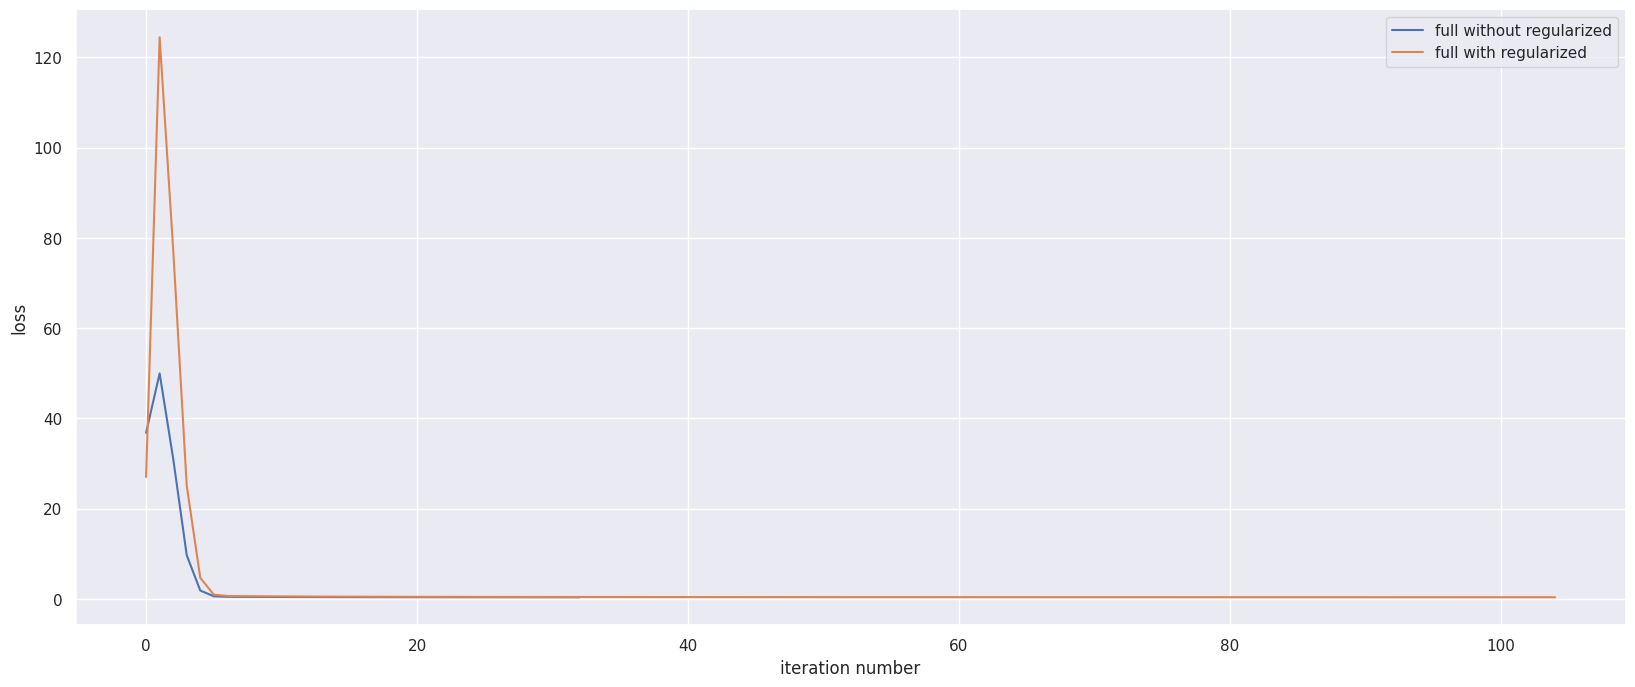

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=loss_histories['full'], ax=ax, label='full without regularized')
sns.lineplot(data=loss_histories_reg['full'], ax=ax, label='full with regularized')
ax.set(xlabel='iteration number', ylabel='loss')
ax.legend()

plt.show()

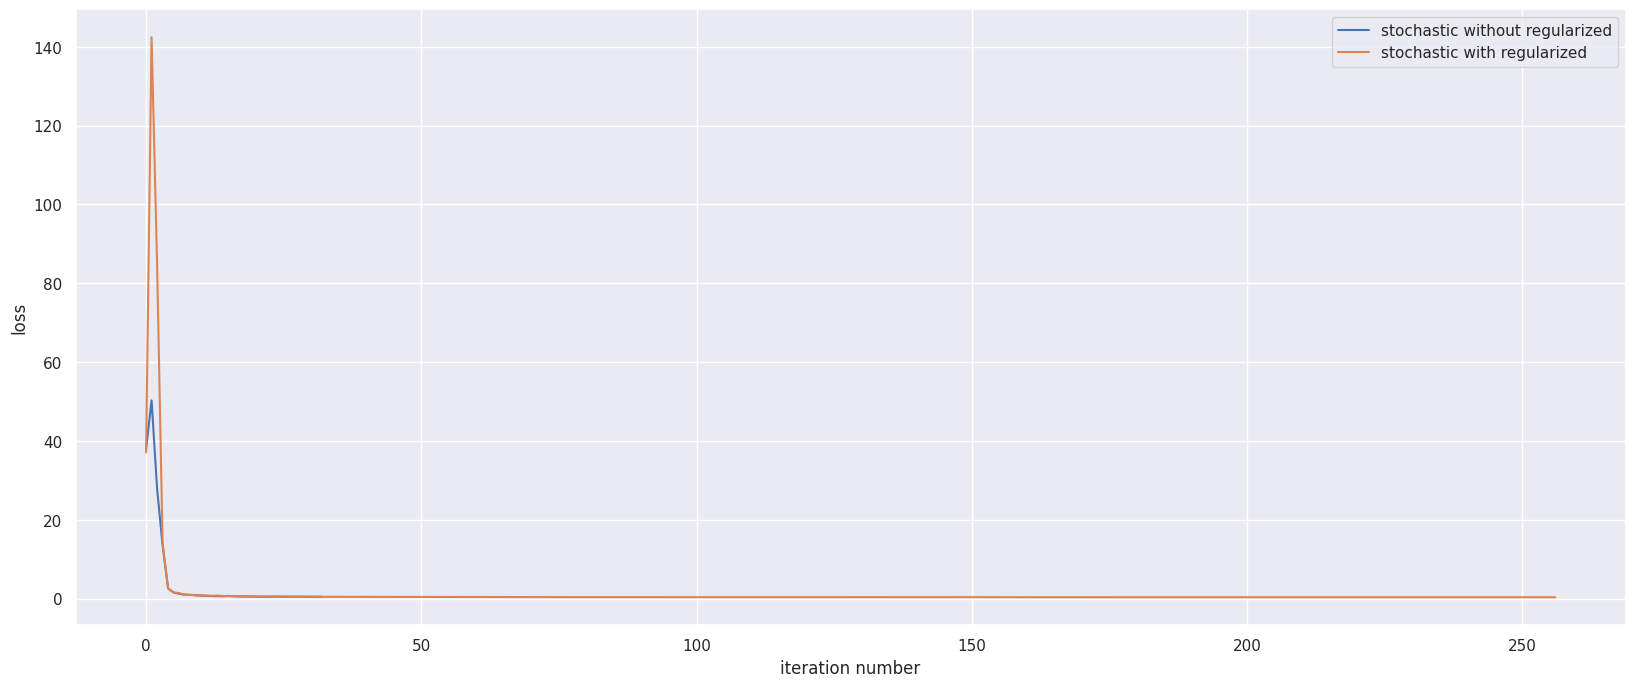

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=loss_histories['stochastic'], ax=ax, label='stochastic without regularized')
sns.lineplot(data=loss_histories_reg['stochastic'], ax=ax, label='stochastic with regularized')
ax.set(xlabel='iteration number', ylabel='loss')
ax.legend()

plt.show()

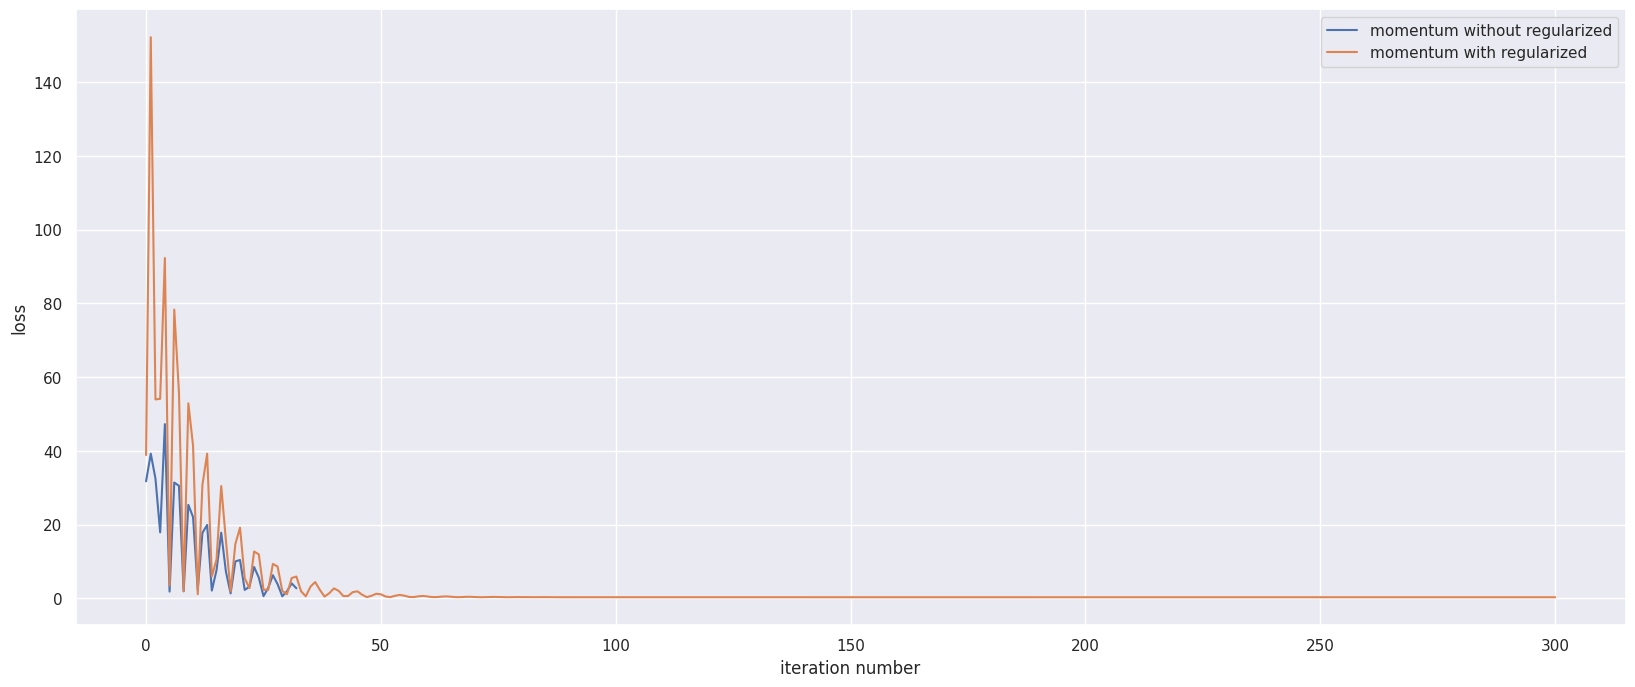

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=loss_histories['momentum'], ax=ax, label='momentum without regularized')
sns.lineplot(data=loss_histories_reg['momentum'], ax=ax, label='momentum with regularized')
ax.set(xlabel='iteration number', ylabel='loss')
ax.legend()

plt.show()

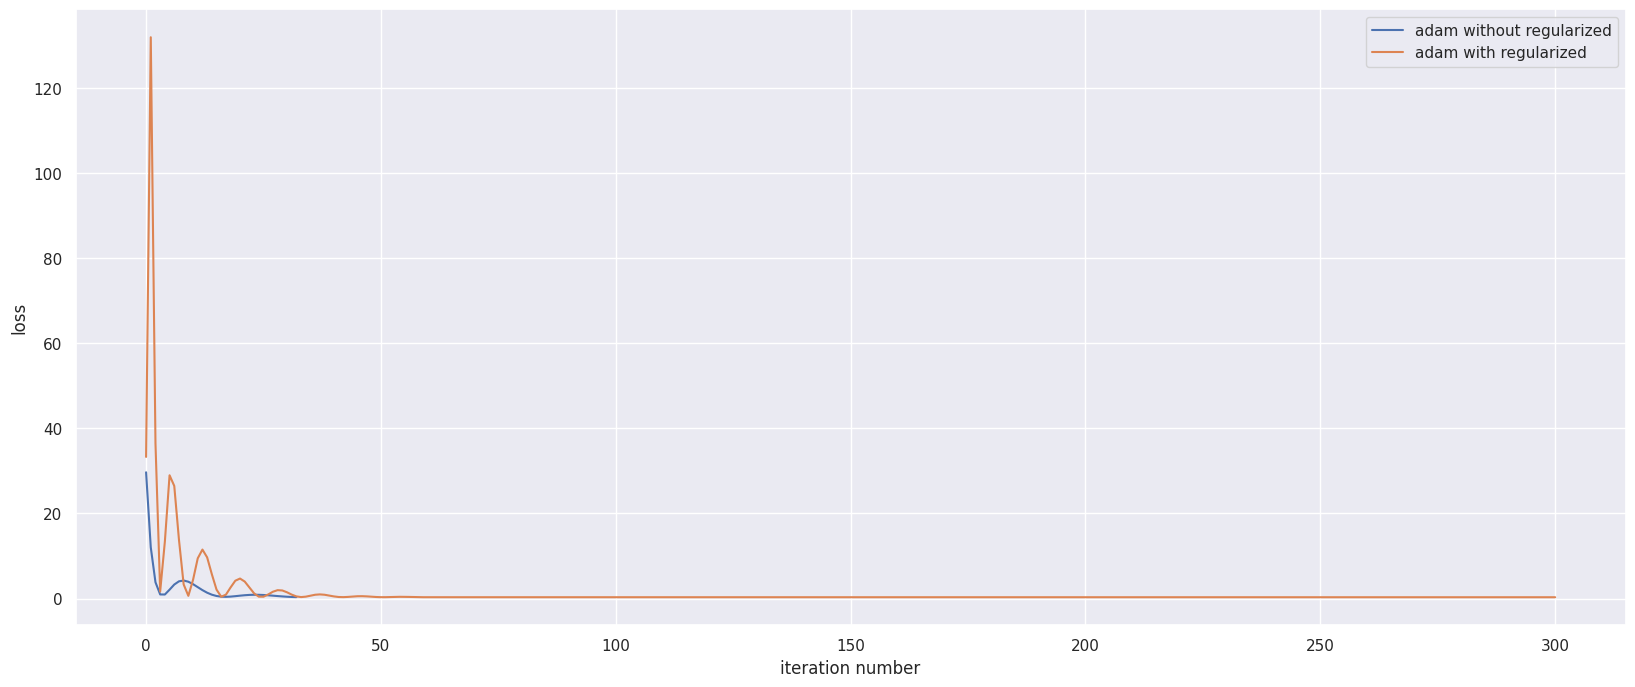

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=loss_histories['adam'], ax=ax, label='adam without regularized')
sns.lineplot(data=loss_histories_reg['adam'], ax=ax, label='adam with regularized')
ax.set(xlabel='iteration number', ylabel='loss')
ax.legend()

plt.show()

In [ ]:
temp_df

Descent        r2  train_mse  test_mse count_of_iterations
0        full  0.709348   0.358564  0.359776                  33
1  stochastic  0.728284   0.337856  0.336337                 170
2    momentum  0.739432   0.320664  0.322538                  84
3        adam  0.750175   0.309569  0.309239                  59

In [ ]:
temp_df_reg

Descent  best_lambda   lr_loss   best_mu        r2  train_mse  test_mse  \
0        full     0.630957  0.371957  0.025119  0.706639   0.362907  0.363130   
1  stochastic     0.630957  0.339214  0.005012  0.730582   0.335054  0.333492   
2    momentum     0.630957  0.308637  0.005012  0.756580   0.301096  0.301311   
3        adam     3.981072  0.303230  0.001000  0.760001   0.296127  0.297076   

  count_of_iterations  
0                 105  
1                 257  
2                 301  
3                 301

`### ваше решение тут ###`

Как можно заметить, после регуляризации число итераций для схождения у full уменьшилось, а у stochastic и adam	увеличилось. Также у full ошибка немного увеличилась, а у остальных уменьшилась. По графикам можно увидеть, что с регуляризацией loss увеличивается.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

$$L'(y,a) = (\log(\cosh(a-y)))' = x^{T}\cdot\frac{\sinh(a-y)}{\cosh(a-y)} = x^{T}\cdot \tanh(a-y)$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:
from descents import LossFunction
descents = ['full', 'stochastic', 'momentum', 'adam']

In [ ]:
def get_log_cosh(descent_names, learn_rate, X_train, y_train, X_test, y_test, X_valid, y_valid):
    dimension = X_train.shape[1]
    lambda_ = learn_rate

    config = {
        'descent_name': descent_names,
        'kwargs': {'dimension': dimension,
                   'lambda_': learn_rate,
                   'loss_function': LossFunction.LogCosh}
    }

    reg = LinearRegression(descent_config=config)

    reg.fit(X_train, y_train)
    y_test_pred = reg.predict(X_test)
    y_train_pred = reg.predict(X_train)

    train_mse = mean_squared_error(y_train, y_train_pred, squared=True)
    test_mse = mean_squared_error(y_test, y_test_pred, squared=True)
    test_r2 = r2_score(y_test, y_test_pred)
    count_of_iterations = len(reg.loss_history)
    train_log_cosh = reg.calc_loss(X_train, y_train)
    test_log_cosh = reg.calc_loss(X_test, y_test)

    metrics = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'test_r2': test_r2,
        'train_log_cosh': train_log_cosh,
        'test_log_cosh': test_log_cosh,
        'valid': reg.calc_loss(X_valid, y_valid),
        'count_of_iterations': count_of_iterations
    }

    return metrics, reg.loss_history

In [ ]:
def find_metrics_log_cosh(descent_names, x, y, X_train, y_train, X_test, y_test):
    results = {}
    values_lambda = np.logspace(-5, 1, 10)

    for descent in descents:
        best_lr = float('inf')
        best_loss = float('inf')

        for lr in values_lambda:
            metrics, loss_history = get_log_cosh(descent, lr, X_train, y_train, X_test, y_test, X_valid, y_valid)
            loss = metrics['valid']

            if loss < best_loss:
                best_loss = loss
                best_lr = lr

        results[descent] = {
            'best_lambda': best_lr,
            'lr_loss': best_loss,
            }

    return results, loss_history

In [ ]:
results_log_cosh, loss_history_log_cosh = find_metrics_log_cosh(descents, x, y, X_train, y_train, X_test, y_test)
results_log_cosh

{'full': {'best_lambda': 10.0, 'lr_loss': 0.12140566523082527},
 'stochastic': {'best_lambda': 2.154434690031882,
  'lr_loss': 0.12119992397478355},
 'momentum': {'best_lambda': 2.154434690031882,
  'lr_loss': 0.11837227756229604},
 'adam': {'best_lambda': 10.0, 'lr_loss': 0.11626207856578147}}

In [ ]:
temp_df_log_cosh = pd.DataFrame(columns=['Descent', 'best_lambda', 'lr_loss', 'r2', 'train_mse', 'test_mse', 'train_log_cosh', 'test_log_cosh', 'count_of_iterations'])

In [ ]:
loss_histories_log_cosh = {}
for descent in descents:
    best_lr = results_log_cosh[descent]['best_lambda']
    lr_loss = results_log_cosh[descent]['lr_loss']

    metrics, loss_history = get_log_cosh(descent, best_lr, X_train, y_train, X_test, y_test, X_valid, y_valid)
    loss_histories_log_cosh[descent] = loss_history
    r2 = metrics['test_r2']
    train_mse = metrics['train_mse']
    test_mse = metrics['test_mse']
    train_log_cosh = metrics['train_log_cosh']
    test_log_cosh = metrics['test_log_cosh']
    count_of_iterations = metrics['count_of_iterations']

    temp_df_log_cosh = temp_df_log_cosh.append({'Descent': descent, 'best_lambda': best_lr, 'lr_loss': lr_loss, 'r2': r2, 'train_mse': train_mse, 'test_mse': test_mse, 'train_log_cosh': train_log_cosh, 'test_log_cosh': test_log_cosh, 'count_of_iterations': count_of_iterations}, ignore_index=True)

<ipython-input-63-af1aebe12e65>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_log_cosh = temp_df_log_cosh.append({'Descent': descent, 'best_lambda': best_lr, 'lr_loss': lr_loss, 'r2': r2, 'train_mse': train_mse, 'test_mse': test_mse, 'train_log_cosh': train_log_cosh, 'test_log_cosh': test_log_cosh, 'count_of_iterations': count_of_iterations}, ignore_index=True)
<ipython-input-63-af1aebe12e65>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_log_cosh = temp_df_log_cosh.append({'Descent': descent, 'best_lambda': best_lr, 'lr_loss': lr_loss, 'r2': r2, 'train_mse': train_mse, 'test_mse': test_mse, 'train_log_cosh': train_log_cosh, 'test_log_cosh': test_log_cosh, 'count_of_iterations': count_of_iterations}, ignore_index=True)
<ipython-input-63-af1aebe12e65>:15: FutureWarning: The frame.append me

In [ ]:
temp_df

Descent        r2  train_mse  test_mse count_of_iterations
0        full  0.709348   0.358564  0.359776                  33
1  stochastic  0.728284   0.337856  0.336337                 170
2    momentum  0.739432   0.320664  0.322538                  84
3        adam  0.750175   0.309569  0.309239                  59

In [ ]:
temp_df_log_cosh

Descent  best_lambda   lr_loss        r2  train_mse  test_mse  \
0        full    10.000000  0.121406  0.743056   0.317609  0.318052   
1  stochastic     2.154435  0.121200  0.741876   0.320394  0.319512   
2    momentum     2.154435  0.118372  0.747936   0.312323  0.312011   
3        adam    10.000000  0.116262  0.753064   0.305817  0.305663   

   train_log_cosh  test_log_cosh count_of_iterations  
0        0.117970       0.118182                 241  
1        0.118218       0.118442                 301  
2        0.115491       0.115839                  99  
3        0.113981       0.114319                 134

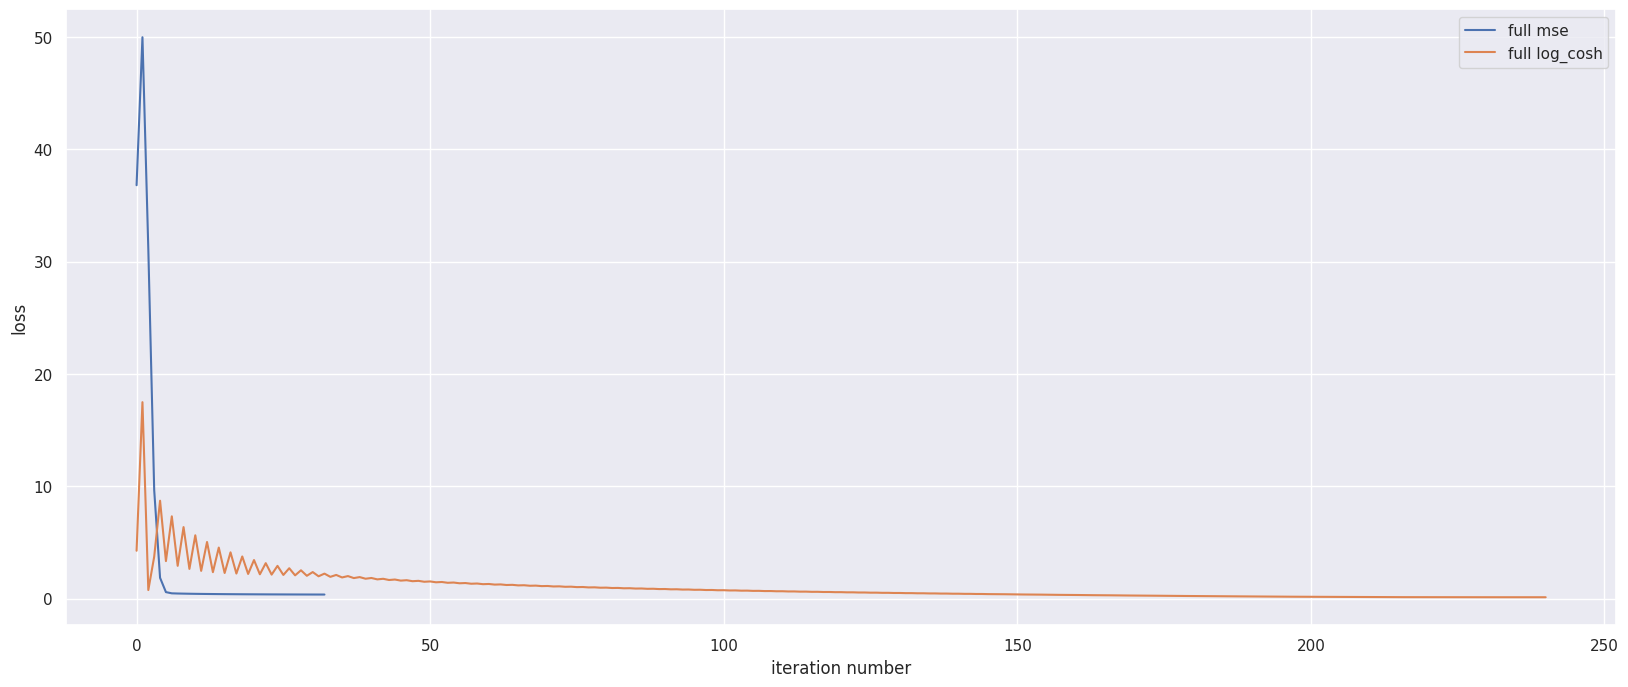

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=loss_histories['full'], ax=ax, label='full mse')
sns.lineplot(data=loss_histories_log_cosh['full'], ax=ax, label='full log_cosh')
ax.set(xlabel='iteration number', ylabel='loss')
ax.legend()

plt.show()

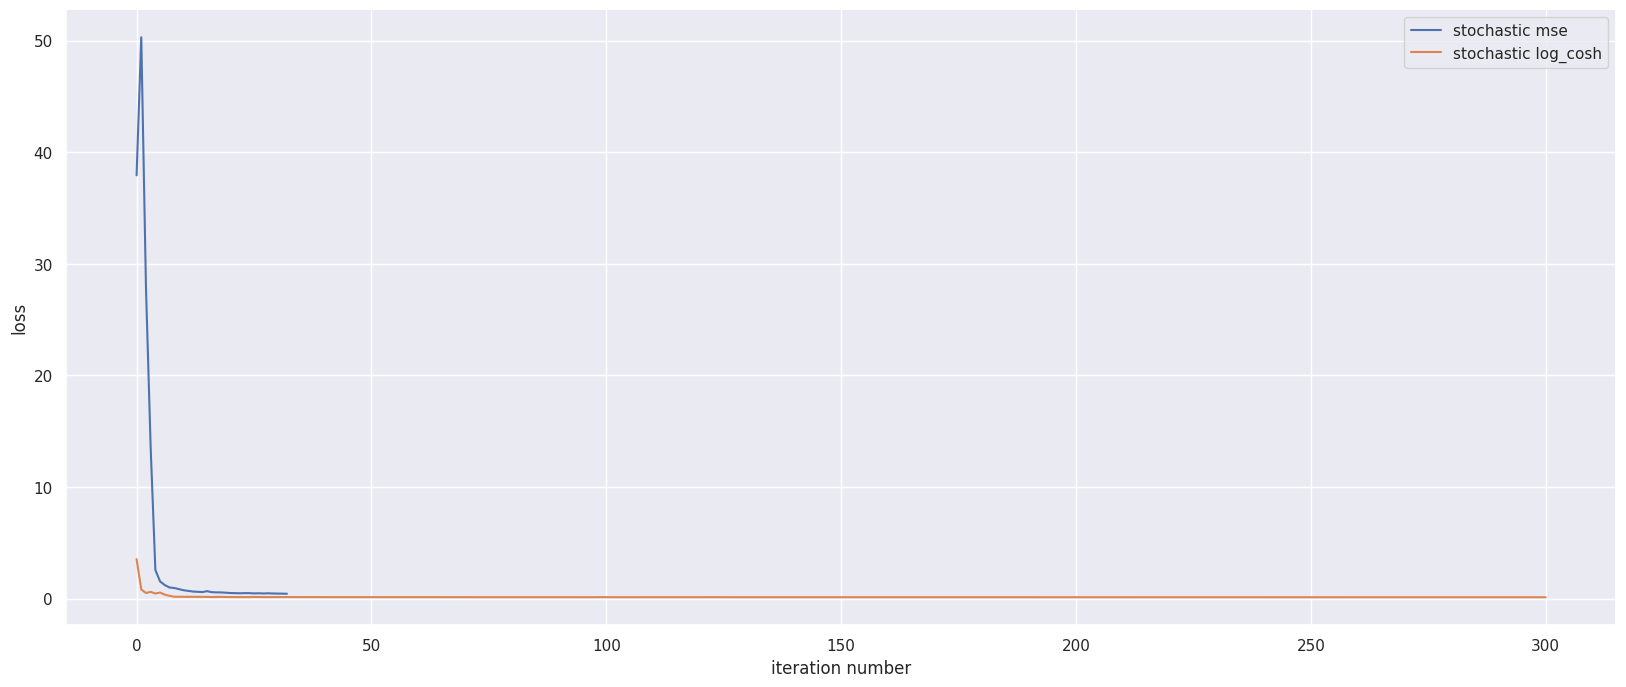

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=loss_histories['stochastic'], ax=ax, label='stochastic mse')
sns.lineplot(data=loss_histories_log_cosh['stochastic'], ax=ax, label='stochastic log_cosh')
ax.set(xlabel='iteration number', ylabel='loss')
ax.legend()

plt.show()

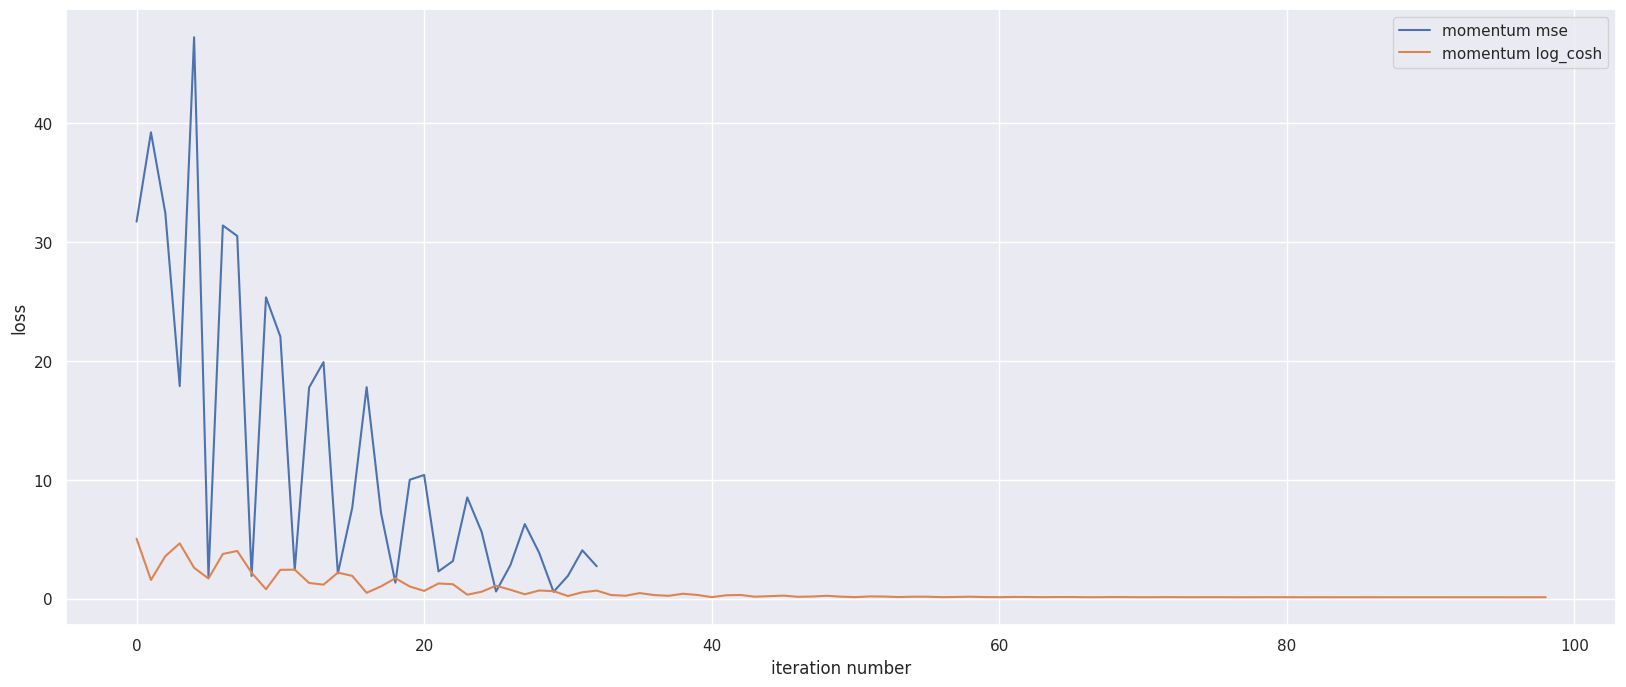

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=loss_histories['momentum'], ax=ax, label='momentum mse')
sns.lineplot(data=loss_histories_log_cosh['momentum'], ax=ax, label='momentum log_cosh')
ax.set(xlabel='iteration number', ylabel='loss')
ax.legend()

plt.show()

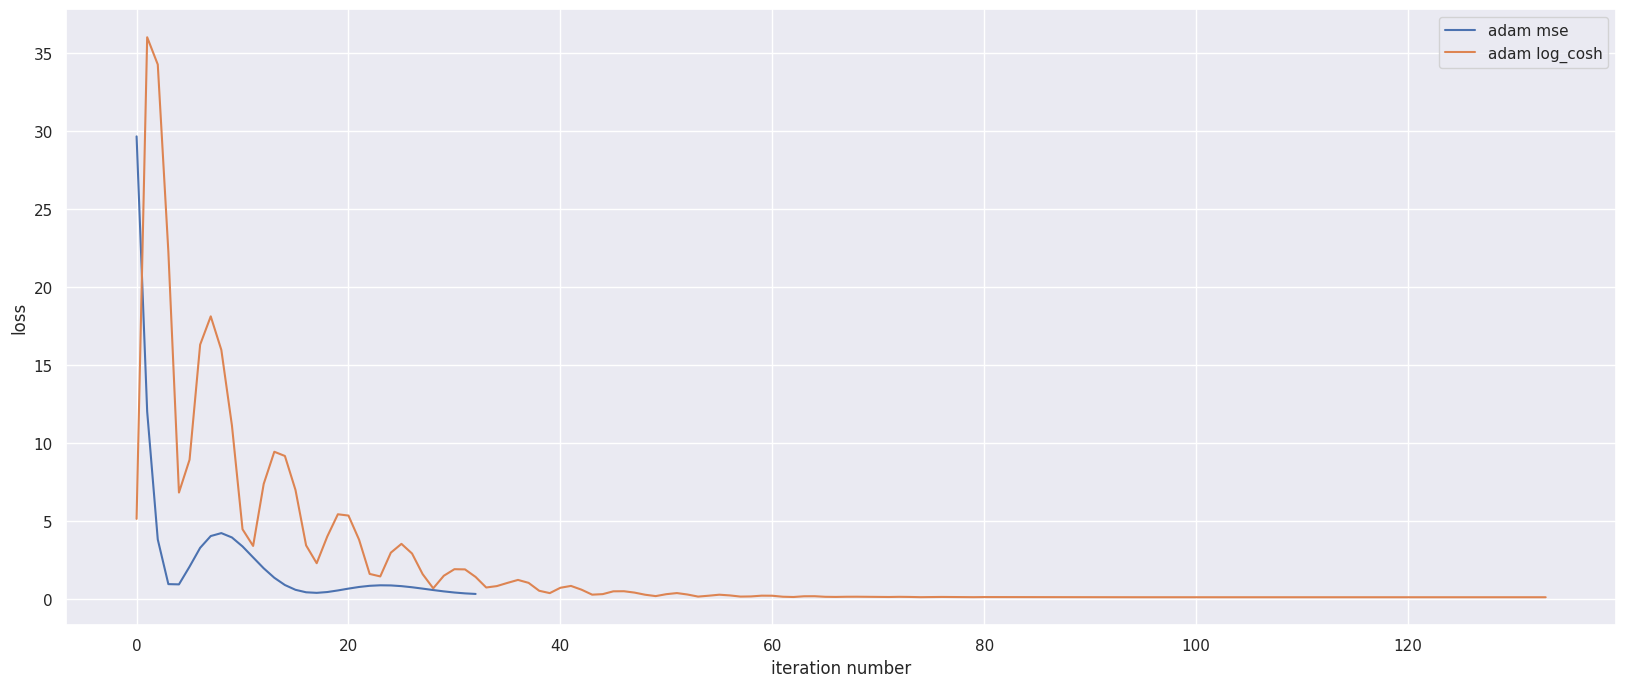

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=loss_histories['adam'], ax=ax, label='adam mse')
sns.lineplot(data=loss_histories_log_cosh['adam'], ax=ax, label='adam log_cosh')
ax.set(xlabel='iteration number', ylabel='loss')
ax.legend()

plt.show()

Количество итераций для схождения у full увеличилось в 6 раз. У stochastic почти в 3 раза, у momentum почти не изменилось, у adam увеличилось немного. $r^2$ подрос у всех, кроме adam. MSE улучшлилась по всем фронтам (опять же кроме adam).

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`
Готовили истинно английский завтрак и кажется рецепт тут совсем ни к чему, но пусть будет.

P.s. к сожалению, эстетичной фотографии не получилось, но мы старались.
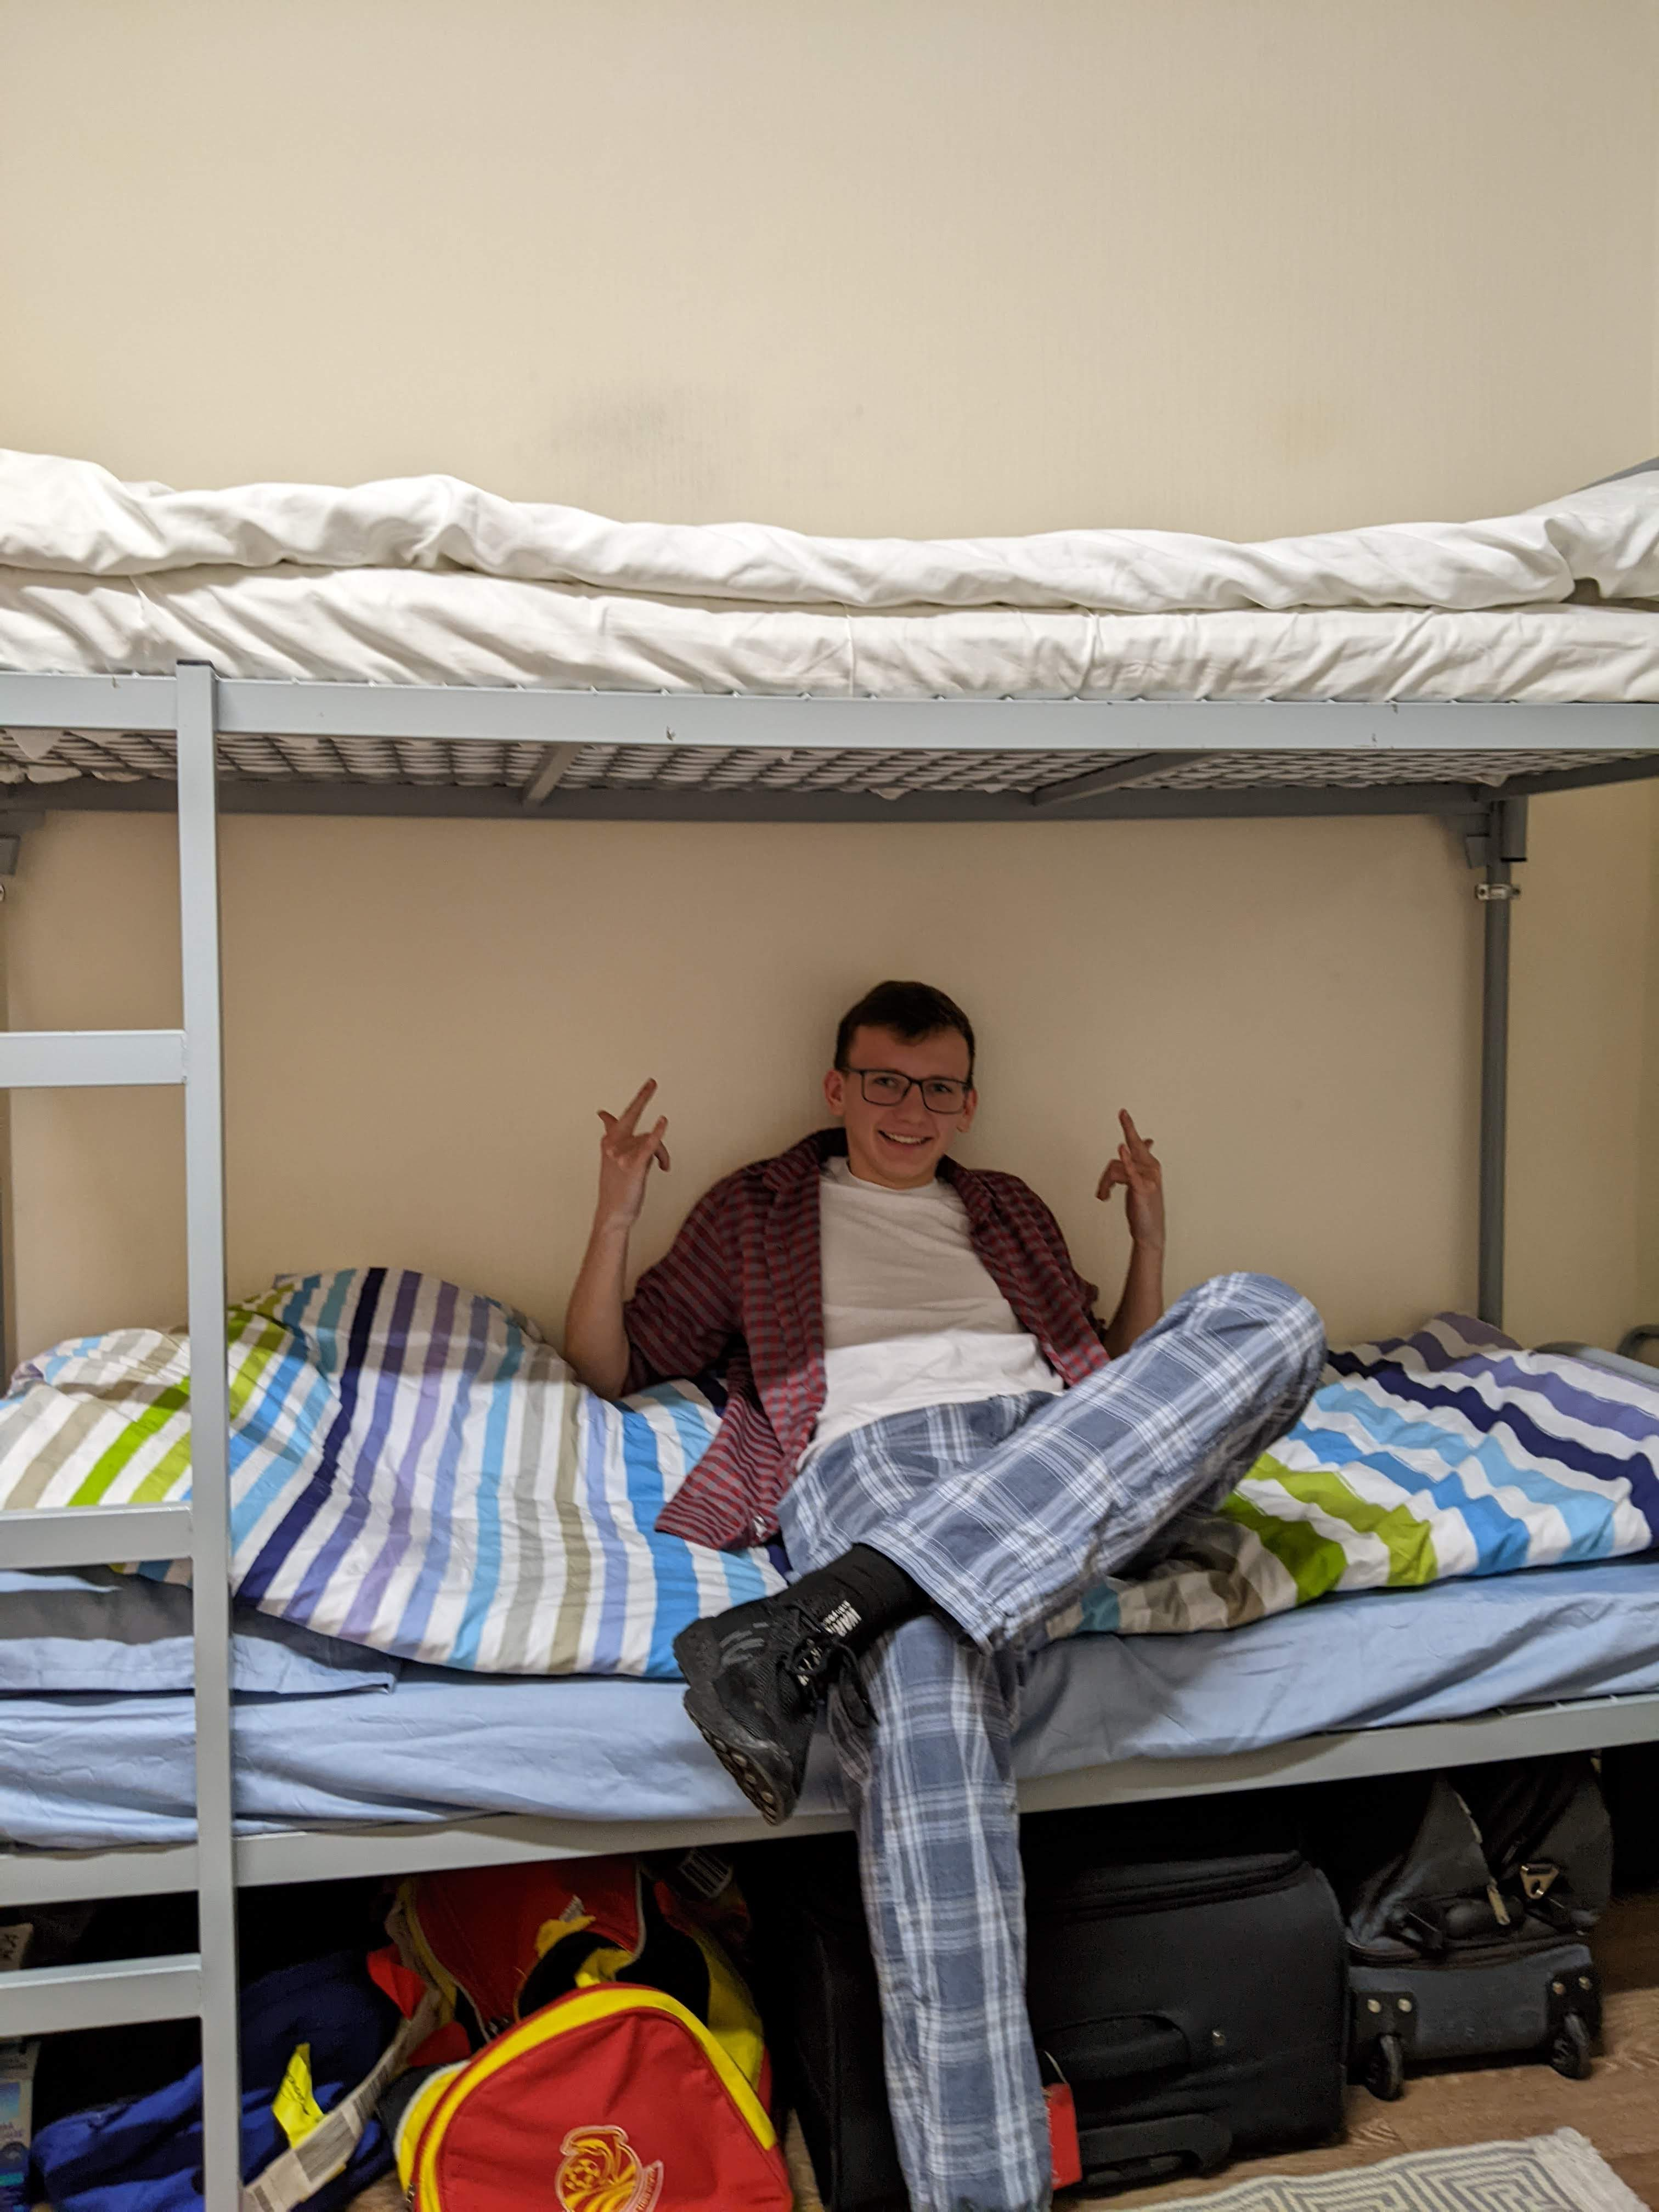
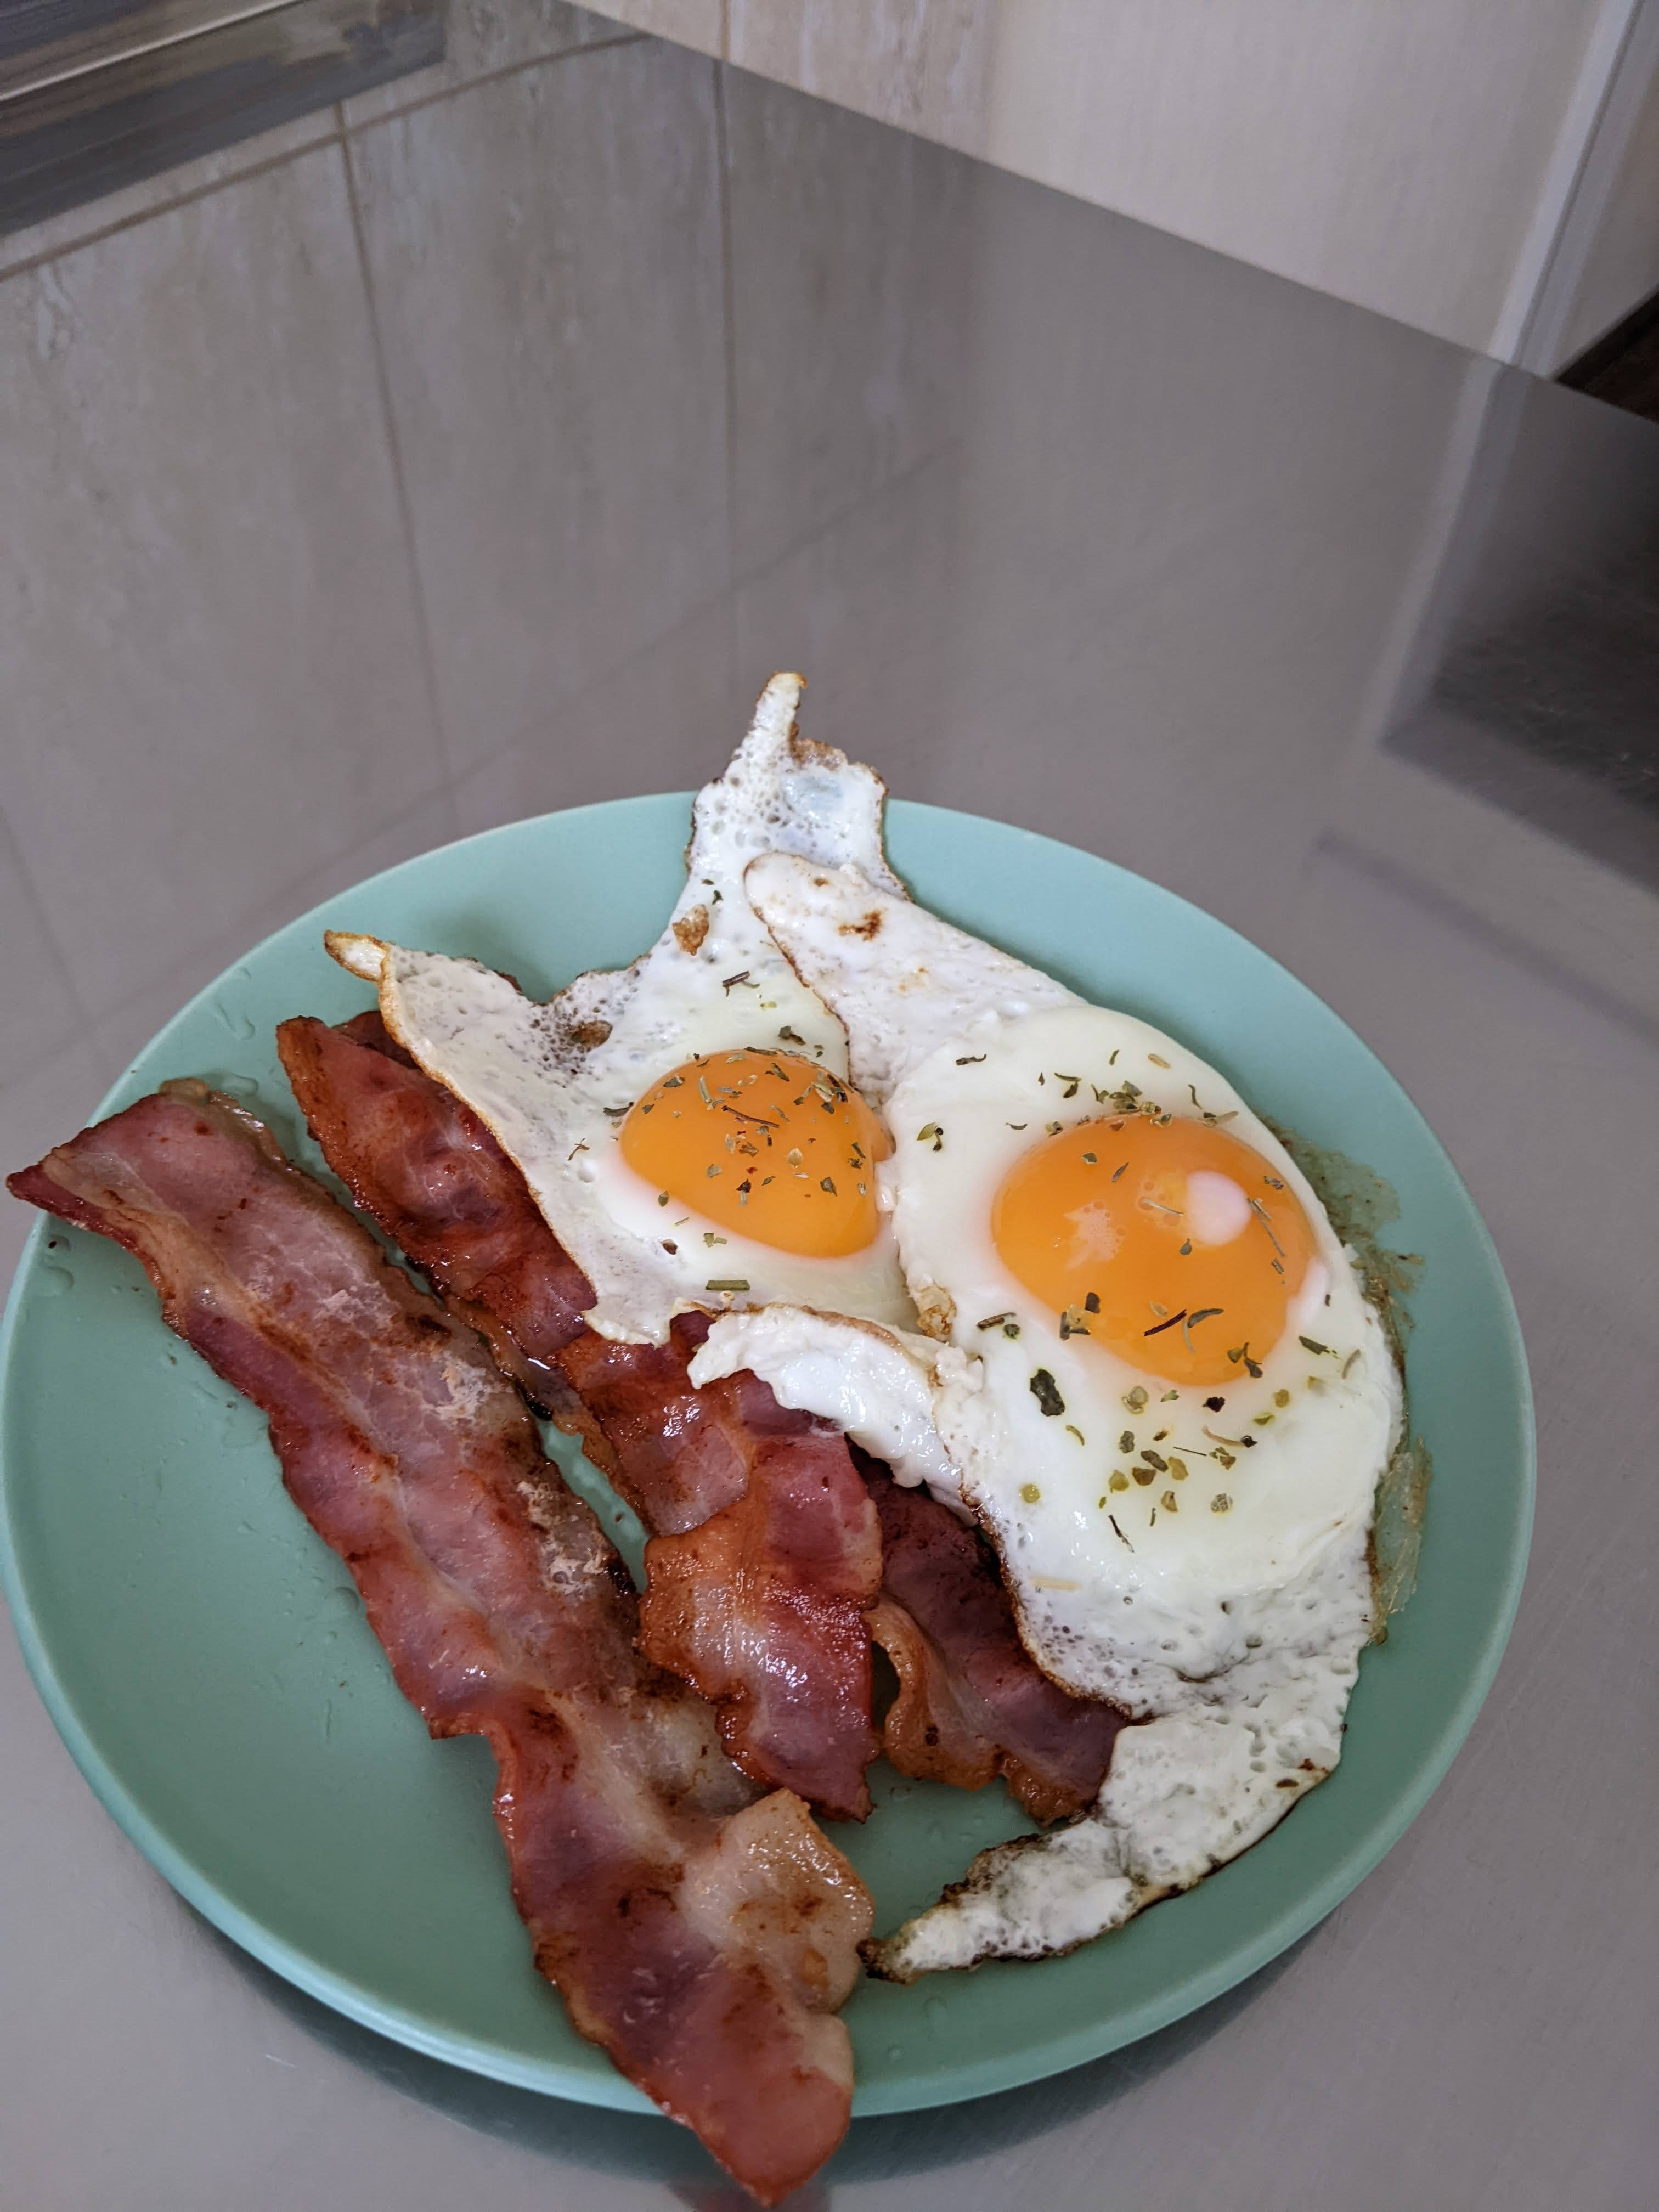

https://www.youtube.com/watch?v=XKktHsq5sZo&ab_channel=%D0%A0%D0%B5%D1%86%D0%B5%D0%BF%D1%82%D1%8B%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%BE

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

см. задание 2

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE:
from descents import LossFunction
descents = ['full', 'stochastic', 'momentum', 'adam']

In [ ]:
def get_mae(descent_names, learn_rate, X_train, y_train, X_test, y_test, X_valid, y_valid):
    dimension = X_train.shape[1]
    lambda_ = learn_rate

    config = {
        'descent_name': descent_names,
        'kwargs': {'dimension': dimension,
                   'lambda_': learn_rate,
                   'loss_function': LossFunction.MAE}
    }

    reg = LinearRegression(descent_config=config)

    reg.fit(X_train, y_train)
    y_test_pred = reg.predict(X_test)
    y_train_pred = reg.predict(X_train)

    train_mse = mean_squared_error(y_train, y_train_pred, squared=True)
    test_mse = mean_squared_error(y_test, y_test_pred, squared=True)
    test_r2 = r2_score(y_test, y_test_pred)
    count_of_iterations = len(reg.loss_history)
    train_mae = reg.calc_loss(X_train, y_train)
    test_mae = reg.calc_loss(X_test, y_test)

    metrics = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'valid': reg.calc_loss(X_valid, y_valid),
        'count_of_iterations': count_of_iterations
    }

    return metrics, reg.loss_history

In [ ]:
def find_metrics_mae(descent_names, x, y, X_train, y_train, X_test, y_test):
    results = {}
    values_lambda = np.logspace(-5, 1, 10)

    for descent in descents:
        best_lr = float('inf')
        best_loss = float('inf')

        for lr in values_lambda:
            metrics, loss_history = get_mae(descent, lr, X_train, y_train, X_test, y_test, X_valid, y_valid)
            loss = metrics['valid']

            if loss < best_loss:
                best_loss = loss
                best_lr = lr

        results[descent] = {
            'best_lambda': best_lr,
            'lr_loss': best_loss,
            }

    return results, loss_history

In [ ]:
results_mae, loss_history_mae = find_metrics_mae(descents, x, y, X_train, y_train, X_test, y_test)
results_mae

{'full': {'best_lambda': 2.154434690031882, 'lr_loss': 0.37428667471011523},
 'stochastic': {'best_lambda': 2.154434690031882,
  'lr_loss': 0.37069246663374344},
 'momentum': {'best_lambda': 2.154434690031882, 'lr_loss': 0.3600555647572999},
 'adam': {'best_lambda': 10.0, 'lr_loss': 0.35688634996255864}}

In [ ]:
temp_df_mae = pd.DataFrame(columns=['Descent', 'best_lambda', 'lr_loss', 'r2', 'train_mse', 'test_mse', 'train_mae', 'test_mae', 'count_of_iterations'])

In [ ]:
loss_histories_mae = {}
for descent in descents:
    best_lr = results_mae[descent]['best_lambda']
    lr_loss = results_mae[descent]['lr_loss']

    metrics, loss_history = get_mae(descent, best_lr, X_train, y_train, X_test, y_test, X_valid, y_valid)
    loss_histories_mae[descent] = loss_history
    r2 = metrics['test_r2']
    train_mse = metrics['train_mse']
    test_mse = metrics['test_mse']
    train_mae = metrics['train_mae']
    test_mae = metrics['test_mae']
    count_of_iterations = metrics['count_of_iterations']

    temp_df_mae = temp_df_mae.append({'Descent': descent, 'best_lambda': best_lr, 'lr_loss': lr_loss, 'r2': r2, 'train_mse': train_mse, 'test_mse': test_mse, 'train_mae': train_mae, 'test_mae': test_mae, 'count_of_iterations': count_of_iterations}, ignore_index=True)

<ipython-input-76-749c8b24d12c>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_mae = temp_df_mae.append({'Descent': descent, 'best_lambda': best_lr, 'lr_loss': lr_loss, 'r2': r2, 'train_mse': train_mse, 'test_mse': test_mse, 'train_mae': train_mae, 'test_mae': test_mae, 'count_of_iterations': count_of_iterations}, ignore_index=True)
<ipython-input-76-749c8b24d12c>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_mae = temp_df_mae.append({'Descent': descent, 'best_lambda': best_lr, 'lr_loss': lr_loss, 'r2': r2, 'train_mse': train_mse, 'test_mse': test_mse, 'train_mae': train_mae, 'test_mae': test_mae, 'count_of_iterations': count_of_iterations}, ignore_index=True)
<ipython-input-76-749c8b24d12c>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

In [ ]:
temp_df

Descent        r2  train_mse  test_mse count_of_iterations
0        full  0.709348   0.358564  0.359776                  33
1  stochastic  0.728284   0.337856  0.336337                 170
2    momentum  0.739432   0.320664  0.322538                  84
3        adam  0.750175   0.309569  0.309239                  59

In [ ]:
temp_df_mae

Descent  best_lambda   lr_loss        r2  train_mse  test_mse  \
0        full     2.154435  0.374287  0.704511   0.365656  0.365763   
1  stochastic     2.154435  0.370692  0.723594   0.344739  0.342143   
2    momentum     2.154435  0.360056  0.726112   0.339470  0.339025   
3        adam    10.000000  0.356886  0.727404   0.337947  0.337426   

   train_mae  test_mae count_of_iterations  
0   0.379317  0.380850                  94  
1   0.372895  0.372509                 301  
2   0.355900  0.356510                 121  
3   0.353871  0.354482                 170

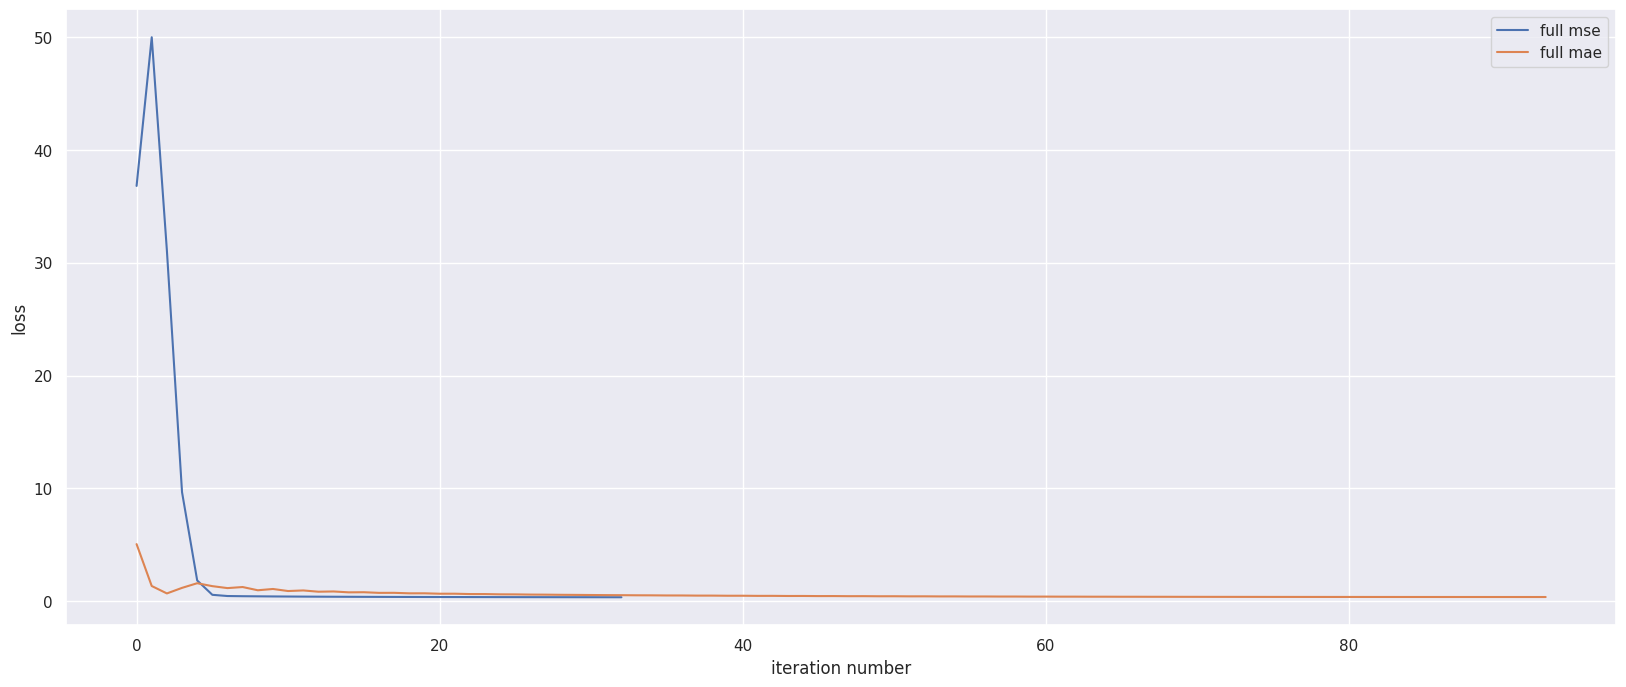

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=loss_histories['full'], ax=ax, label='full mse')
sns.lineplot(data=loss_histories_mae['full'], ax=ax, label='full mae')
ax.set(xlabel='iteration number', ylabel='loss')
ax.legend()

plt.show()

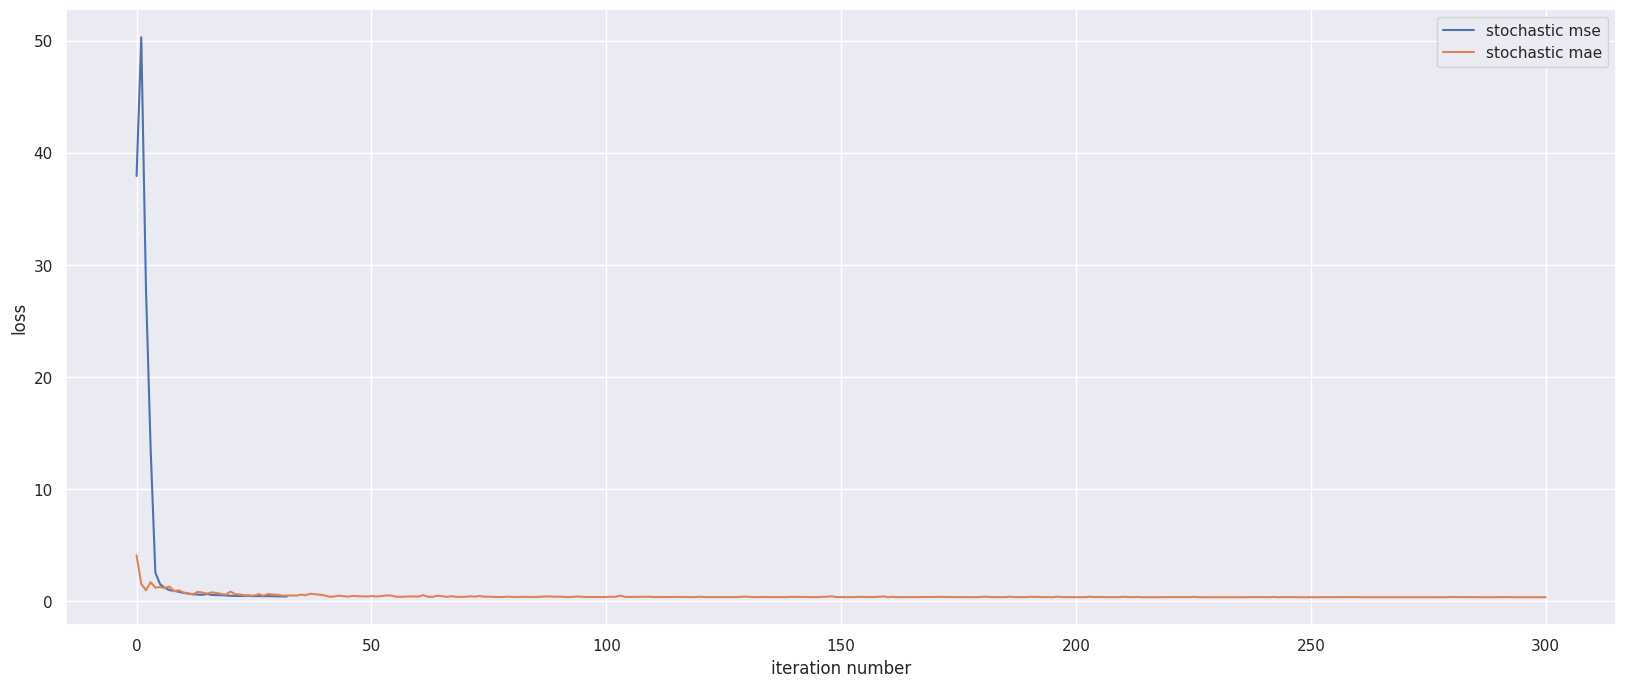

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=loss_histories['stochastic'], ax=ax, label='stochastic mse')
sns.lineplot(data=loss_histories_mae['stochastic'], ax=ax, label='stochastic mae')
ax.set(xlabel='iteration number', ylabel='loss')
ax.legend()

plt.show()

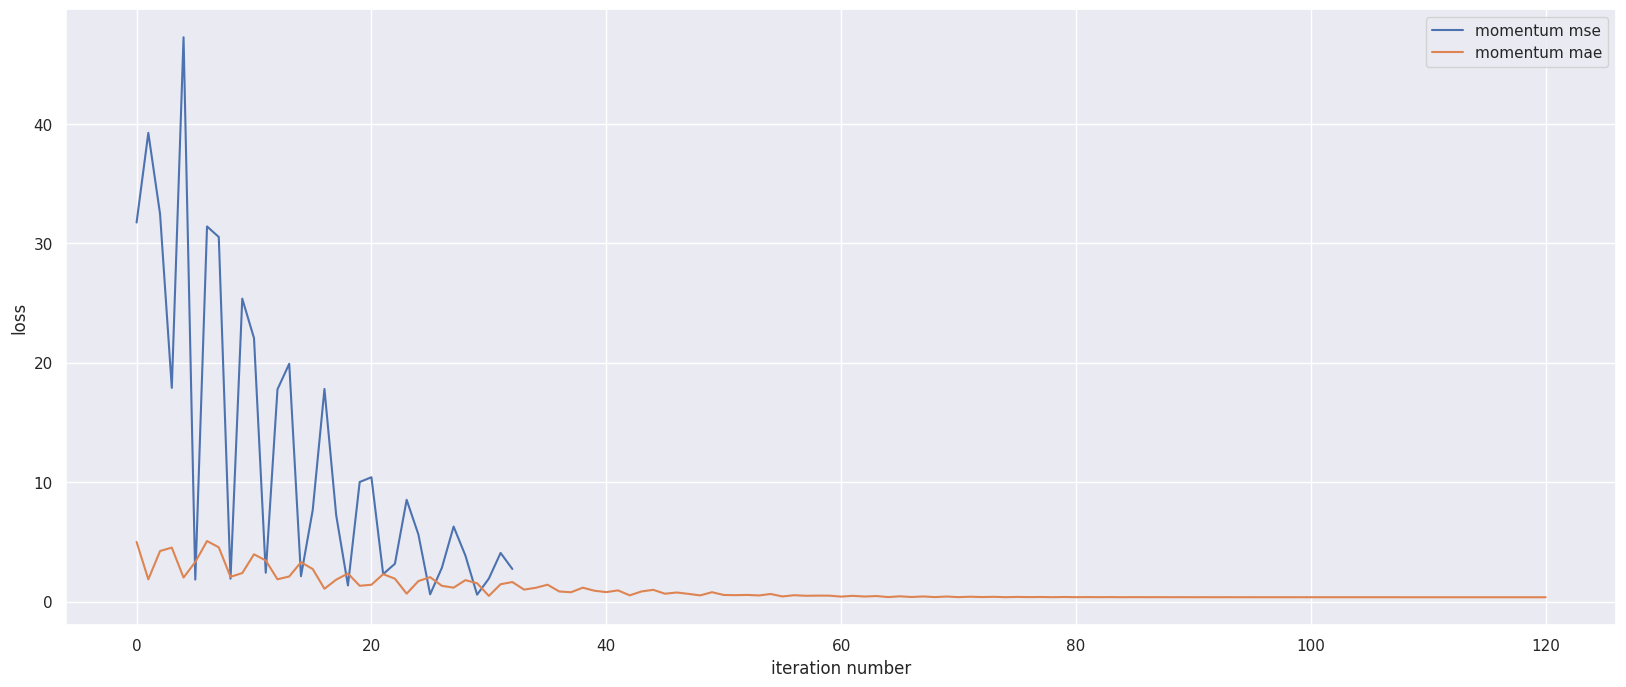

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=loss_histories['momentum'], ax=ax, label='momentum mse')
sns.lineplot(data=loss_histories_mae['momentum'], ax=ax, label='momentum mae')
ax.set(xlabel='iteration number', ylabel='loss')
ax.legend()

plt.show()

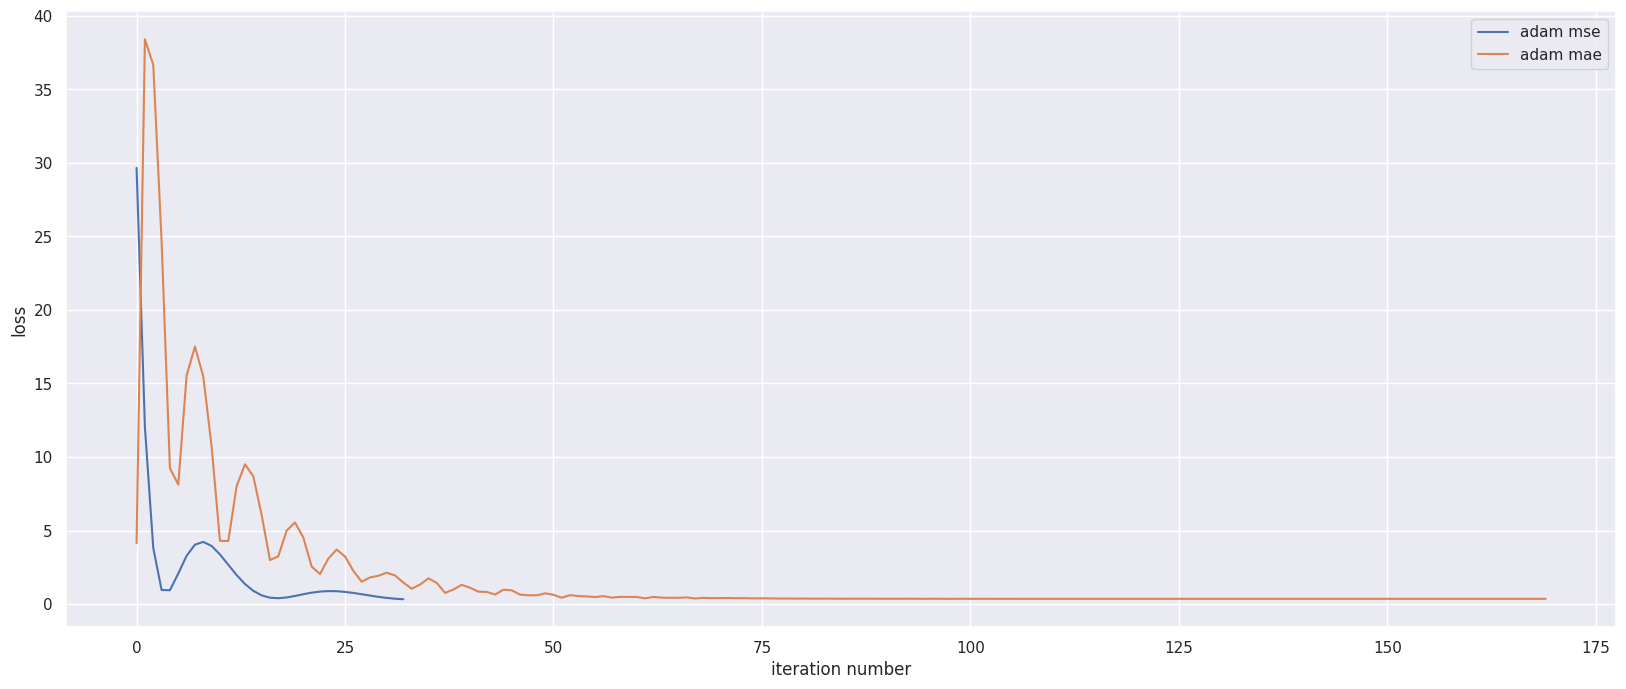

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=loss_histories['adam'], ax=ax, label='adam mse')
sns.lineplot(data=loss_histories_mae['adam'], ax=ax, label='adam mae')
ax.set(xlabel='iteration number', ylabel='loss')
ax.legend()

plt.show()

Количество итераций возросло вдвое практически у всех методов. $r^2$ подрос только у full.

In [ ]:
# YOUR CODE:
from descents import LossFunction
descents = ['full', 'stochastic', 'momentum', 'adam']

In [ ]:
def get_huber(descent_names, learn_rate, X_train, y_train, X_test, y_test, X_valid, y_valid):
    dimension = X_train.shape[1]
    lambda_ = learn_rate

    config = {
        'descent_name': descent_names,
        'kwargs': {'dimension': dimension,
                   'lambda_': learn_rate,
                   'loss_function': LossFunction.Huber}
    }

    reg = LinearRegression(descent_config=config)

    reg.fit(X_train, y_train)
    y_test_pred = reg.predict(X_test)
    y_train_pred = reg.predict(X_train)

    train_mse = mean_squared_error(y_train, y_train_pred, squared=True)
    test_mse = mean_squared_error(y_test, y_test_pred, squared=True)
    test_r2 = r2_score(y_test, y_test_pred)
    count_of_iterations = len(reg.loss_history)
    train_huber = reg.calc_loss(X_train, y_train)
    test_huber = reg.calc_loss(X_test, y_test)

    metrics = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'test_r2': test_r2,
        'train_huber': train_huber,
        'test_huber': test_huber,
        'valid': reg.calc_loss(X_valid, y_valid),
        'count_of_iterations': count_of_iterations
    }

    return metrics, reg.loss_history

In [ ]:
def find_metrics_huber(descent_names, x, y, X_train, y_train, X_test, y_test):
    results = {}
    values_lambda = np.logspace(-5, 1, 10)

    for descent in descents:
        best_lr = float('inf')
        best_loss = float('inf')

        for lr in values_lambda:
            metrics, loss_history = get_huber(descent, lr, X_train, y_train, X_test, y_test, X_valid, y_valid)
            loss = metrics['valid']

            if loss < best_loss:
                best_loss = loss
                best_lr = lr

        results[descent] = {
            'best_lambda': best_lr,
            'lr_loss': best_loss,
            }

    return results, loss_history

In [ ]:
results_huber, loss_history_huber = find_metrics_huber(descents, x, y, X_train, y_train, X_test, y_test)
results_huber

{'full': {'best_lambda': 10.0, 'lr_loss': 0.13008693822718262},
 'stochastic': {'best_lambda': 2.154434690031882,
  'lr_loss': 0.13327224621227862},
 'momentum': {'best_lambda': 2.154434690031882,
  'lr_loss': 0.12934350427709904},
 'adam': {'best_lambda': 10.0, 'lr_loss': 0.1271366788342058}}

In [ ]:
temp_df_huber = pd.DataFrame(columns=['Descent', 'best_lambda', 'lr_loss', 'r2', 'train_mse', 'test_mse', 'train_huber', 'test_huber', 'count_of_iterations'])

In [ ]:
loss_histories_huber = {}
for descent in descents:
    best_lr = results_huber[descent]['best_lambda']
    lr_loss = results_huber[descent]['lr_loss']

    metrics, loss_history = get_huber(descent, best_lr, X_train, y_train, X_test, y_test, X_valid, y_valid)
    loss_histories_huber[descent] = loss_history
    r2 = metrics['test_r2']
    train_mse = metrics['train_mse']
    test_mse = metrics['test_mse']
    train_huber = metrics['train_huber']
    test_huber = metrics['test_huber']
    count_of_iterations = metrics['count_of_iterations']

    temp_df_huber = temp_df_huber.append({'Descent': descent, 'best_lambda': best_lr, 'lr_loss': lr_loss, 'r2': r2, 'train_mse': train_mse, 'test_mse': test_mse, 'train_huber': train_huber, 'test_huber': test_huber, 'count_of_iterations': count_of_iterations}, ignore_index=True)

<ipython-input-88-d03cabcc9ef9>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_huber = temp_df_huber.append({'Descent': descent, 'best_lambda': best_lr, 'lr_loss': lr_loss, 'r2': r2, 'train_mse': train_mse, 'test_mse': test_mse, 'train_huber': train_huber, 'test_huber': test_huber, 'count_of_iterations': count_of_iterations}, ignore_index=True)
<ipython-input-88-d03cabcc9ef9>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df_huber = temp_df_huber.append({'Descent': descent, 'best_lambda': best_lr, 'lr_loss': lr_loss, 'r2': r2, 'train_mse': train_mse, 'test_mse': test_mse, 'train_huber': train_huber, 'test_huber': test_huber, 'count_of_iterations': count_of_iterations}, ignore_index=True)
<ipython-input-88-d03cabcc9ef9>:15: FutureWarning: The frame.append method is deprecated and will be remov

In [ ]:
temp_df

Descent        r2  train_mse  test_mse count_of_iterations
0        full  0.709348   0.358564  0.359776                  33
1  stochastic  0.728284   0.337856  0.336337                 170
2    momentum  0.739432   0.320664  0.322538                  84
3        adam  0.750175   0.309569  0.309239                  59

In [ ]:
temp_df_huber

Descent  best_lambda   lr_loss        r2  train_mse  test_mse  \
0        full    10.000000  0.130087  0.744784   0.316662  0.315913   
1  stochastic     2.154435  0.133272  0.739887   0.322670  0.321975   
2    momentum     2.154435  0.129344  0.747267   0.312075  0.312840   
3        adam    10.000000  0.127137  0.751341   0.308016  0.307797   

   train_huber  test_huber count_of_iterations  
0     0.128109    0.128207                 293  
1     0.131301    0.131521                 301  
2     0.126444    0.127015                 101  
3     0.124606    0.125034                 129

Количество итераций для схождения опять же увеличилось для всех методов. $r^2$ увеличился у всех, кроме adam.

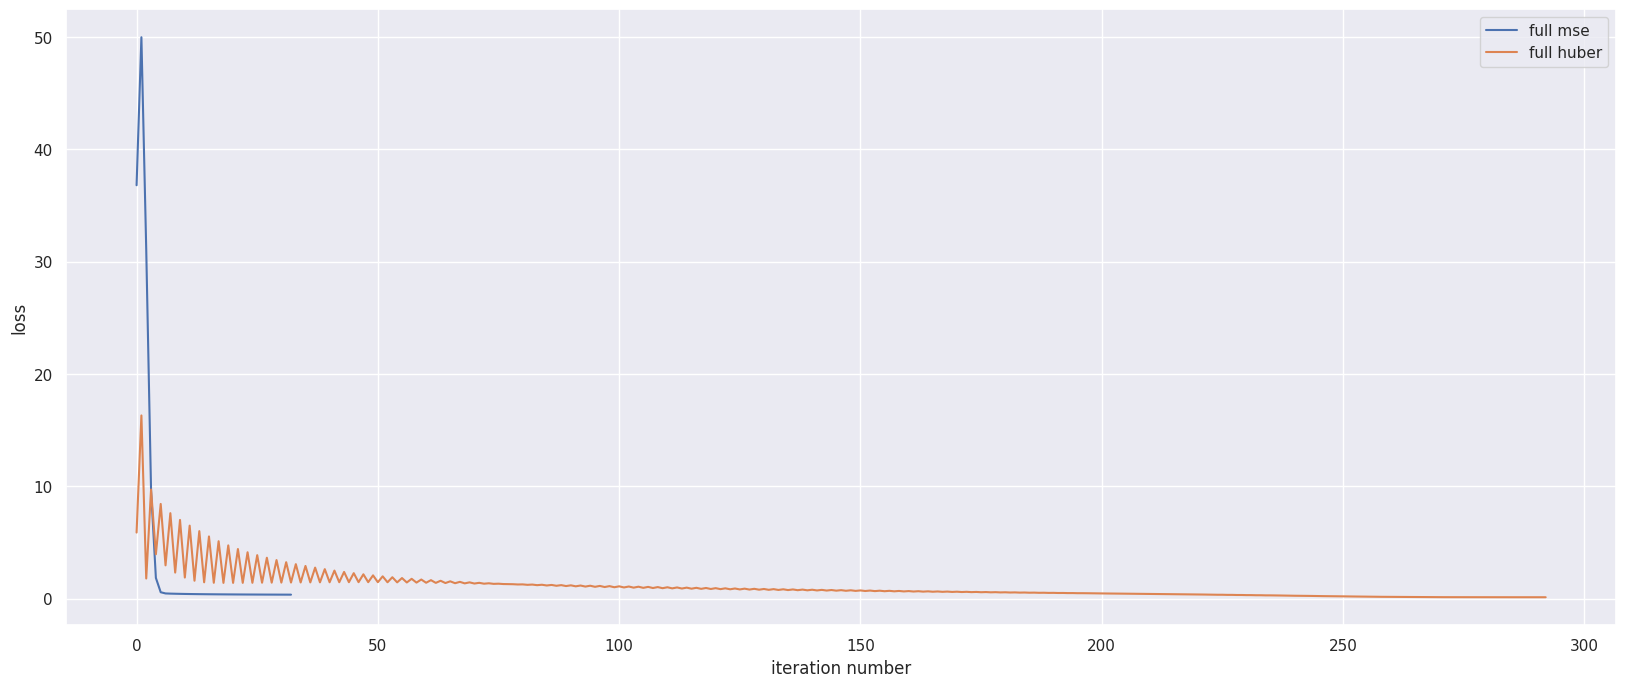

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=loss_histories['full'], ax=ax, label='full mse')
sns.lineplot(data=loss_histories_huber['full'], ax=ax, label='full huber')
ax.set(xlabel='iteration number', ylabel='loss')
ax.legend()

plt.show()

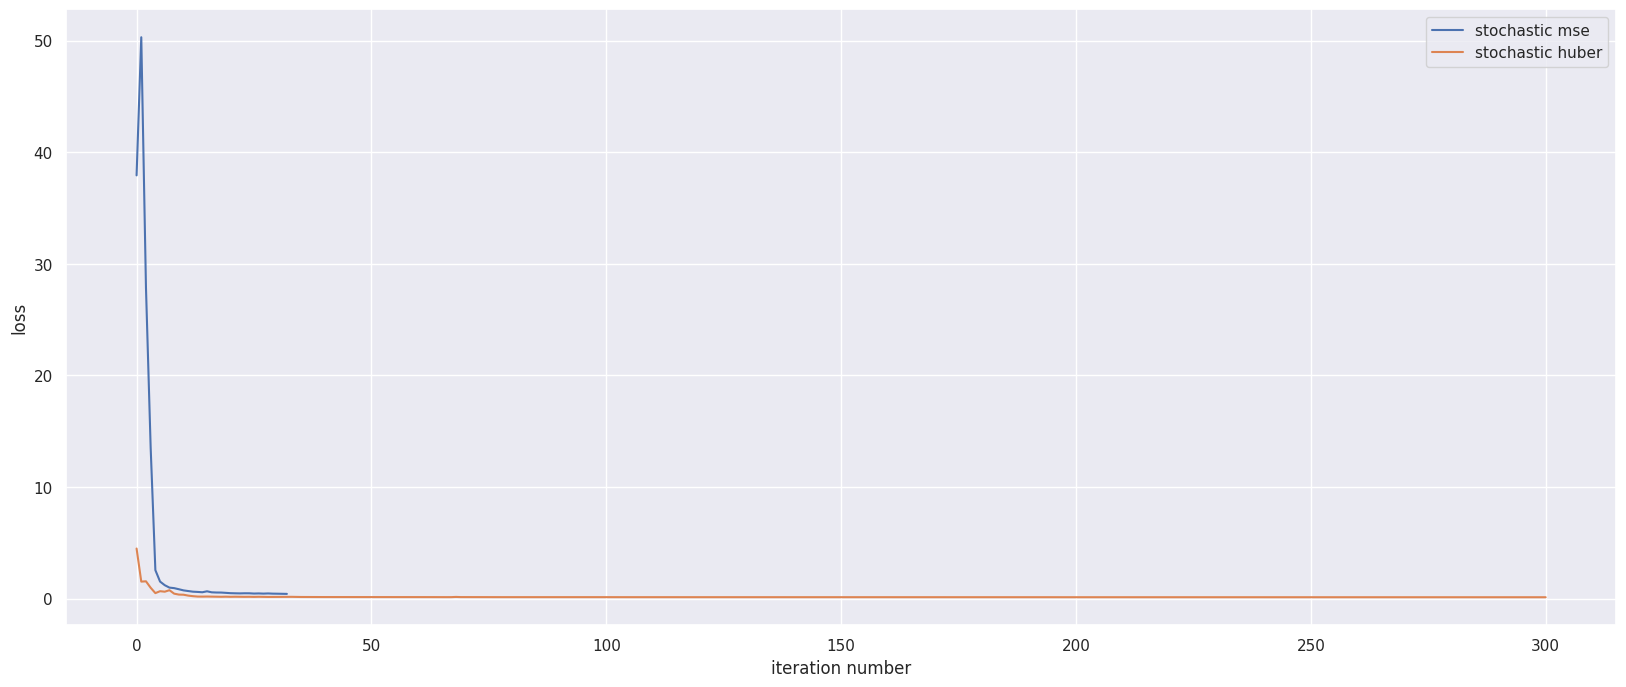

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=loss_histories['stochastic'], ax=ax, label='stochastic mse')
sns.lineplot(data=loss_histories_huber['stochastic'], ax=ax, label='stochastic huber')
ax.set(xlabel='iteration number', ylabel='loss')
ax.legend()

plt.show()

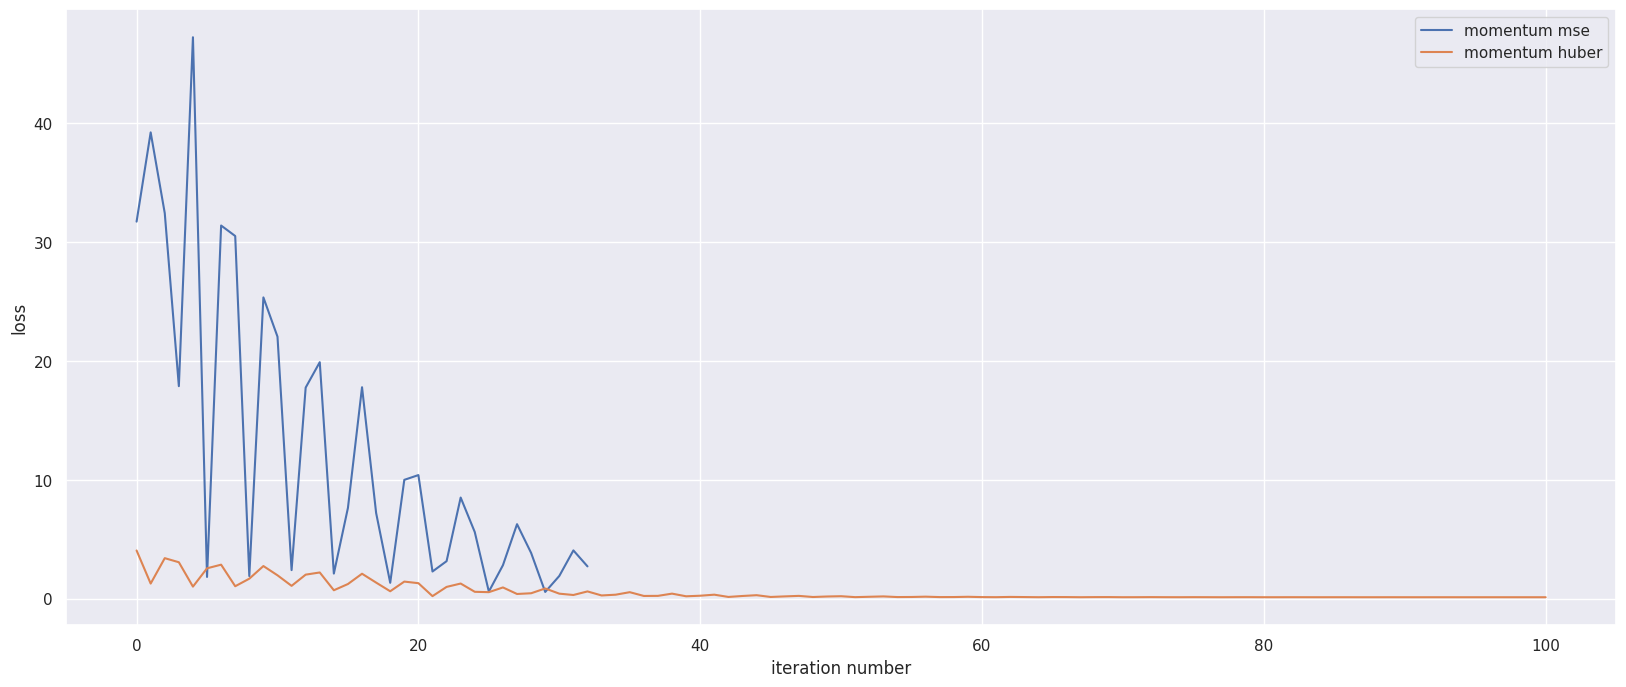

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=loss_histories['momentum'], ax=ax, label='momentum mse')
sns.lineplot(data=loss_histories_huber['momentum'], ax=ax, label='momentum huber')
ax.set(xlabel='iteration number', ylabel='loss')
ax.legend()

plt.show()

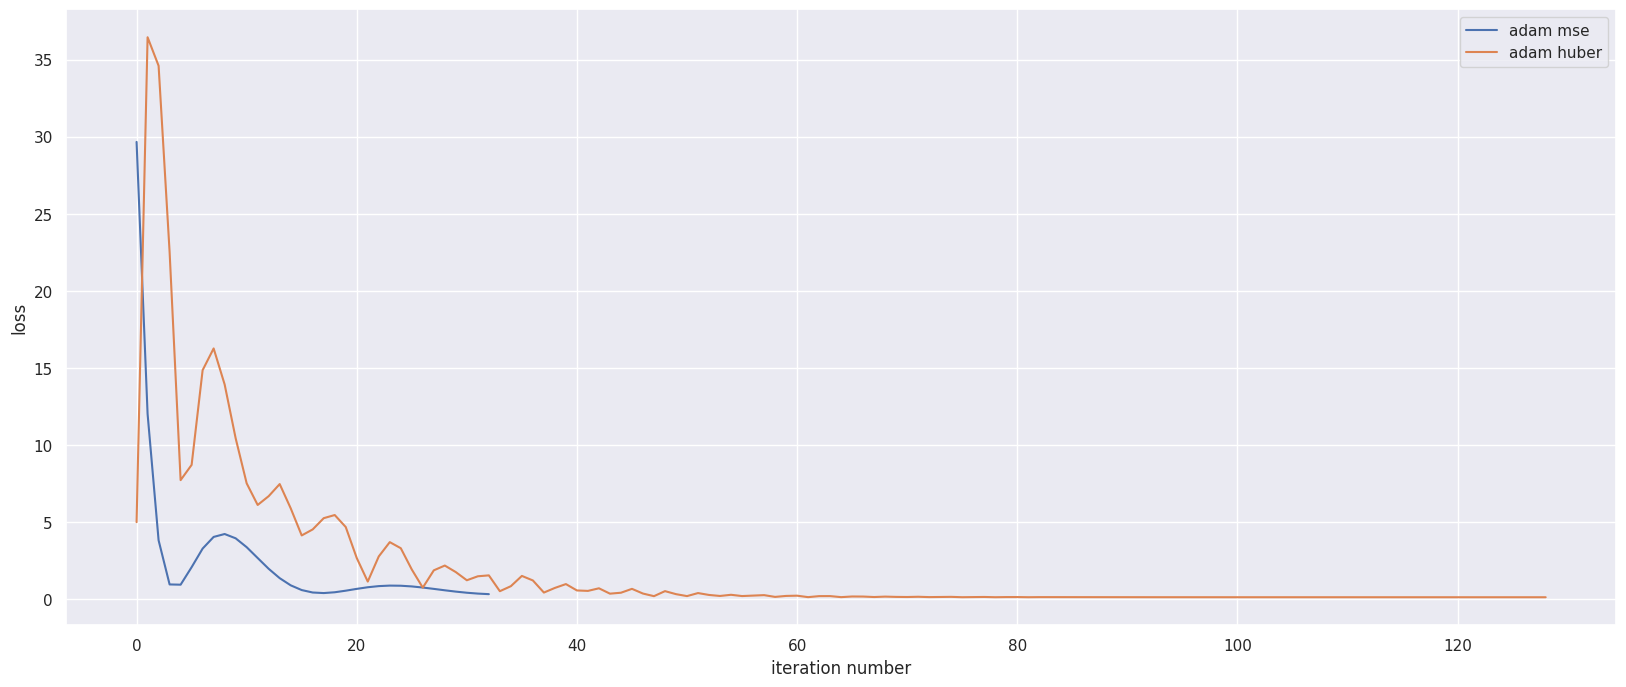

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(data=loss_histories['adam'], ax=ax, label='adam mse')
sns.lineplot(data=loss_histories_huber['adam'], ax=ax, label='adam huber')
ax.set(xlabel='iteration number', ylabel='loss')
ax.legend()

plt.show()

# Выводы.

Сопоставим каждому методу наилучшую функцию потерь:
  * Full - LogCosh (так как у нас регрессионная задача и в данных есть выбросы);
  * Stochastic - Huber (аналогична MSE, но менее чувствительна к выбросам);
  * Momentum - LogCosh (так как у нас регрессионная задача и в данных есть выбросы);
  * Adam - MSE (так как adam адаптивный метод и скорость обучения настраивается с помощью градиентов автоматически).